<a href="https://colab.research.google.com/github/dataenthusiast092/ML-Self-CS-1/blob/main/Self_Case_Study_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Healthcare Provider Fraud Detection Analysis


## Introduction to the Case Study

The problem is present at Kaggle as [HEALTHCARE PROVIDER FRAUD DETECTION ANALYSIS](https://www.kaggle.com/rohitrox/healthcare-provider-fraud-detection-analysis).

Provider Fraud is one of the biggest problems facing Medicare. According to the government, the total Medicare spending increased exponentially due to frauds in Medicare claims. Healthcare fraud is an organized crime which involves peers of providers, physicians, beneficiaries acting together to make fraud claims.

Rigorous analysis of Medicare data has yielded many physicians who indulge in fraud. They adopt ways in which an ambiguous diagnosis code is used to adopt costliest procedures and drugs. Insurance companies are the most vulnerable institutions impacted due to these bad practices. Due to this reason, insurance companies increased their insurance premiums and as result healthcare is becoming costly matter day by day.

Healthcare fraud and abuse take many forms. Some of the most common types of frauds by providers are:

a) Billing for services that were not provided.

b) Duplicate submission of a claim for the same service.

c) Misrepresenting the service provided.

d) Charging for a more complex or expensive service than was actually provided.

e) Billing for a covered service when the service actually provided was not covered.



## Problem Statement


The goal of this project is to **predict the potentially fraudulent providers** based on the claims filed by them.along with this, we will also discover important variables helpful in detecting the behaviour of potentially fraud providers. Further, we will study fraudulent patterns in the provider's claims to understand the future behaviour of providers.



## DataSet Description

Introduction to the Dataset
For the purpose of this project, we are considering Inpatient claims, Outpatient claims and Beneficiary details of each provider. Lets see their details :

A) **Inpatient Data**

This data provides insights about the claims filed for those patients who are admitted in the hospitals. It also provides additional details like their admission and discharge dates and admit diagnosis code.

B) **Outpatient Data**

This data provides details about the claims filed for those patients who visit hospitals and not admitted in it.

C) **Beneficiary Details Data**

This data contains beneficiary KYC details like health conditions,region they belong to etc.


<hr>

## Imports

In [ ]:
# ignore warnings in python: https://stackoverflow.com/a/14463362
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy.sparse import hstack

## Reading the dataset

In [ ]:
train_beneficiery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train_Beneficiarydata-1542865627584.csv')
train_inpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train_Inpatientdata-1542865627584.csv')
train_outpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train_Outpatientdata-1542865627584.csv')
train_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/train/Train-1542865627584.csv')

test_beneficiery = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test_Beneficiarydata-1542969243754.csv')
test_inpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test_Inpatientdata-1542969243754.csv')
test_outpatient = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test_Outpatientdata-1542969243754.csv')
test_target = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/HealthcareProviderFraud/hpf_da/test/Test-1542969243754.csv')



####**▶ Conclusion**

There are 4 files for each train and test data. And combining them, there are total 8 files.

## Understanding the dataset

### Train & Test Beneficiery 

#### Columns in Beneficiery data

In [ ]:
train_beneficiery.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [ ]:
test_beneficiery.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [ ]:
train_beneficiery.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,...,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,...,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,...,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,...,2,1,2,2,2,2,0,0,1790,1200


In [ ]:
test_beneficiery.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,...,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,...,1,1,1,2,1,1,36000,3204,60,70
1,BENE11007,1940-09-01,2009-12-01,1,2,0,45,610,12,12,...,2,1,2,1,1,2,0,0,1490,160
2,BENE11010,1936-07-01,NaN,2,1,0,41,30,12,12,...,2,1,1,1,2,2,0,0,1170,660
3,BENE11011,1914-03-01,NaN,2,2,0,1,360,12,12,...,1,1,2,2,1,1,5000,1068,250,320
4,BENE11014,1938-04-01,NaN,2,1,Y,45,780,12,12,...,1,2,1,2,2,2,21260,2136,120,100


#### Shape in beneficiery data

In [ ]:
train_beneficiery.shape

(138556, 25)

####**▶ Conclusion**

So, there are approx. 138.5K rows and 25 columns in train-beneficiery data.

In [ ]:
test_beneficiery.shape

(63968, 25)

####**▶ Conclusion**

There are approx. 63.9K rows and 25 columns in test-beneficiery data.

In [ ]:
train_beneficiery.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

In [ ]:
test_beneficiery.dtypes

BeneID                             object
DOB                                object
DOD                                object
Gender                              int64
Race                                int64
RenalDiseaseIndicator              object
State                               int64
County                              int64
NoOfMonths_PartACov                 int64
NoOfMonths_PartBCov                 int64
ChronicCond_Alzheimer               int64
ChronicCond_Heartfailure            int64
ChronicCond_KidneyDisease           int64
ChronicCond_Cancer                  int64
ChronicCond_ObstrPulmonary          int64
ChronicCond_Depression              int64
ChronicCond_Diabetes                int64
ChronicCond_IschemicHeart           int64
ChronicCond_Osteoporasis            int64
ChronicCond_rheumatoidarthritis     int64
ChronicCond_stroke                  int64
IPAnnualReimbursementAmt            int64
IPAnnualDeductibleAmt               int64
OPAnnualReimbursementAmt          

#### Nulls in beneficiery data

In [ ]:
train_beneficiery.isnull().sum()

BeneID                                  0
DOB                                     0
DOD                                137135
Gender                                  0
Race                                    0
RenalDiseaseIndicator                   0
State                                   0
County                                  0
NoOfMonths_PartACov                     0
NoOfMonths_PartBCov                     0
ChronicCond_Alzheimer                   0
ChronicCond_Heartfailure                0
ChronicCond_KidneyDisease               0
ChronicCond_Cancer                      0
ChronicCond_ObstrPulmonary              0
ChronicCond_Depression                  0
ChronicCond_Diabetes                    0
ChronicCond_IschemicHeart               0
ChronicCond_Osteoporasis                0
ChronicCond_rheumatoidarthritis         0
ChronicCond_stroke                      0
IPAnnualReimbursementAmt                0
IPAnnualDeductibleAmt                   0
OPAnnualReimbursementAmt          

In [ ]:
test_beneficiery.isnull().sum()

BeneID                                 0
DOB                                    0
DOD                                63394
Gender                                 0
Race                                   0
RenalDiseaseIndicator                  0
State                                  0
County                                 0
NoOfMonths_PartACov                    0
NoOfMonths_PartBCov                    0
ChronicCond_Alzheimer                  0
ChronicCond_Heartfailure               0
ChronicCond_KidneyDisease              0
ChronicCond_Cancer                     0
ChronicCond_ObstrPulmonary             0
ChronicCond_Depression                 0
ChronicCond_Diabetes                   0
ChronicCond_IschemicHeart              0
ChronicCond_Osteoporasis               0
ChronicCond_rheumatoidarthritis        0
ChronicCond_stroke                     0
IPAnnualReimbursementAmt               0
IPAnnualDeductibleAmt                  0
OPAnnualReimbursementAmt               0
OPAnnualDeductib

####**▶ Conclusion**

In both train & test beneficiery datas, the Date of Death column has many nulls.

#### Percentage wise nulls

In [ ]:
print((train_beneficiery.isnull().sum()/train_beneficiery.shape[0])*100, '%')

BeneID                              0.000000
DOB                                 0.000000
DOD                                98.974422
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

In [ ]:
print((test_beneficiery.isnull().sum()/test_beneficiery.shape[0])*100, '%')

BeneID                              0.000000
DOB                                 0.000000
DOD                                99.102676
Gender                              0.000000
Race                                0.000000
RenalDiseaseIndicator               0.000000
State                               0.000000
County                              0.000000
NoOfMonths_PartACov                 0.000000
NoOfMonths_PartBCov                 0.000000
ChronicCond_Alzheimer               0.000000
ChronicCond_Heartfailure            0.000000
ChronicCond_KidneyDisease           0.000000
ChronicCond_Cancer                  0.000000
ChronicCond_ObstrPulmonary          0.000000
ChronicCond_Depression              0.000000
ChronicCond_Diabetes                0.000000
ChronicCond_IschemicHeart           0.000000
ChronicCond_Osteoporasis            0.000000
ChronicCond_rheumatoidarthritis     0.000000
ChronicCond_stroke                  0.000000
IPAnnualReimbursementAmt            0.000000
IPAnnualDe

####**▶ Conclusion**

If we calculate percentage-wise, train-beneficiery has approx. 99% and test-beneficiery has approx. 99.1% nulls in Date of Death(DOD) column.

### Train & Test Inpatient

In [ ]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [ ]:
test_inpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'AdmissionDt', 'ClmAdmitDiagnosisCode',
       'DeductibleAmtPaid', 'DischargeDt', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6'],
      dtype='object')

In [ ]:
train_inpatient.head(20)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN
5,BENE11017,CLM70950,2009-10-06,2009-10-12,PRV54986,8000,PHY402711,PHY402711,PHY402711,2009-10-06,...,2948,25000,25002,NaN,863.0,NaN,NaN,NaN,NaN,NaN
6,BENE11018,CLM32075,2009-01-02,2009-01-07,PRV54090,8000,PHY412314,PHY347494,NaN,2009-01-02,...,2948,2809,56210,NaN,4576.0,NaN,NaN,NaN,NaN,NaN
7,BENE11028,CLM62376,2009-08-03,2009-08-07,PRV51148,6000,PHY346286,PHY405514,NaN,2009-08-03,...,2851,4439,41401,NaN,9904.0,NaN,NaN,NaN,NaN,NaN
8,BENE11031,CLM62784,2009-08-06,2009-08-09,PRV55839,7000,PHY385030,NaN,NaN,2009-08-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,BENE11034,CLM31519,2008-12-29,2009-01-05,PRV55215,29000,PHY355604,PHY415867,NaN,2008-12-29,...,4019,4111,4589,NaN,3612.0,4139.0,NaN,NaN,NaN,NaN


In [ ]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,5990,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,4549,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,78650,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,4254,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,V6109,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Shape of inpatient data

In [ ]:
train_inpatient.shape

(40474, 30)

####**▶ Conclusion**

train-inpatient has approx. 40.4K rows and 30 columns.

In [ ]:
test_inpatient.shape

(9551, 30)

####**▶ Conclusion**

test-inpatient has approx. 9.5K rows and 30 columns.

In [ ]:
train_inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

In [ ]:
test_inpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
AdmissionDt                object
ClmAdmitDiagnosisCode      object
DeductibleAmtPaid         float64
DischargeDt                object
DiagnosisGroupCode         object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCo

#### inpatient nulls-total number & percentage-wise

In [ ]:
train_inpatient.isnull().sum()

BeneID                        0
ClaimID                       0
ClaimStartDt                  0
ClaimEndDt                    0
Provider                      0
InscClaimAmtReimbursed        0
AttendingPhysician          112
OperatingPhysician        16644
OtherPhysician            35784
AdmissionDt                   0
ClmAdmitDiagnosisCode         0
DeductibleAmtPaid           899
DischargeDt                   0
DiagnosisGroupCode            0
ClmDiagnosisCode_1            0
ClmDiagnosisCode_2          226
ClmDiagnosisCode_3          676
ClmDiagnosisCode_4         1534
ClmDiagnosisCode_5         2894
ClmDiagnosisCode_6         4838
ClmDiagnosisCode_7         7258
ClmDiagnosisCode_8         9942
ClmDiagnosisCode_9        13497
ClmDiagnosisCode_10       36547
ClmProcedureCode_1        17326
ClmProcedureCode_2        35020
ClmProcedureCode_3        39509
ClmProcedureCode_4        40358
ClmProcedureCode_5        40465
ClmProcedureCode_6        40474
dtype: int64

In [ ]:
print((train_inpatient.isnull().sum()/train_inpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.276721
OperatingPhysician         41.122696
OtherPhysician             88.412314
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.221179
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.558383
ClmDiagnosisCode_3          1.670208
ClmDiagnosisCode_4          3.790087
ClmDiagnosisCode_5          7.150269
ClmDiagnosisCode_6         11.953353
ClmDiagnosisCode_7         17.932500
ClmDiagnosisCode_8         24.563918
ClmDiagnosisCode_9         33.347334
ClmDiagnosisCode_10        90.297475
ClmProcedureCode_1         42.807728
ClmProcedureCode_2         86.524683
ClmProcedureCode_3         97.615753
C

operating physician, attending physician, other physician, deductible amount paid, several claim diagnosis codes, and all claim procedure codes hav nulls in train inpatient column.

In [ ]:
test_inpatient.isnull().sum()

BeneID                       0
ClaimID                      0
ClaimStartDt                 0
ClaimEndDt                   0
Provider                     0
InscClaimAmtReimbursed       0
AttendingPhysician          31
OperatingPhysician        3962
OtherPhysician            8538
AdmissionDt                  0
ClmAdmitDiagnosisCode        0
DeductibleAmtPaid          196
DischargeDt                  0
DiagnosisGroupCode           0
ClmDiagnosisCode_1           0
ClmDiagnosisCode_2          54
ClmDiagnosisCode_3         169
ClmDiagnosisCode_4         404
ClmDiagnosisCode_5         719
ClmDiagnosisCode_6        1197
ClmDiagnosisCode_7        1736
ClmDiagnosisCode_8        2360
ClmDiagnosisCode_9        3238
ClmDiagnosisCode_10       8664
ClmProcedureCode_1        4118
ClmProcedureCode_2        8297
ClmProcedureCode_3        9328
ClmProcedureCode_4        9522
ClmProcedureCode_5        9549
ClmProcedureCode_6        9551
dtype: int64

operating physician, attending physician, other physician, deductible amount paid, several claim diagnosis codes, and all claim procedure codes hav nulls in test-inpatient column as with train-inpatient.

In [ ]:
print((test_inpatient.isnull().sum()/test_inpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.324573
OperatingPhysician         41.482567
OtherPhysician             89.393781
AdmissionDt                 0.000000
ClmAdmitDiagnosisCode       0.000000
DeductibleAmtPaid           2.052141
DischargeDt                 0.000000
DiagnosisGroupCode          0.000000
ClmDiagnosisCode_1          0.000000
ClmDiagnosisCode_2          0.565386
ClmDiagnosisCode_3          1.769448
ClmDiagnosisCode_4          4.229924
ClmDiagnosisCode_5          7.528008
ClmDiagnosisCode_6         12.532719
ClmDiagnosisCode_7         18.176107
ClmDiagnosisCode_8         24.709455
ClmDiagnosisCode_9         33.902209
ClmDiagnosisCode_10        90.713014
ClmProcedureCode_1         43.115904
ClmProcedureCode_2         86.870485
ClmProcedureCode_3         97.665166
C

####**▶ Conclusion**

Here, if we see carefully, **BeneID** is having same value multiple times mapping **index 0, 1 and 2**. It implies, that a benefeciery is getting admitted to the hospital multiple times and hence there would be multiple **ClaimID**s and several **ClaimStartDt & ClaimEndDt**. These two columns can be used to find the **claim duration** feature. For a majority of beneficieries, **date of death(DOD)** is NaN. Which can be concluded, that there is no clear evidence of them having passed away at the duration of hospital stay, and since beneficieries are both inpatient and outpatient, maximum of them were not admitted to the hospital at all. 

Here, **Provider**s are also different. For **index 1**, **AttendingPhysician and OperatingPhysician** is also same, but **OtherPhysician** is **NaN**. It is difficult to say, that values where **OtherPhysician, AttendingPhysician and OperatingPhysician** all three are **same**, if the **target label** for that says that the **Provider is Fraud**, that can be a **very useful feature**. 

And hence, we can concatenate these three types of Physician's into something like in cases where if all three or either of them or in combination are attached to the beneficiery into just one in the form of a categorical feature called **Physicians**.

**AdmissionDt and DischargeDt** can be used to create a feature called **HospitalStayDuration** This can have values in the integer form only in no. of days. There can be several beneficieries whose hospital stay duration is either 0 days or max. days, which can be a **very useful feature to find the fraud cases**.

There are total 40.5K datapoints in train_inpatient and 31 columns, out of which many(eg. ClmProcedureCode_6) hold **NaN** values, nothing comes out of it as a conclusion, so those can be removed. Very similar case with test_inpatient also.

There are several columns in claim train & test, where, many columns have NaN values, ranging in 10-100% NaNs. We can omit them, because nothing can be figured out from columns where no value is entered. There is one column where 100% datapoints are NaN. There are 6 ClmProcedureCode Columns and 10 ClmDiagonosisCode several of them are NaN and only a few of them have NaN's.

Out of 16 code columns, 6 columns have 80-100% NaNs. We need to delete all those of course. But, 1 ClmProcedureCode has 42% approx. NaNs, whereas, 1 ClmDiagnosisCode has 90% NaN and only this can be omitted. 

From domain knowledge, I figured that these claim procedure codes are nothing but codes, to categorize, which type of principal or other medical procedure was done on the patient. Same with the claim diagnosis code, which type of principal diagnosis was done for the patient. There is a whole list on it and several categories are there.

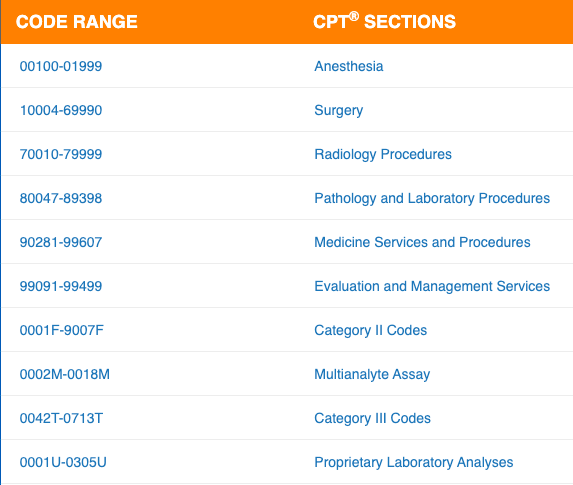

**Source**: https://www.aapc.com/codes/cpt-codes-range/ 


**There is a detailed list present here:** https://www.cms.gov/Medicare/Coding/ICD9ProviderDiagnosticCodes/codes 

For the purpose of categorizing them into less no. of categories to all the family of codes, there is a full list present effective from October 2014. Reference has been taken from there.

**Providers** have different categories as per coding taxonomy list. These providers are nobody but the healthcare providers, which can be Doctors, Nurses and other health care workers, in Hospitals and Private Clinics.

**References for the provider codes**: https://taxonomy.nucc.org/ 

**Major Diagnostic Categories with range of codes**: https://en.wikipedia.org/wiki/Major_Diagnostic_Category 




### Train & Test Outpatient

In [ ]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [ ]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

In [ ]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [ ]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


#### outpatient shape

In [ ]:
train_outpatient.shape

(517737, 27)

####**▶ Conclusion**

train-outpatient has approx. 517.7K rows and 27 columns

In [ ]:
test_outpatient.shape

(125841, 27)

In [ ]:
train_outpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

In [ ]:
test_outpatient.dtypes

BeneID                     object
ClaimID                    object
ClaimStartDt               object
ClaimEndDt                 object
Provider                   object
InscClaimAmtReimbursed      int64
AttendingPhysician         object
OperatingPhysician         object
OtherPhysician             object
ClmDiagnosisCode_1         object
ClmDiagnosisCode_2         object
ClmDiagnosisCode_3         object
ClmDiagnosisCode_4         object
ClmDiagnosisCode_5         object
ClmDiagnosisCode_6         object
ClmDiagnosisCode_7         object
ClmDiagnosisCode_8         object
ClmDiagnosisCode_9         object
ClmDiagnosisCode_10        object
ClmProcedureCode_1        float64
ClmProcedureCode_2        float64
ClmProcedureCode_3        float64
ClmProcedureCode_4        float64
ClmProcedureCode_5        float64
ClmProcedureCode_6        float64
DeductibleAmtPaid           int64
ClmAdmitDiagnosisCode      object
dtype: object

#### outpatient nulls-number and percentage-wise

In [ ]:
train_outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician          1396
OperatingPhysician        427120
OtherPhysician            322691
ClmDiagnosisCode_1         10453
ClmDiagnosisCode_2        195380
ClmDiagnosisCode_3        314480
ClmDiagnosisCode_4        392141
ClmDiagnosisCode_5        443393
ClmDiagnosisCode_6        468981
ClmDiagnosisCode_7        484776
ClmDiagnosisCode_8        494825
ClmDiagnosisCode_9        502899
ClmDiagnosisCode_10       516654
ClmProcedureCode_1        517575
ClmProcedureCode_2        517701
ClmProcedureCode_3        517733
ClmProcedureCode_4        517735
ClmProcedureCode_5        517737
ClmProcedureCode_6        517737
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     412312
dtype: int64

In [ ]:
test_outpatient.isnull().sum()

BeneID                         0
ClaimID                        0
ClaimStartDt                   0
ClaimEndDt                     0
Provider                       0
InscClaimAmtReimbursed         0
AttendingPhysician           316
OperatingPhysician        104237
OtherPhysician             78222
ClmDiagnosisCode_1          2578
ClmDiagnosisCode_2         47731
ClmDiagnosisCode_3         76575
ClmDiagnosisCode_4         95371
ClmDiagnosisCode_5        107875
ClmDiagnosisCode_6        114035
ClmDiagnosisCode_7        117871
ClmDiagnosisCode_8        120310
ClmDiagnosisCode_9        122278
ClmDiagnosisCode_10       125578
ClmProcedureCode_1        125807
ClmProcedureCode_2        125832
ClmProcedureCode_3        125839
ClmProcedureCode_4        125841
ClmProcedureCode_5        125841
ClmProcedureCode_6        125841
DeductibleAmtPaid              0
ClmAdmitDiagnosisCode     100036
dtype: int64

In [ ]:
print((train_outpatient.isnull().sum()/train_outpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

In [ ]:
print((test_outpatient.isnull().sum()/test_outpatient.shape[0])*100, '%')

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.251111
OperatingPhysician         82.832304
OtherPhysician             62.159392
ClmDiagnosisCode_1          2.048617
ClmDiagnosisCode_2         37.929610
ClmDiagnosisCode_3         60.850597
ClmDiagnosisCode_4         75.786906
ClmDiagnosisCode_5         85.723254
ClmDiagnosisCode_6         90.618320
ClmDiagnosisCode_7         93.666611
ClmDiagnosisCode_8         95.604771
ClmDiagnosisCode_9         97.168649
ClmDiagnosisCode_10        99.791006
ClmProcedureCode_1         99.972982
ClmProcedureCode_2         99.992848
ClmProcedureCode_3         99.998411
ClmProcedureCode_4        100.000000
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.493965
d

####**▶ Conclusion**

Maximum Claim Diagnosis Codes and Claim procedure codes are nulls in outpatient dataset.

## Data Preprocessing

### Train & Test Beneficiery

#### Preparing Age (From DOD & DOB) columns

In [ ]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_beneficiery['DOB'] = pd.to_datetime(train_beneficiery['DOB'])
train_beneficiery['DOD'] = pd.to_datetime(train_beneficiery['DOD'])

test_beneficiery['DOB'] = pd.to_datetime(test_beneficiery['DOB'])
test_beneficiery['DOD'] = pd.to_datetime(test_beneficiery['DOD'])

In [ ]:
print(train_beneficiery['DOB'].dtype)

print(test_beneficiery['DOB'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_beneficiery['Age'] = (train_beneficiery['DOD']) - (train_beneficiery['DOB'])

test_beneficiery['Age'] = (test_beneficiery['DOD']) - (test_beneficiery['DOB'])

In [ ]:
import numpy as np
# https://stackoverflow.com/a/59960315
train_beneficiery['Age'] = round(train_beneficiery['Age']/np.timedelta64(1, 'Y'), 0)

test_beneficiery['Age'] = round(test_beneficiery['Age']/np.timedelta64(1, 'Y'), 0)

In [ ]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_beneficiery.drop(['DOB', 'DOD'], axis = 'columns', inplace = True)

test_beneficiery.drop(['DOB', 'DOD'], axis = 'columns', inplace = True)

In [ ]:
train_beneficiery['Age'].fillna(0, inplace = True)
test_beneficiery['Age'].fillna(0, inplace = True)

In [ ]:
print(train_beneficiery['Age'].isnull().sum())

print(test_beneficiery['Age'].isnull().sum())

0
0


In [ ]:
train_beneficiery['Age'] = train_beneficiery['Age'].astype('int')

In [ ]:
test_beneficiery['Age'] = test_beneficiery['Age'].astype('int')

In [ ]:
train_beneficiery['Age'].value_counts()

0     137135
68        79
67        76
74        67
75        62
       ...  
41         1
40         1
42         1
39         1
36         1
Name: Age, Length: 65, dtype: int64

In [ ]:
test_beneficiery['Age'].value_counts()

0      63394
75        32
68        31
74        29
67        26
77        23
80        23
81        21
73        19
84        18
82        18
66        18
79        18
70        18
69        17
86        17
78        16
71        16
85        16
72        16
88        14
90        13
83        13
76        11
87         9
89         8
54         7
91         6
55         6
65         6
63         6
61         6
53         5
51         5
64         5
59         5
52         5
50         4
57         4
94         4
46         3
62         3
100        3
93         3
58         3
99         3
95         3
43         2
96         2
48         2
92         2
49         2
98         2
60         1
42         1
44         1
56         1
39         1
47         1
37         1
Name: Age, dtype: int64

#### Creating new isDead feature

In [ ]:
train_beneficiery['isDead'] = train_beneficiery['Age'].replace(to_replace = 0, value='Yes')

test_beneficiery['isDead']  = test_beneficiery['Age'].replace(to_replace = 0, value='Yes')

In [ ]:
s_train_isDead = pd.Series(train_beneficiery['isDead'])
train_beneficiery['isDead'] = s_train_isDead.mask(s_train_isDead != 'Yes', 'No')


s_test_isDead = pd.Series(test_beneficiery['isDead'])
test_beneficiery['isDead'] = s_test_isDead.mask(s_test_isDead != 'Yes', 'No')


In [ ]:
print(train_beneficiery['isDead'].value_counts())

print(test_beneficiery['isDead'].value_counts())

Yes    137135
No       1421
Name: isDead, dtype: int64
Yes    63394
No       574
Name: isDead, dtype: int64


In [ ]:
train_beneficiery.columns

Index(['BeneID', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'isDead'],
      dtype='object')

In [ ]:
test_beneficiery.columns

Index(['BeneID', 'Gender', 'Race', 'RenalDiseaseIndicator', 'State', 'County',
       'NoOfMonths_PartACov', 'NoOfMonths_PartBCov', 'ChronicCond_Alzheimer',
       'ChronicCond_Heartfailure', 'ChronicCond_KidneyDisease',
       'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary',
       'ChronicCond_Depression', 'ChronicCond_Diabetes',
       'ChronicCond_IschemicHeart', 'ChronicCond_Osteoporasis',
       'ChronicCond_rheumatoidarthritis', 'ChronicCond_stroke',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'isDead'],
      dtype='object')

#### BeneID, Gender & Race

In [ ]:
print(train_beneficiery[['BeneID', 'Gender', 'Race']].isnull().sum())

print(test_beneficiery[['BeneID', 'Gender', 'Race']].isnull().sum())

BeneID    0
Gender    0
Race      0
dtype: int64
BeneID    0
Gender    0
Race      0
dtype: int64


#### Preparing Patient's Risk Score (From Chronic Conditions) column

In [ ]:
print(train_beneficiery[['RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', \
                         'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', \
                         'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                         'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', \
                         'ChronicCond_stroke']].isnull().sum())

print(test_beneficiery[['RenalDiseaseIndicator', 'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure', \
                         'ChronicCond_KidneyDisease', 'ChronicCond_Cancer', 'ChronicCond_ObstrPulmonary', \
                         'ChronicCond_Depression', 'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart', \
                         'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis', \
                         'ChronicCond_stroke']].isnull().sum())

RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
dtype: int64
RenalDiseaseIndicator              0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
ChronicCond_Diabetes               0
ChronicCond_IschemicHeart          0
ChronicCond_Osteoporasis           0
ChronicCond_rheumatoidarthritis    0
ChronicCond_stroke                 0
dtype: int64


In [ ]:
# Train & Test RenalDiseaseIndicator
s_train_RenalDiseaseIndicator = pd.Series(train_beneficiery['RenalDiseaseIndicator'])
train_beneficiery['RenalDiseaseIndicator'] = s_train_RenalDiseaseIndicator.mask(s_train_RenalDiseaseIndicator == 'Y', '1')

s_test_RenalDiseaseIndicator = pd.Series(test_beneficiery['RenalDiseaseIndicator'])
test_beneficiery['RenalDiseaseIndicator'] = s_test_RenalDiseaseIndicator.mask(s_test_RenalDiseaseIndicator == 'Y', '1')

# Train & Test ChronicCond_Alzheimer
s_train_ChronicCond_Alzheimer = pd.Series(train_beneficiery['ChronicCond_Alzheimer'])
train_beneficiery['ChronicCond_Alzheimer'] = s_train_ChronicCond_Alzheimer.mask(s_train_ChronicCond_Alzheimer == 2, 0)

s_test_ChronicCond_Alzheimer = pd.Series(test_beneficiery['ChronicCond_Alzheimer'])
test_beneficiery['ChronicCond_Alzheimer'] = s_test_ChronicCond_Alzheimer.mask(s_test_ChronicCond_Alzheimer == 2, 0)

# Train & Test ChronicCond_Heartfailure
s_train_ChronicCond_Heartfailure = pd.Series(train_beneficiery['ChronicCond_Heartfailure'])
train_beneficiery['ChronicCond_Heartfailure'] = s_train_ChronicCond_Heartfailure.mask(s_train_ChronicCond_Heartfailure == 2, 0)

s_test_ChronicCond_Heartfailure = pd.Series(test_beneficiery['ChronicCond_Heartfailure'])
test_beneficiery['ChronicCond_Heartfailure'] = s_test_ChronicCond_Heartfailure.mask(s_test_ChronicCond_Heartfailure == 2, 0)

# Train & Test ChronicCond_KidneyDisease
s_train_ChronicCond_KidneyDisease = pd.Series(train_beneficiery['ChronicCond_KidneyDisease'])
train_beneficiery['ChronicCond_KidneyDisease'] = s_train_ChronicCond_KidneyDisease.mask(s_train_ChronicCond_KidneyDisease == 2, 0)

s_test_ChronicCond_KidneyDisease = pd.Series(test_beneficiery['ChronicCond_KidneyDisease'])
test_beneficiery['ChronicCond_KidneyDisease'] = s_test_ChronicCond_KidneyDisease.mask(s_test_ChronicCond_KidneyDisease == 2, 0)

# Train & Test ChronicCond_Cancer
s_train_ChronicCond_Cancer = pd.Series(train_beneficiery['ChronicCond_Cancer'])
train_beneficiery['ChronicCond_Cancer'] = s_train_ChronicCond_Cancer.mask(s_train_ChronicCond_Cancer == 2, 0)

s_test_ChronicCond_Cancer = pd.Series(test_beneficiery['ChronicCond_Cancer'])
test_beneficiery['ChronicCond_Cancer'] = s_test_ChronicCond_Cancer.mask(s_test_ChronicCond_Cancer == 2, 0)

# Train & Test ChronicCond_ObstrPulmonary
s_train_ChronicCond_ObstrPulmonary = pd.Series(train_beneficiery['ChronicCond_ObstrPulmonary'])
train_beneficiery['ChronicCond_ObstrPulmonary'] = s_train_ChronicCond_ObstrPulmonary.mask(s_train_ChronicCond_ObstrPulmonary == 2, 0)


s_test_ChronicCond_ObstrPulmonary = pd.Series(test_beneficiery['ChronicCond_ObstrPulmonary'])
test_beneficiery['ChronicCond_ObstrPulmonary'] = s_test_ChronicCond_ObstrPulmonary.mask(s_test_ChronicCond_ObstrPulmonary == 2, 0)

# Train & Test ChronicCond_Depression
s_train_ChronicCond_Depression = pd.Series(train_beneficiery['ChronicCond_Depression'])
train_beneficiery['ChronicCond_Depression'] = s_train_ChronicCond_Depression.mask(s_train_ChronicCond_Depression == 2, 0)

s_test_ChronicCond_Depression = pd.Series(test_beneficiery['ChronicCond_Depression'])
test_beneficiery['ChronicCond_Depression'] = s_test_ChronicCond_Depression.mask(s_test_ChronicCond_Depression == 2, 0)

# Train & Test ChronicCond_Diabetes
s_train_ChronicCond_Diabetes = pd.Series(train_beneficiery['ChronicCond_Diabetes'])
train_beneficiery['ChronicCond_Diabetes'] = s_train_ChronicCond_Diabetes.mask(s_train_ChronicCond_Diabetes == 2, 0)

s_test_ChronicCond_Diabetes = pd.Series(test_beneficiery['ChronicCond_Diabetes'])
test_beneficiery['ChronicCond_Diabetes'] = s_test_ChronicCond_Diabetes.mask(s_test_ChronicCond_Diabetes == 2, 0)

# Train & Test ChronicCond_IschemicHeart
s_train_ChronicCond_IschemicHeart = pd.Series(train_beneficiery['ChronicCond_IschemicHeart'])
train_beneficiery['ChronicCond_IschemicHeart'] = s_train_ChronicCond_IschemicHeart.mask(s_train_ChronicCond_IschemicHeart == 2, 0)

s_test_ChronicCond_IschemicHeart = pd.Series(test_beneficiery['ChronicCond_IschemicHeart'])
test_beneficiery['ChronicCond_IschemicHeart'] = s_test_ChronicCond_IschemicHeart.mask(s_test_ChronicCond_IschemicHeart == 2, 0)

# Train & Test ChronicCond_Osteoporasis
s_train_ChronicCond_Osteoporasis = pd.Series(train_beneficiery['ChronicCond_Osteoporasis'])
train_beneficiery['ChronicCond_Osteoporasis'] = s_train_ChronicCond_Osteoporasis.mask(s_train_ChronicCond_Osteoporasis == 2, 0)

s_test_ChronicCond_Osteoporasis = pd.Series(test_beneficiery['ChronicCond_Osteoporasis'])
test_beneficiery['ChronicCond_Osteoporasis'] = s_test_ChronicCond_Osteoporasis.mask(s_test_ChronicCond_Osteoporasis == 2, 0)

# Train & Test ChronicCond_rheumatoidarthritis
s_train_ChronicCond_rheumatoidarthritis = pd.Series(train_beneficiery['ChronicCond_rheumatoidarthritis'])
train_beneficiery['ChronicCond_rheumatoidarthritis'] = s_train_ChronicCond_rheumatoidarthritis.mask(s_train_ChronicCond_rheumatoidarthritis == 2, 0)

s_test_ChronicCond_rheumatoidarthritis = pd.Series(test_beneficiery['ChronicCond_rheumatoidarthritis'])
test_beneficiery['ChronicCond_rheumatoidarthritis'] = s_test_ChronicCond_rheumatoidarthritis.mask(s_test_ChronicCond_rheumatoidarthritis == 2, 0)

# Train & Test ChronicCond_stroke
s_train_ChronicCond_stroke = pd.Series(train_beneficiery['ChronicCond_stroke'])
train_beneficiery['ChronicCond_stroke'] = s_train_ChronicCond_stroke.mask(s_train_ChronicCond_stroke == 2, 0)

s_test_ChronicCond_stroke = pd.Series(test_beneficiery['ChronicCond_stroke'])
test_beneficiery['ChronicCond_stroke'] = s_test_ChronicCond_stroke.mask(s_test_ChronicCond_stroke == 2, 0)



In [ ]:
train_beneficiery['Risk_Score'] = train_beneficiery['RenalDiseaseIndicator'].astype('int') + \
                                  train_beneficiery['ChronicCond_Alzheimer'].astype('int')  + \
                                  train_beneficiery['ChronicCond_Heartfailure'].astype('int') + \
                                  train_beneficiery['ChronicCond_KidneyDisease'].astype('int')  + \
                                  train_beneficiery['ChronicCond_Cancer'].astype('int')  + \
                                  train_beneficiery['ChronicCond_ObstrPulmonary'].astype('int') + \
                                  train_beneficiery['ChronicCond_Depression'].astype('int')  + \
                                  train_beneficiery['ChronicCond_Diabetes'].astype('int')  + \
                                  train_beneficiery['ChronicCond_IschemicHeart'].astype('int') + \
                                  train_beneficiery['ChronicCond_Osteoporasis'].astype('int')  + \
                                  train_beneficiery['ChronicCond_rheumatoidarthritis'].astype('int') + \
                                  train_beneficiery['ChronicCond_stroke'].astype('int')

test_beneficiery['Risk_Score'] = test_beneficiery['RenalDiseaseIndicator'].astype('int') + \
                                  test_beneficiery['ChronicCond_Alzheimer'].astype('int')  + \
                                  test_beneficiery['ChronicCond_Heartfailure'].astype('int') + \
                                  test_beneficiery['ChronicCond_KidneyDisease'].astype('int')  + \
                                  test_beneficiery['ChronicCond_Cancer'].astype('int')  + \
                                  test_beneficiery['ChronicCond_ObstrPulmonary'].astype('int') + \
                                  test_beneficiery['ChronicCond_Depression'].astype('int')  + \
                                  test_beneficiery['ChronicCond_Diabetes'].astype('int')  + \
                                  test_beneficiery['ChronicCond_IschemicHeart'].astype('int') + \
                                  test_beneficiery['ChronicCond_Osteoporasis'].astype('int')  + \
                                  test_beneficiery['ChronicCond_rheumatoidarthritis'].astype('int') + \
                                  test_beneficiery['ChronicCond_stroke'].astype('int')


In [ ]:
print(train_beneficiery['Risk_Score'].value_counts())

print(test_beneficiery['Risk_Score'].value_counts())

3     19649
4     19257
2     18994
5     16716
1     15868
6     14120
0     11081
7     10686
8      6995
9      3499
10     1362
11      295
12       34
Name: Risk_Score, dtype: int64
4     9015
3     8754
5     8345
2     7752
6     7445
1     5979
7     5933
8     4036
0     3551
9     2087
10     857
11     187
12      27
Name: Risk_Score, dtype: int64


#### Dropping unnecessary columns

In [ ]:
train_beneficiery.drop(['RenalDiseaseIndicator', \
                         'ChronicCond_Alzheimer', \
                         'ChronicCond_Heartfailure', \
                         'ChronicCond_KidneyDisease', \
                         'ChronicCond_Cancer', \
                         'ChronicCond_ObstrPulmonary', \
                         'ChronicCond_Depression', \
                         'ChronicCond_Diabetes', \
                         'ChronicCond_IschemicHeart', \
                         'ChronicCond_Osteoporasis', \
                         'ChronicCond_rheumatoidarthritis', \
                         'ChronicCond_stroke'], inplace = True, axis = 'columns')

test_beneficiery.drop(['RenalDiseaseIndicator', \
                        'ChronicCond_Alzheimer', \
                        'ChronicCond_Heartfailure', \
                        'ChronicCond_KidneyDisease', \
                        'ChronicCond_Cancer', \
                        'ChronicCond_ObstrPulmonary', \
                        'ChronicCond_Depression', \
                        'ChronicCond_Diabetes', \
                        'ChronicCond_IschemicHeart', \
                        'ChronicCond_Osteoporasis', \
                        'ChronicCond_rheumatoidarthritis', \
                        'ChronicCond_stroke'], inplace = True, axis = 'columns')


#### Inpatient Annual Reimbursement & Deductible Amounts

In [ ]:
print(train_beneficiery[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']].isnull().sum())

print(test_beneficiery[['IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt']].isnull().sum())

IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
dtype: int64
IPAnnualReimbursementAmt    0
IPAnnualDeductibleAmt       0
dtype: int64


#### Outpatient Annual Reimbursement & Deductible Amounts

In [ ]:
print(train_beneficiery[['OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].isnull().sum())

print(test_beneficiery[['OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt']].isnull().sum())

OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
dtype: int64
OPAnnualReimbursementAmt    0
OPAnnualDeductibleAmt       0
dtype: int64


In [ ]:
print(train_beneficiery.columns)

print(test_beneficiery.columns)

Index(['BeneID', 'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead', 'Risk_Score'],
      dtype='object')
Index(['BeneID', 'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age', 'isDead', 'Risk_Score'],
      dtype='object')


In [ ]:
print(train_beneficiery.dtypes)

print(test_beneficiery.dtypes)

BeneID                      object
Gender                       int64
Race                         int64
State                        int64
County                       int64
NoOfMonths_PartACov          int64
NoOfMonths_PartBCov          int64
IPAnnualReimbursementAmt     int64
IPAnnualDeductibleAmt        int64
OPAnnualReimbursementAmt     int64
OPAnnualDeductibleAmt        int64
Age                          int64
isDead                      object
Risk_Score                   int64
dtype: object
BeneID                      object
Gender                       int64
Race                         int64
State                        int64
County                       int64
NoOfMonths_PartACov          int64
NoOfMonths_PartBCov          int64
IPAnnualReimbursementAmt     int64
IPAnnualDeductibleAmt        int64
OPAnnualReimbursementAmt     int64
OPAnnualDeductibleAmt        int64
Age                          int64
isDead                      object
Risk_Score                   int64
dtype:

### Train & Test Inpatient

#### Claim Duration(From ClaimStartDt and ClaimEndDt) columns

In [ ]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_inpatient['ClaimStartDt'] = pd.to_datetime(train_inpatient['ClaimStartDt'])
train_inpatient['ClaimEndDt'] = pd.to_datetime(train_inpatient['ClaimEndDt'])

test_inpatient['ClaimStartDt'] = pd.to_datetime(test_inpatient['ClaimStartDt'])
test_inpatient['ClaimEndDt'] = pd.to_datetime(test_inpatient['ClaimEndDt'])

In [ ]:
print(train_inpatient['ClaimStartDt'].dtype)

print(test_inpatient['ClaimStartDt'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_inpatient['Claim_duration_inpatient'] = (train_inpatient['ClaimEndDt']) - (train_inpatient['ClaimStartDt'])

test_inpatient['Claim_duration_inpatient'] = (test_inpatient['ClaimEndDt']) - (test_inpatient['ClaimStartDt'])

In [ ]:
train_inpatient['Claim_duration_inpatient'] = train_inpatient['Claim_duration_inpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [ ]:
test_inpatient['Claim_duration_inpatient'] = test_inpatient['Claim_duration_inpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [ ]:
train_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,...,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,...,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,...,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,...,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17


In [ ]:
test_inpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,...,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient
0,BENE11014,CLM67387,2009-09-09,2009-09-16,PRV57070,9000,PHY317786,PHY427017,NaN,2009-09-09,...,570,41071,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,7
1,BENE11017,CLM31237,2008-12-25,2009-01-08,PRV54750,14000,PHY314656,PHY426644,NaN,2008-12-25,...,29570,34831,NaN,5551.0,NaN,NaN,NaN,NaN,NaN,14
2,BENE11026,CLM78930,2009-12-09,2009-12-13,PRV53758,2000,PHY349495,NaN,NaN,2009-12-09,...,7813,4254,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,BENE11031,CLM56810,2009-06-23,2009-07-06,PRV55825,16000,PHY429538,PHY371893,NaN,2009-06-23,...,41400,5849,41401,8152.0,3320.0,NaN,NaN,NaN,NaN,13
4,BENE11085,CLM34625,2009-01-20,2009-01-31,PRV52338,19000,PHY397161,NaN,NaN,2009-01-20,...,7242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11


In [ ]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_inpatient.drop(['ClaimStartDt', 'ClaimEndDt'], axis = 'columns', inplace = True)

test_inpatient.drop(['ClaimStartDt', 'ClaimEndDt'], axis = 'columns', inplace = True)

In [ ]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration_inpatient'],
      dtype='object')

In [ ]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
      dtype='object')

#### Physicians(From Attending, Operating & Other) columns

In [ ]:
train_inpatient['AttendingPhysician'].fillna('None', inplace = True)
train_inpatient['OperatingPhysician'].fillna('None', inplace = True)
train_inpatient['OtherPhysician'].fillna('None', inplace = True)

test_inpatient['AttendingPhysician'].fillna('None', inplace = True)
test_inpatient['OperatingPhysician'].fillna('None', inplace = True)
test_inpatient['OtherPhysician'].fillna('None', inplace = True)

In [ ]:
# pandas remove numbers from string: https://stackoverflow.com/a/41719470/10974488
train_inpatient['AttendingPhysician'] = train_inpatient['AttendingPhysician'].str.replace('\d+', '')
train_inpatient['OperatingPhysician'] = train_inpatient['OperatingPhysician'].str.replace('\d+', '')
train_inpatient['OtherPhysician'] = train_inpatient['OtherPhysician'].str.replace('\d+', '')
train_inpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
train_inpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
train_inpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

test_inpatient['AttendingPhysician'] = test_inpatient['AttendingPhysician'].str.replace('\d+', '')
test_inpatient['OperatingPhysician'] = test_inpatient['OperatingPhysician'].str.replace('\d+', '')
test_inpatient['OtherPhysician'] = test_inpatient['OtherPhysician'].str.replace('\d+', '')
test_inpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
test_inpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
test_inpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

In [ ]:
# concatenate columns pandas: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
train_inpatient['Physicians_inpatient'] = train_inpatient['AttendingPhysician'] + train_inpatient['OperatingPhysician'] + train_inpatient['OtherPhysician']

test_inpatient['Physicians_inpatient'] = test_inpatient['AttendingPhysician'] + test_inpatient['OperatingPhysician'] + test_inpatient['OtherPhysician']

In [ ]:
print(train_inpatient['Physicians_inpatient'].value_counts())

print(test_inpatient['Physicians_inpatient'].value_counts())

APOPPNone       20413
APNoneNone      15260
APOPPOTP         3411
APNoneOTP        1278
NoneNoneNone      106
NoneOPPNone         5
NoneOPPOTP          1
Name: Physicians_inpatient, dtype: int64
APOPPNone       4838
APNoneNone      3669
APOPPOTP         749
APNoneOTP        264
NoneNoneNone      29
NoneOPPNone        2
Name: Physicians_inpatient, dtype: int64


In [ ]:
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
train_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

test_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
test_inpatient['Physicians_inpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

In [ ]:
print(train_inpatient['Physicians_inpatient'].value_counts())
print(test_inpatient['Physicians_inpatient'].value_counts())

AP_OPP        20413
AP            15260
AP_OPP_OTP     3411
AP_OTP         1278
None            106
OPP               5
OPP_OTP           1
Name: Physicians_inpatient, dtype: int64
AP_OPP        4838
AP            3669
AP_OPP_OTP     749
AP_OTP         264
None            29
OPP              2
Name: Physicians_inpatient, dtype: int64


In [ ]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_inpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

test_inpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

In [ ]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration_inpatient', 'Physicians_inpatient'],
      dtype='object')

In [ ]:
test_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AdmissionDt', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DischargeDt', 'DiagnosisGroupCode', 'ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10',
       'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
       'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',
       'Claim_duration_inpatient', 'Physicians_inpatient'],
      dtype='object')

#### Hospital Stay Duration (From AdmissionDt and DischargeDt) columns

In [ ]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_inpatient['DischargeDt'] = pd.to_datetime(train_inpatient['DischargeDt'])
train_inpatient['AdmissionDt'] = pd.to_datetime(train_inpatient['AdmissionDt'])

test_inpatient['DischargeDt'] = pd.to_datetime(test_inpatient['DischargeDt'])
test_inpatient['AdmissionDt'] = pd.to_datetime(test_inpatient['AdmissionDt'])

In [ ]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_inpatient['Hospital_Stay_Duration'] = (train_inpatient['DischargeDt']) - (train_inpatient['AdmissionDt'])

test_inpatient['Hospital_Stay_Duration'] = (test_inpatient['DischargeDt']) - (test_inpatient['AdmissionDt'])

In [ ]:
print(train_inpatient['Hospital_Stay_Duration'])

print(test_inpatient['Hospital_Stay_Duration'])

0        6 days
1        2 days
2        3 days
3        8 days
4       17 days
          ...  
40469    4 days
40470    3 days
40471    4 days
40472    1 days
40473    8 days
Name: Hospital_Stay_Duration, Length: 40474, dtype: timedelta64[ns]
0       7 days
1      14 days
2       4 days
3      13 days
4      11 days
         ...  
9546    2 days
9547   13 days
9548   35 days
9549    3 days
9550    1 days
Name: Hospital_Stay_Duration, Length: 9551, dtype: timedelta64[ns]


#### dropping uneccesary columns

In [ ]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_inpatient.drop(['AdmissionDt', 'DischargeDt'], axis = 'columns', inplace = True)

test_inpatient.drop(['AdmissionDt', 'DischargeDt'], axis = 'columns', inplace = True)

In [ ]:
train_inpatient['Hospital_Stay_Duration'] = train_inpatient['Hospital_Stay_Duration'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [ ]:
test_inpatient['Hospital_Stay_Duration'] = test_inpatient['Hospital_Stay_Duration'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [ ]:
train_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient,Physicians_inpatient,Hospital_Stay_Duration
0,BENE11001,CLM46614,PRV55912,26000,7866,1068.0,201,1970,4019,5853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,AP,6
1,BENE11001,CLM66048,PRV55907,5000,6186,1068.0,750,6186,2948,56400,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,AP_OPP,2
2,BENE11001,CLM68358,PRV56046,5000,29590,1068.0,883,29623,30390,71690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,AP_OTP,3
3,BENE11011,CLM38412,PRV52405,5000,431,1068.0,067,43491,2762,7843,...,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,AP_OPP_OTP,8
4,BENE11014,CLM63689,PRV56614,10000,78321,1068.0,975,042,3051,34400,...,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,AP_OPP,17


In [ ]:
test_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient,Physicians_inpatient,Hospital_Stay_Duration
0,BENE11014,CLM67387,PRV57070,9000,5789,1068.0,332,5780,5533,496,...,4280,4443.0,5849.0,NaN,NaN,NaN,NaN,7,AP_OPP,7
1,BENE11017,CLM31237,PRV54750,14000,5939,1068.0,661,1889,41071,5990,...,NaN,5551.0,NaN,NaN,NaN,NaN,NaN,14,AP_OPP,14
2,BENE11026,CLM78930,PRV53758,2000,4019,1068.0,241,4010,78791,60000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,AP,4
3,BENE11031,CLM56810,PRV55825,16000,8208,1068.0,564,8208,4168,920,...,41401,8152.0,3320.0,NaN,NaN,NaN,NaN,13,AP_OPP,13
4,BENE11085,CLM34625,PRV52338,19000,4279,1068.0,880,29654,V142,78702,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,AP,11


In [ ]:
train_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_duration_inpatient',
       'Physicians_inpatient', 'Hospital_Stay_Duration'],
      dtype='object')

In [ ]:
test_inpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'DiagnosisGroupCode',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'Claim_duration_inpatient',
       'Physicians_inpatient', 'Hospital_Stay_Duration'],
      dtype='object')

#### Preparing Diagnosis Group Codes

##### Pre-MDC 001 - 017

In [ ]:
# how to prefix prefix in str in python: https://stackoverflow.com/a/33941393/10974488
pre_mdc1 = [f"00{i}" for i in range(1,10)]
pre_mdc2 = [f"0{i}" for i in range(10, 18)]
pre_mdc = pre_mdc1+pre_mdc2

s_DiagnosisGroupCode1_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode1_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode1_train.mask(s_DiagnosisGroupCode1_train.isin(pre_mdc), 'Pre-MDC')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode1_test.mask(s_DiagnosisGroupCode1_test.isin(pre_mdc), 'Pre-MDC')

##### Diseases and Disorders of the Nervous System 020 - 103


In [ ]:
# how to prefix prefix in str in python: https://stackoverflow.com/a/33941393/10974488
ns1 = [f"0{i}" for i in range(20,100)]
ns2 = [f"{i}" for i in range(100, 104)]
ns = ns1+ns2

s_DiagnosisGroupCode2_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode2_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode2_train.mask(s_DiagnosisGroupCode2_train.isin(ns), 'Nervous-System')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode2_test.mask(s_DiagnosisGroupCode2_test.isin(ns), 'Nervous-System')

##### Diseases and Disorders of the Eye 113 - 125


In [ ]:
eye = [f"{i}" for i in range(113, 126)]


s_DiagnosisGroupCode3_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode3_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode3_train.mask(s_DiagnosisGroupCode3_train.isin(eye), 'Eye')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode3_test.mask(s_DiagnosisGroupCode3_test.isin(eye), 'Eye')

##### Diseases and Disorders of the Ear, Nose, Mouth And Throat 129 - 159


In [ ]:
ent = [f"{i}" for i in range(129, 160)]


s_DiagnosisGroupCode4_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode4_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode4_train.mask(s_DiagnosisGroupCode4_train.isin(ent), 'ENT')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode4_test.mask(s_DiagnosisGroupCode4_test.isin(ent), 'ENT')

##### Diseases and Disorders of the Respiratory System 163 - 208


In [ ]:
respiratory = [f"{i}" for i in range(163, 209)]


s_DiagnosisGroupCode5_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode5_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode5_train.mask(s_DiagnosisGroupCode5_train.isin(respiratory), 'Respiratory')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode5_test.mask(s_DiagnosisGroupCode5_test.isin(respiratory), 'Respiratory')

##### Diseases and Disorders of the Circulatory System 215 - 316


In [ ]:
circulatory = [f"{i}" for i in range(215, 317)]


s_DiagnosisGroupCode6_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode6_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode6_train.mask(s_DiagnosisGroupCode6_train.isin(circulatory), 'Circulatory')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode6_test.mask(s_DiagnosisGroupCode6_test.isin(circulatory), 'Circulatory')

##### Diseases and Disorders of the Digestive System 326 - 395


In [ ]:
digestive = [f"{i}" for i in range(326, 396)]


s_DiagnosisGroupCode7_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode7_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode7_train.mask(s_DiagnosisGroupCode7_train.isin(digestive), 'Digestive')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode7_test.mask(s_DiagnosisGroupCode7_test.isin(digestive), 'Digestive')

##### Diseases and Disorders of the Hepatobiliary System And Pancreas 405 - 446

In [ ]:
hepatobiliary = [f"{i}" for i in range(405, 447)]


s_DiagnosisGroupCode8_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode8_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode8_train.mask(s_DiagnosisGroupCode8_train.isin(hepatobiliary), 'Hepatobiliary')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode8_test.mask(s_DiagnosisGroupCode8_test.isin(hepatobiliary), 'Hepatobiliary')

##### Diseases and Disorders of the Musculoskeletal System And Connective Tissue 453 - 566


In [ ]:
musculoskeletal = [f"{i}" for i in range(453, 567)]


s_DiagnosisGroupCode9_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode9_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode9_train.mask(s_DiagnosisGroupCode9_train.isin(musculoskeletal), 'Musculoskeletal')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode9_test.mask(s_DiagnosisGroupCode9_test.isin(musculoskeletal), 'Musculoskeletal')

##### Diseases and Disorders of the Skin, Subcutaneous Tissue And Breast 573 - 607


In [ ]:
skin_tissue = [f"{i}" for i in range(573, 608)]


s_DiagnosisGroupCode10_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode10_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode10_train.mask(s_DiagnosisGroupCode10_train.isin(skin_tissue), 'Skin_Tissue')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode10_test.mask(s_DiagnosisGroupCode10_test.isin(skin_tissue), 'Skin_Tissue')

##### Diseases and Disorders of the Endocrine, Nutritional And Metabolic System 614 - 645


In [ ]:
endocrine = [f"{i}" for i in range(614, 646)]


s_DiagnosisGroupCode11_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode11_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode11_train.mask(s_DiagnosisGroupCode11_train.isin(endocrine), 'Endocrine')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode11_test.mask(s_DiagnosisGroupCode11_test.isin(endocrine), 'Endocrine')

##### Diseases and Disorders of the Kidney And Urinary Tract 652 - 700


In [ ]:
nephrology = [f"{i}" for i in range(652, 701)]


s_DiagnosisGroupCode12_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode12_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode12_train.mask(s_DiagnosisGroupCode12_train.isin(nephrology), 'Nephrology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode12_test.mask(s_DiagnosisGroupCode12_test.isin(nephrology), 'Nephrology')

##### Diseases and Disorders of the Male Reproductive System 707 - 730


In [ ]:
andrology = [f"{i}" for i in range(707, 731)]


s_DiagnosisGroupCode13_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode13_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode13_train.mask(s_DiagnosisGroupCode13_train.isin(andrology), 'Andrology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode13_test.mask(s_DiagnosisGroupCode13_test.isin(andrology), 'Andrology')

##### Diseases and Disorders of the Female Reproductive System 734 - 761


In [ ]:
gynaecology = [f"{i}" for i in range(734, 762)]


s_DiagnosisGroupCode14_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode14_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode14_train.mask(s_DiagnosisGroupCode14_train.isin(gynaecology), 'Gynaecology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode14_test.mask(s_DiagnosisGroupCode14_test.isin(gynaecology), 'Gynaecology')

##### Pregnancy, Childbirth And Puerperium 765 - 782


In [ ]:
obstetrics = [f"{i}" for i in range(765, 783)]


s_DiagnosisGroupCode15_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode15_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode15_train.mask(s_DiagnosisGroupCode15_train.isin(obstetrics), 'Obstetrics')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode15_test.mask(s_DiagnosisGroupCode15_test.isin(obstetrics), 'Obstetrics')

##### Newborn And Other Neonates (Perinatal Period) 789 - 795


In [ ]:
pediatrics = [f"{i}" for i in range(789, 796)]


s_DiagnosisGroupCode16_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode16_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode16_train.mask(s_DiagnosisGroupCode16_train.isin(pediatrics), 'Pediatrics')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode16_test.mask(s_DiagnosisGroupCode16_test.isin(pediatrics), 'Pediatrics')

##### Diseases and Disorders of the Blood and Blood Forming Organs and Immunological Disorders 799 - 816


In [ ]:
haematology = [f"{i}" for i in range(799, 817)]


s_DiagnosisGroupCode17_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode17_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode17_train.mask(s_DiagnosisGroupCode17_train.isin(haematology), 'Haematology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode17_test.mask(s_DiagnosisGroupCode17_test.isin(haematology), 'Haematology')

##### Myeloproliferative DDs (Poorly Differentiated Neoplasms 820 - 849


In [ ]:
onco_pathology = [f"{i}" for i in range(820, 850)]


s_DiagnosisGroupCode18_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode18_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode18_train.mask(s_DiagnosisGroupCode18_train.isin(onco_pathology), 'Onco-Pathology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode18_test.mask(s_DiagnosisGroupCode18_test.isin(onco_pathology), 'Onco-Pathology')

##### Infectious and Parasitic DDs (Systemic or unspecified sites) 853 - 872


In [ ]:
pathology = [f"{i}" for i in range(853, 873)]


s_DiagnosisGroupCode19_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode19_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode19_train.mask(s_DiagnosisGroupCode19_train.isin(pathology), 'Pathology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode19_test.mask(s_DiagnosisGroupCode19_test.isin(pathology), 'Pathology')

##### Mental Diseases and Disorders 876 - 887


In [ ]:
psych = [f"{i}" for i in range(876, 888)]


s_DiagnosisGroupCode20_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode20_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode20_train.mask(s_DiagnosisGroupCode20_train.isin(psych), 'Psychology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode20_test.mask(s_DiagnosisGroupCode20_test.isin(psych), 'Psychology')

##### Alcohol/Drug Use or Induced Mental Disorders 894 - 897


In [ ]:
psych_addiction = [f"{i}" for i in range(894, 898)]


s_DiagnosisGroupCode21_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode21_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode21_train.mask(s_DiagnosisGroupCode21_train.isin(psych_addiction), 'Psychological_Addiction')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode21_test.mask(s_DiagnosisGroupCode21_test.isin(psych_addiction), 'Psychological_Addiction')

##### Injuries, Poison And Toxic Effect of Drugs 901 - 923


In [ ]:
toxicology = [f"{i}" for i in range(901, 924)]


s_DiagnosisGroupCode22_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode22_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode22_train.mask(s_DiagnosisGroupCode22_train.isin(toxicology), 'Toxicology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode22_test.mask(s_DiagnosisGroupCode22_test.isin(toxicology), 'Toxicology')

##### Burns 927 - 935


In [ ]:
dermatology = [f"{i}" for i in range(927, 936)]


s_DiagnosisGroupCode23_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode23_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode23_train.mask(s_DiagnosisGroupCode23_train.isin(dermatology), 'Dermatology')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode23_test.mask(s_DiagnosisGroupCode23_test.isin(dermatology), 'Dermatology')

##### Factors Influencing Health Status and Other Contacts with Health Services 939 - 951


In [ ]:
health_logistics = [f"{i}" for i in range(939, 952)]


s_DiagnosisGroupCode24_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode24_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode24_train.mask(s_DiagnosisGroupCode24_train.isin(health_logistics), 'Health_Logistics')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode24_test.mask(s_DiagnosisGroupCode24_test.isin(health_logistics), 'Health_Logistics')

##### Multiple Significant Trauma 955 - 965


In [ ]:
trauma = [f"{i}" for i in range(955, 966)]


s_DiagnosisGroupCode25_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode25_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode25_train.mask(s_DiagnosisGroupCode25_train.isin(trauma), 'Trauma')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode25_test.mask(s_DiagnosisGroupCode25_test.isin(trauma), 'Trauma')

##### Human Immunodeficiency Virus Infection 969 - 977


In [ ]:
hiv_aids = [f"{i}" for i in range(969, 978)]


s_DiagnosisGroupCode26_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode26_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode26_train.mask(s_DiagnosisGroupCode26_train.isin(hiv_aids), 'HIV-AIDS')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode26_test.mask(s_DiagnosisGroupCode26_test.isin(hiv_aids), 'HIV-AIDS')

##### MDC Category Missing 981 - 989, 998 - 999

In [ ]:
mdc = [f"{i}" for i in range(981, 990)] + ['998', '999']


s_DiagnosisGroupCode27_train = pd.Series(train_inpatient['DiagnosisGroupCode'].astype('str'))
s_DiagnosisGroupCode27_test = pd.Series(test_inpatient['DiagnosisGroupCode'].astype('str'))
# how to check if value in a pandas series is present in a list: https://stackoverflow.com/a/40429755/10974488
train_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode27_train.mask(s_DiagnosisGroupCode27_train.isin(mdc), 'MDC')
test_inpatient['DiagnosisGroupCode'] = s_DiagnosisGroupCode27_test.mask(s_DiagnosisGroupCode27_test.isin(mdc), 'MDC')

##### Total Groups under Diagnosis Codes 

In [ ]:
train_inpatient['DiagnosisGroupCode'].value_counts()

Circulatory                9121
Respiratory                5658
Musculoskeletal            4800
Digestive                  4068
Nervous-System             3012
Nephrology                 2526
Pathology                  1715
Endocrine                  1454
Health_Logistics           1440
Psychology                 1410
Hepatobiliary              1088
Skin_Tissue                 964
Haematology                 539
Toxicology                  436
Gynaecology                 338
ENT                         301
Andrology                   274
Onco-Pathology              254
Psychological_Addiction     253
MDC                         244
Pre-MDC                     166
000                         134
OTH                         113
Trauma                       44
Obstetrics                   42
HIV-AIDS                     40
Eye                          27
Dermatology                  13
Name: DiagnosisGroupCode, dtype: int64

In [ ]:
test_inpatient['DiagnosisGroupCode'].value_counts()

Circulatory                2155
Respiratory                1372
Musculoskeletal            1043
Digestive                   974
Nervous-System              761
Nephrology                  545
Pathology                   433
Health_Logistics            356
Psychology                  349
Endocrine                   324
Hepatobiliary               237
Skin_Tissue                 223
Haematology                 131
Toxicology                  103
Gynaecology                  76
Psychological_Addiction      69
Onco-Pathology               68
Andrology                    63
MDC                          62
ENT                          60
Pre-MDC                      47
000                          31
OTH                          29
Trauma                       13
Eye                          10
HIV-AIDS                      8
Obstetrics                    7
Dermatology                   2
Name: DiagnosisGroupCode, dtype: int64

### Train & Test Outpatient

#### Claim Duration(From ClaimStartDt and ClaimEndDt) feature

In [ ]:
# pd.to_datetime: https://www.geeksforgeeks.org/python-pandas-to_datetime/

train_outpatient['ClaimStartDt'] = pd.to_datetime(train_outpatient['ClaimStartDt'])
train_outpatient['ClaimEndDt'] = pd.to_datetime(train_outpatient['ClaimEndDt'])
test_outpatient['ClaimStartDt'] = pd.to_datetime(test_outpatient['ClaimStartDt'])
test_outpatient['ClaimEndDt'] = pd.to_datetime(test_outpatient['ClaimEndDt'])

In [ ]:
print(train_outpatient['ClaimStartDt'].dtype)
print(test_outpatient['ClaimStartDt'].dtype)

datetime64[ns]
datetime64[ns]


In [ ]:
# pd.to_datetime: https://www.kite.com/python/answers/how-to-calculate-a-pandas-dataframe-time-difference-between-two-columns-in-python
train_outpatient['Claim_duration_outpatient'] = (train_outpatient['ClaimEndDt']) - (train_outpatient['ClaimStartDt'])
test_outpatient['Claim_duration_outpatient'] = (test_outpatient['ClaimEndDt']) - (test_outpatient['ClaimStartDt'])

In [ ]:
train_outpatient['Claim_duration_outpatient']

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
517732   0 days
517733   0 days
517734   0 days
517735   0 days
517736   1 days
Name: Claim_duration_outpatient, Length: 517737, dtype: timedelta64[ns]

In [ ]:
test_outpatient['Claim_duration_outpatient']

0        0 days
1        0 days
2        0 days
3        0 days
4        0 days
          ...  
125836   0 days
125837   0 days
125838   0 days
125839   0 days
125840   0 days
Name: Claim_duration_outpatient, Length: 125841, dtype: timedelta64[ns]

In [ ]:
train_outpatient['Claim_duration_outpatient'] = train_outpatient['Claim_duration_outpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [ ]:
test_outpatient['Claim_duration_outpatient'] = test_outpatient['Claim_duration_outpatient'].astype('str').str.replace(pat = r" days", repl = '').astype('int')

In [ ]:
train_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_duration_outpatient
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0


In [ ]:
test_outpatient.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_duration_outpatient
0,BENE11001,CLM392397,2009-06-02,2009-06-02,PRV55962,30,PHY347633,NaN,PHY347633,V5832,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
1,BENE11001,CLM430760,2009-06-23,2009-06-23,PRV56112,30,PHY381777,NaN,PHY381777,9594,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
2,BENE11007,CLM233081,2009-03-07,2009-03-07,PRV56979,200,PHY425311,NaN,PHY425311,7248,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0
3,BENE11007,CLM496381,2009-07-29,2009-07-29,PRV56573,10,PHY393253,PHY347995,NaN,58889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,5939,0
4,BENE11007,CLM521391,2009-08-12,2009-08-12,PRV56573,10,PHY417685,NaN,PHY382041,V666,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0


In [ ]:
train_outpatient.drop(['ClaimStartDt', 'ClaimEndDt', ], axis = 'columns', inplace = True)
test_outpatient.drop(['ClaimStartDt', 'ClaimEndDt', ], axis = 'columns', inplace = True)

In [ ]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient'],
      dtype='object')

In [ ]:
test_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'AttendingPhysician', 'OperatingPhysician', 'OtherPhysician',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient'],
      dtype='object')

#### Physicians(From Attending, Operating & Other) feature

In [ ]:
train_outpatient['AttendingPhysician'].fillna('None', inplace = True)
train_outpatient['OperatingPhysician'].fillna('None', inplace = True)
train_outpatient['OtherPhysician'].fillna('None', inplace = True)

test_outpatient['AttendingPhysician'].fillna('None', inplace = True)
test_outpatient['OperatingPhysician'].fillna('None', inplace = True)
test_outpatient['OtherPhysician'].fillna('None', inplace = True)

In [ ]:
# pandas remove numbers from string: https://stackoverflow.com/a/41719470/10974488
train_outpatient['AttendingPhysician'] = train_outpatient['AttendingPhysician'].str.replace('\d+', '')
train_outpatient['OperatingPhysician'] = train_outpatient['OperatingPhysician'].str.replace('\d+', '')
train_outpatient['OtherPhysician'] = train_outpatient['OtherPhysician'].str.replace('\d+', '')
train_outpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
train_outpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
train_outpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

test_outpatient['AttendingPhysician'] = test_outpatient['AttendingPhysician'].str.replace('\d+', '')
test_outpatient['OperatingPhysician'] = test_outpatient['OperatingPhysician'].str.replace('\d+', '')
test_outpatient['OtherPhysician'] = test_outpatient['OtherPhysician'].str.replace('\d+', '')
test_outpatient['AttendingPhysician'].replace(to_replace = 'PHY', value = 'AP', inplace = True )
test_outpatient['OperatingPhysician'].replace(to_replace = 'PHY', value = 'OPP', inplace = True )
test_outpatient['OtherPhysician'].replace(to_replace = 'PHY', value = 'OTP', inplace = True )

In [ ]:
# concatenate columns pandas: https://pandas.pydata.org/docs/reference/api/pandas.concat.html
train_outpatient['Physicians_outpatient'] = train_outpatient['AttendingPhysician'] + train_outpatient['OperatingPhysician'] + train_outpatient['OtherPhysician']

test_outpatient['Physicians_outpatient'] = test_outpatient['AttendingPhysician'] + test_outpatient['OperatingPhysician'] + test_outpatient['OtherPhysician']

In [ ]:
print(train_outpatient['Physicians_outpatient'].value_counts())

print(test_outpatient['Physicians_outpatient'].value_counts())

APNoneNone      271342
APNoneOTP       154390
APOPPNone        49965
APOPPOTP         40644
NoneNoneNone      1377
NoneNoneOTP         11
NoneOPPNone          7
NoneOPPOTP           1
Name: Physicians_outpatient, dtype: int64
APNoneNone      65979
APNoneOTP       37944
APOPPNone       11930
APOPPOTP         9672
NoneNoneNone      311
NoneNoneOTP         3
NoneOPPNone         2
Name: Physicians_outpatient, dtype: int64


In [ ]:
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
train_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

test_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneNone', value = 'AP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'APNoneOTP', value = 'AP_OTP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPNone', value = 'AP_OPP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'APOPPOTP', value = 'AP_OPP_OTP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneNone', value = 'None', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPNone', value = 'OPP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneNoneOTP', value = 'OTP', inplace = True)
test_outpatient['Physicians_outpatient'].replace(to_replace = 'NoneOPPOTP', value = 'OPP_OTP', inplace = True)

In [ ]:
print(train_outpatient['Physicians_outpatient'].value_counts())
print(test_outpatient['Physicians_outpatient'].value_counts())

AP            271342
AP_OTP        154390
AP_OPP         49965
AP_OPP_OTP     40644
None            1377
OTP               11
OPP                7
OPP_OTP            1
Name: Physicians_outpatient, dtype: int64
AP            65979
AP_OTP        37944
AP_OPP        11930
AP_OPP_OTP     9672
None            311
OTP               3
OPP               2
Name: Physicians_outpatient, dtype: int64


In [ ]:
# delete a column in pandas: https://www.datacamp.com/community/tutorials/pandas-drop-column?utm_source=adwords_ppc&utm_medium=cpc&utm_campaignid=1455363063&utm_adgroupid=65083631748&utm_device=c&utm_keyword=&utm_matchtype=&utm_network=g&utm_adpostion=&utm_creative=332602034364&utm_targetid=aud-299261629574:dsa-429603003980&utm_loc_interest_ms=&utm_loc_physical_ms=9061689&gclid=Cj0KCQiA6NOPBhCPARIsAHAy2zCNMSA_zcwMJZhuKCZUP0xksmtyjoV8wDb93G22Wp-8cT7ydYxUlD4aAkvwEALw_wcB
train_outpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

test_outpatient.drop(['AttendingPhysician', 'OperatingPhysician', 'OtherPhysician'], axis = 'columns', inplace = True)

In [ ]:
train_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient', 'Physicians_outpatient'],
      dtype='object')

In [ ]:
test_outpatient.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2',
       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
       'ClmProcedureCode_6', 'DeductibleAmtPaid', 'ClmAdmitDiagnosisCode',
       'Claim_duration_outpatient', 'Physicians_outpatient'],
      dtype='object')

## Pre-Final Stage of Data after Preprocessing

In [ ]:
train_beneficiery.head()

,BeneID,Gender,Race,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,Age,isDead,Risk_Score
0,BENE11001,1,1,39,230,12,12,36000,3204,60,70,0,Yes,7
1,BENE11002,2,1,39,280,12,12,0,0,30,50,0,Yes,0
2,BENE11003,1,1,52,590,12,12,0,0,90,40,0,Yes,2
3,BENE11004,1,1,39,270,12,12,0,0,1810,760,0,Yes,6
4,BENE11005,1,1,24,680,12,12,0,0,1790,1200,0,Yes,2


In [ ]:
train_inpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,...,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Claim_duration_inpatient,Physicians_inpatient,Hospital_Stay_Duration
0,BENE11001,CLM46614,PRV55912,26000,7866,1068.0,Respiratory,1970,4019,5853,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,AP,6
1,BENE11001,CLM66048,PRV55907,5000,6186,1068.0,Gynaecology,6186,2948,56400,...,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,2,AP_OPP,2
2,BENE11001,CLM68358,PRV56046,5000,29590,1068.0,Psychology,29623,30390,71690,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,AP_OTP,3
3,BENE11011,CLM38412,PRV52405,5000,431,1068.0,Nervous-System,43491,2762,7843,...,NaN,331.0,NaN,NaN,NaN,NaN,NaN,8,AP_OPP_OTP,8
4,BENE11014,CLM63689,PRV56614,10000,78321,1068.0,HIV-AIDS,042,3051,34400,...,NaN,3893.0,NaN,NaN,NaN,NaN,NaN,17,AP_OPP,17


In [ ]:
train_outpatient.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,...,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,Claim_duration_outpatient,Physicians_outpatient
0,BENE11002,CLM624349,PRV56011,30,78943,V5866,V1272,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,56409,0,AP
1,BENE11003,CLM189947,PRV57610,80,6115,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,79380,0,AP
2,BENE11003,CLM438021,PRV57595,10,2723,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,AP
3,BENE11004,CLM121801,PRV56011,40,71988,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,AP
4,BENE11004,CLM150998,PRV56011,200,82382,30000,72887,4280,7197,V4577,...,NaN,NaN,NaN,NaN,NaN,NaN,0,71947,0,AP


## Exploratory Data Analysis

#### Beneficiery Data

##### Age

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_age = pd.crosstab(index = train_beneficiery['Age'], columns = 'count')
benef_age = benef_age.sort_values(by='count')

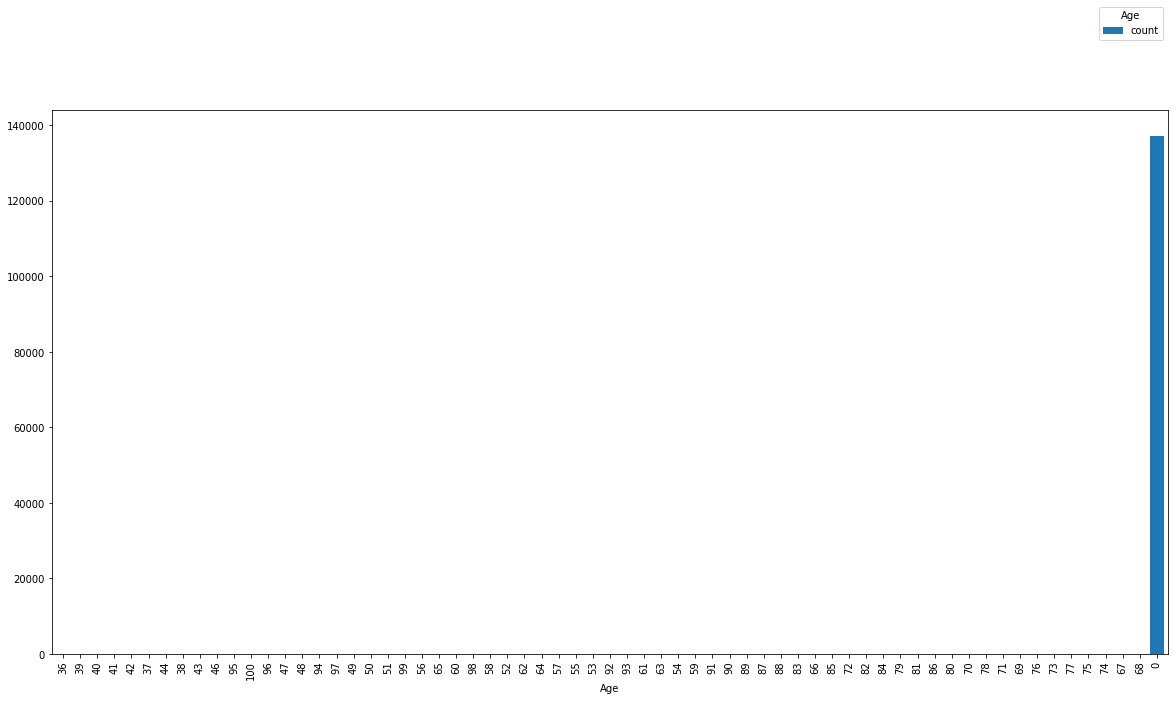

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_age.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Age', bbox_to_anchor=(1, 1.2), loc='upper right')

##### Gender

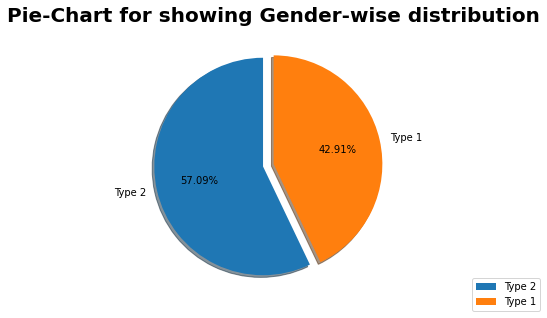

In [ ]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Gender-wise distribution', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_beneficiery['Gender'].value_counts()
explode = [0.1, 0]
plt.pie(y, labels= ['Type 2', 'Type 1'], explode = explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

###### Age vs. Gender

In [ ]:
# Previous Assignment: https://github.com/dataenthusiast092/Applied-AI-Assignments-Case-Studies/blob/master/Assignment-M2%20-%20Apply%20t%20SNE%20on%20Donors%20Choose%20dataset.ipynb
#stacked bar plots matplotlib: https://matplotlib.org/gallery/lines_bars_and_markers/bar_stacked.html
def stack_plot(data, xtick, col2='Gender', col3='total'):
  ind = np.arange(data.shape[0])
    
  plt.figure(figsize=(20,5))
  p1 = plt.bar(ind, data[col3].values)
  p2 = plt.bar(ind, data[col2].values)

  plt.ylabel('')
  plt.xlabel('Gender')
  plt.title('Male vs. Female')
  plt.xticks(ind, list(data[xtick].values))
  plt.legend((p1[0], p2[0]), ['Total', 'Average'])
  plt.show()

In [ ]:
def univariate_barplots(data, col1, col2='Gender', top=False):
    # Count number of zeros in dataframe python: https://stackoverflow.com/a/51540521/4084039
    temp = pd.DataFrame(data.groupby(col1)[col2].agg(lambda x: x.eq(1).sum())).reset_index()

    # Pandas dataframe grouby count: https://stackoverflow.com/a/19385591/4084039
    temp['total'] = pd.DataFrame(data.groupby(col1)[col2].agg(total='count')).reset_index()['total']
    temp['Avg'] = pd.DataFrame(data.groupby(col1)[col2].agg(Avg='mean')).reset_index()['Avg']
    
    temp.sort_values(by=['total'],inplace=True, ascending=False)
    
    if top:
      temp = temp[0:top]
    
    stack_plot(temp, xtick=col1, col2=col2, col3='total')
    print(temp.head(5))

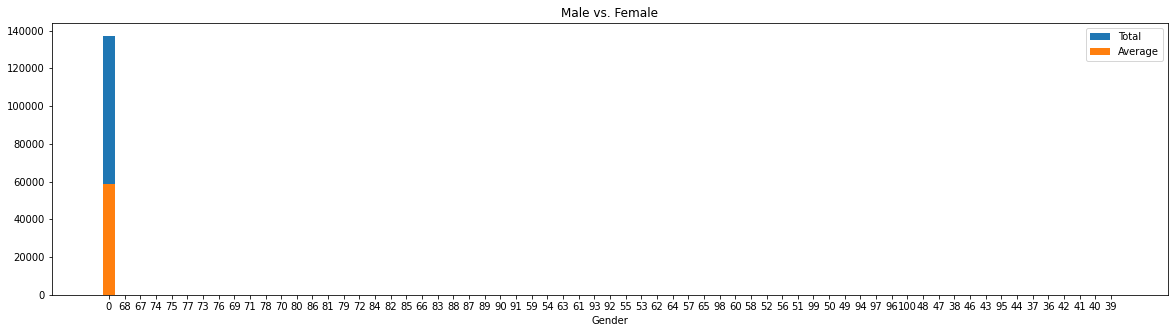

    Age  Gender   total       Avg
0     0   58851  137135  1.570854
32   68      44      79  1.443038
31   67      41      76  1.460526
38   74      28      67  1.582090
39   75      31      62  1.500000


In [ ]:
univariate_barplots(train_beneficiery, 'Age', 'Gender', False)

##### Race

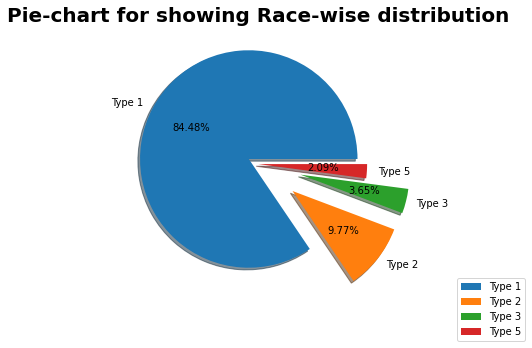

In [ ]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-chart for showing Race-wise distribution', fontdict= {'fontsize': 20,
                                                                     'fontweight': 'bold'})
y = train_beneficiery['Race'].value_counts()
explode = [0.1, 0.4, 0.4, 0]
plt.pie(y, labels= ['Type 1', 'Type 2', 'Type 3', 'Type 5'], explode = explode, autopct='%1.2f%%', shadow = True, startangle=0)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

##### State

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_state = pd.crosstab(index = train_beneficiery['State'], columns = 'count')
benef_state= benef_state.sort_values(by='count').head(30)

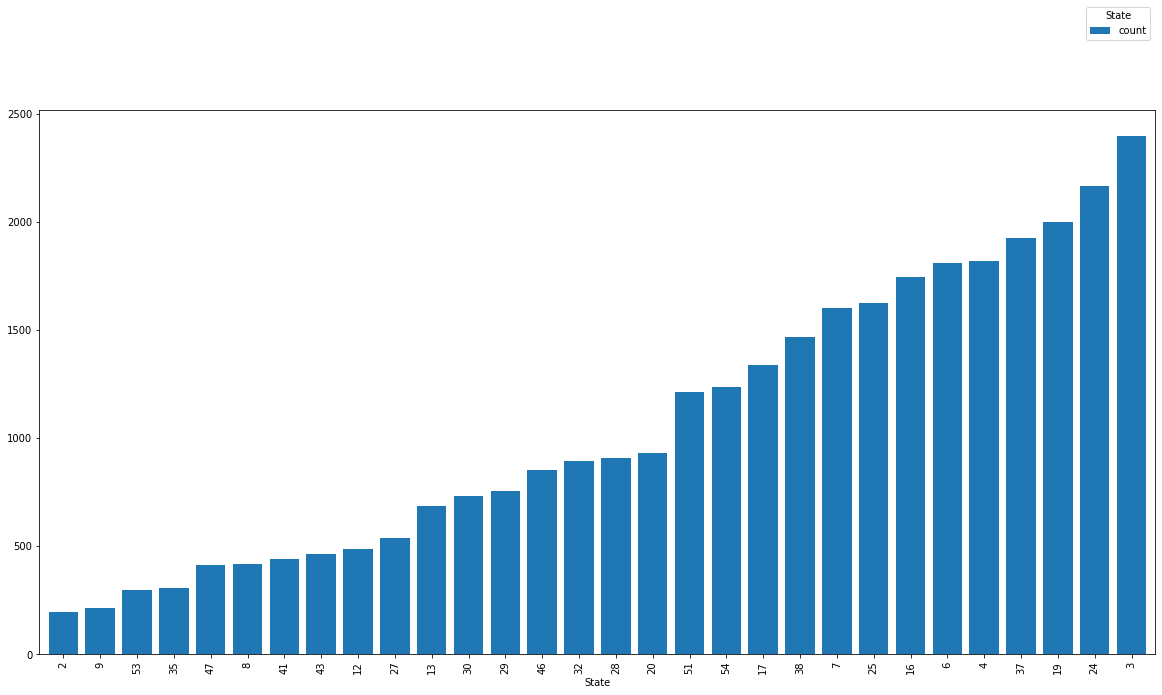

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_state.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'State', bbox_to_anchor=(1, 1.2), loc='upper right')


##### County

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_county = pd.crosstab(index = train_beneficiery['County'], columns = 'count')
benef_county = benef_county.sort_values(by = 'count').head(100)




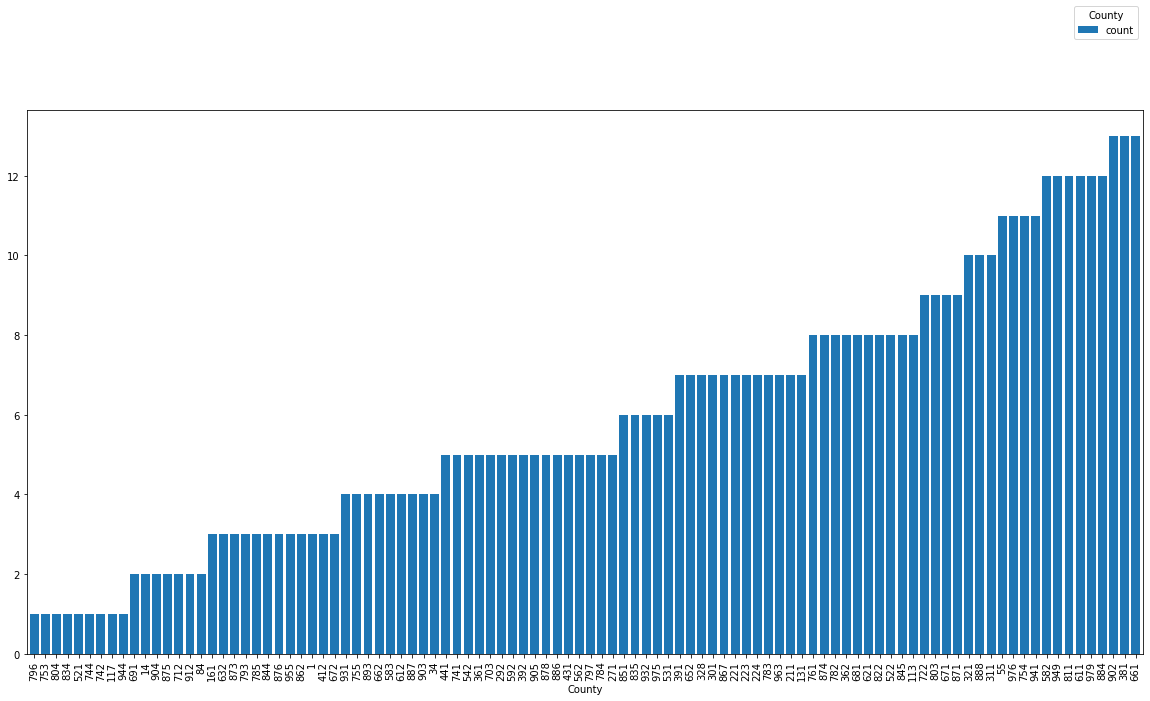

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_county.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'County', bbox_to_anchor=(1, 1.2), loc='upper right')

##### isDead

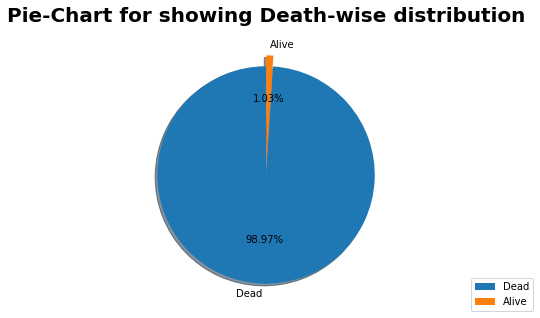

In [ ]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Death-wise distribution', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_beneficiery['isDead'].value_counts()
explode = [0.1, 0]
plt.pie(y, labels= ['Dead', 'Alive'], explode = explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

##### Risk Score

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_rs = pd.crosstab(index = train_beneficiery['Risk_Score'], columns = 'count')
benef_rs = benef_rs.sort_values(by = 'count').head(100)

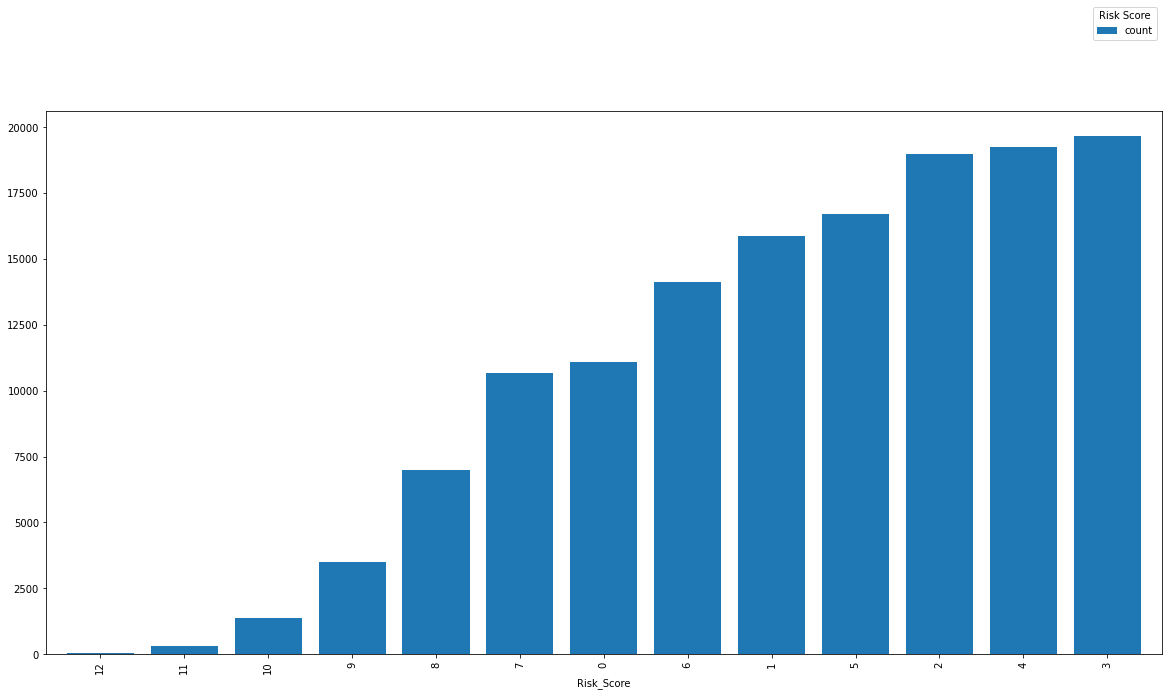

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_rs.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Risk Score', bbox_to_anchor=(1, 1.2), loc='upper right')


###### Risk Score vs. Gender

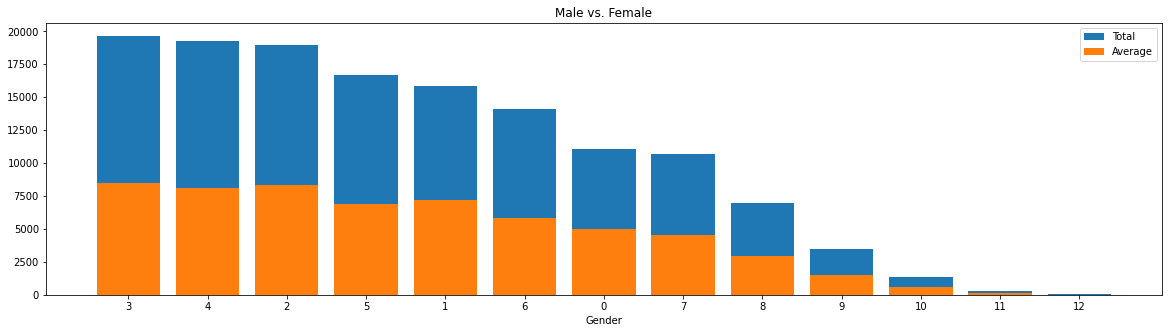

   Risk_Score  Gender  total       Avg
3           3    8465  19649  1.569189
4           4    8084  19257  1.580205
2           2    8345  18994  1.560651
5           5    6920  16716  1.586025
1           1    7179  15868  1.547580


In [ ]:
univariate_barplots(train_beneficiery, 'Risk_Score', 'Gender', False)

##### Number of Months Part A Coverage


**What is meant by Part A Coverage?**

Medicare Part A (Hospital Insurance) are available to the individuals: 
- Age 65 or older  
- Disabled
- End-Stage Renal Disease (ESRD)

Most people get Part A for free, but some have to pay a premium for this coverage.

To be eligible for premium-free Part A, an individual must be entitled to receive Medicare based on their own earnings or those of a spouse, parent, or child. To receive premium-free Part A, the worker must have a specified number of quarters of coverage (QCs) and file an application for Social Security or Railroad Retirement Board (RRB) benefits. The exact number of QCs required is dependent on whether the person is filing for Part A on the basis of age, disability, or End Stage Renal Disease (ESRD). QCs are earned through payment of payroll taxes under the Federal Insurance Contributions Act (FICA) during the person's working years. Most individuals pay the full FICA tax so the QCs they earn can be used to meet the requirements for both monthly Social Security benefits and premium-free Part A.


In [ ]:
# number of months part a coverage: https://www.cms.gov/Medicare/Eligibility-and-Enrollment/OrigMedicarePartABEligEnrol 
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_part_a_cov = pd.crosstab(index = train_beneficiery['NoOfMonths_PartACov'], columns = 'count')
benef_part_a_cov = benef_part_a_cov.sort_values(by = 'count')
benef_part_a_cov

col_0,count
NoOfMonths_PartACov,
1,3
2,5
3,5
9,7
5,8
4,13
7,16
10,18
8,26


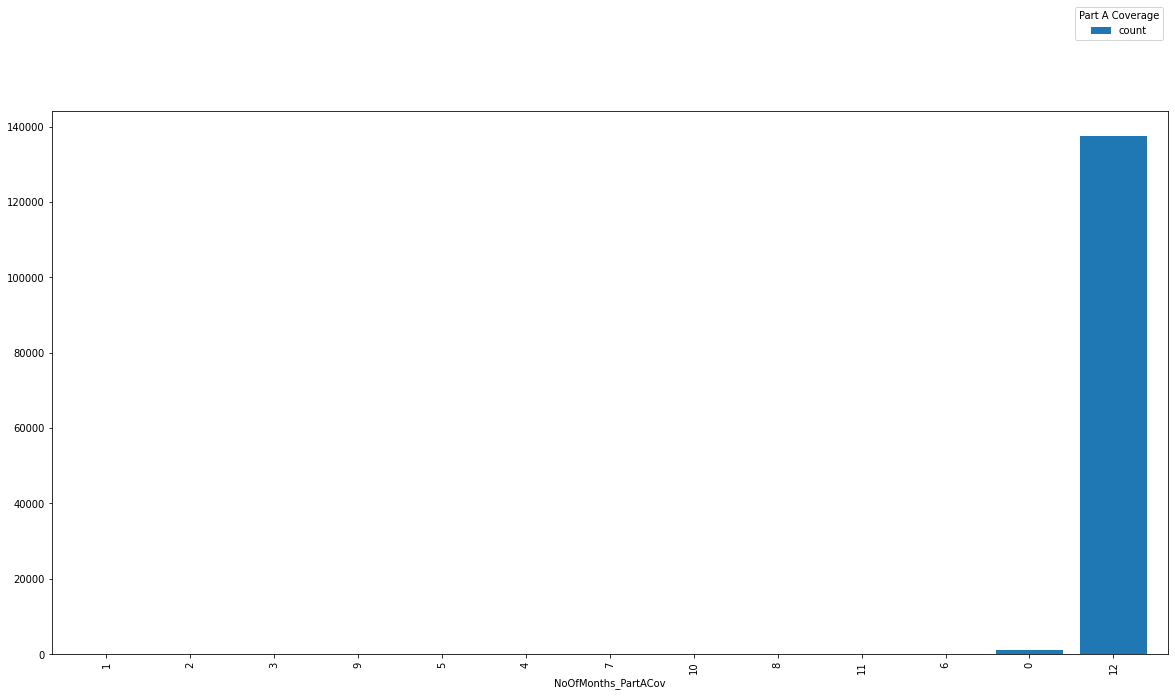

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_part_a_cov.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Part A Coverage', bbox_to_anchor=(1, 1.2), loc='upper right')

In [ ]:
print(round((train_beneficiery['NoOfMonths_PartACov'].value_counts()/train_beneficiery['NoOfMonths_PartACov'].shape[0])*100, 4), "%")

12    99.1577
0      0.7217
6      0.0274
11     0.0202
8      0.0188
10     0.0130
7      0.0115
4      0.0094
5      0.0058
9      0.0051
3      0.0036
2      0.0036
1      0.0022
Name: NoOfMonths_PartACov, dtype: float64 %


##### Number of Months Part B Coverage


**What is meant by Part B Coverage or Medicare(Medical Insurance)?**

The eligibility rules for Part B depend on whether a person is eligible for premium-free Part A or whether the individual has to pay a premium for Part A coverage.

Individuals who are eligible for premium-free Part A are also eligible for enroll in Part B once they are entitled to Part A.  Enrollment in Part B can only happen at certain times.

Individuals who must pay a premium for Part A must meet the following requirements to enroll in Part B:

- Be age 65 or older;
- Be a U.S. resident; AND
- Be either a U.S. citizen, OR
- Be an alien who has been lawfully admitted for permanent residence and has been residing in the United States for 5 continuous years prior to the month of filing an application for Medicare.



In [ ]:
# number of months part b coverage: https://www.cms.gov/Medicare/Eligibility-and-Enrollment/OrigMedicarePartABEligEnrol 
# number of months part a coverage: https://www.cms.gov/Medicare/Eligibility-and-Enrollment/OrigMedicarePartABEligEnrol 
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_part_b_cov = pd.crosstab(index = train_beneficiery['NoOfMonths_PartBCov'], columns = 'count')
benef_part_b_cov = benef_part_b_cov.sort_values(by = 'count')

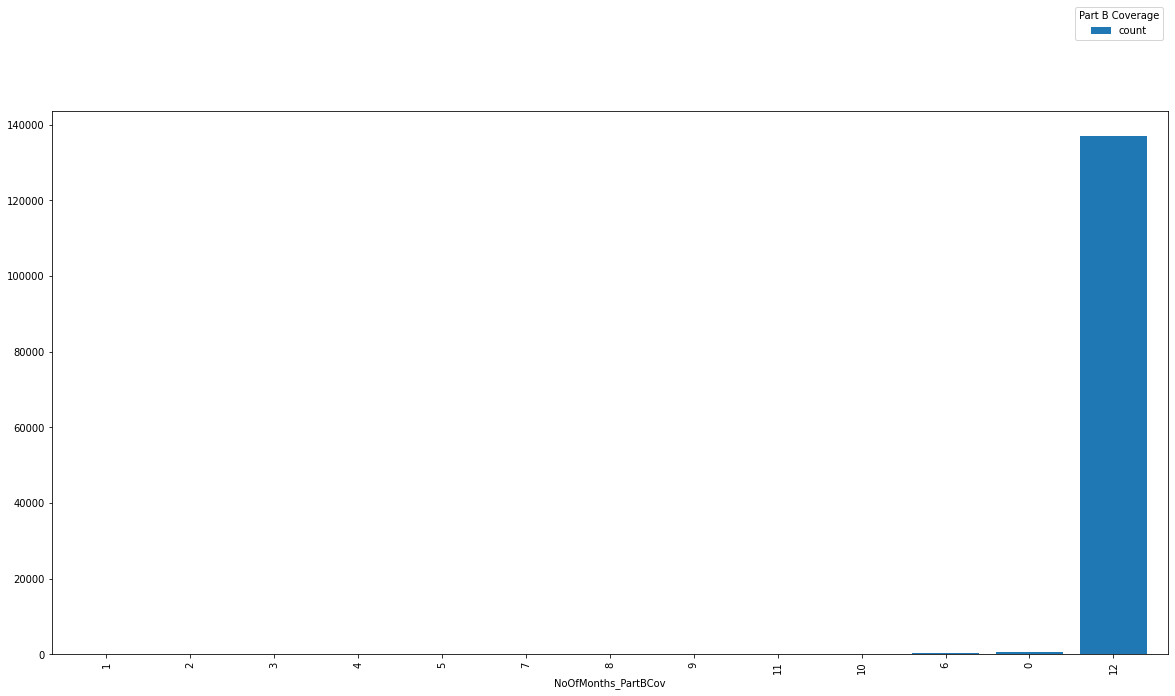

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_part_b_cov.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Part B Coverage', bbox_to_anchor=(1, 1.2), loc='upper right')

In [ ]:
print(round((train_beneficiery['NoOfMonths_PartBCov'].value_counts()/train_beneficiery['NoOfMonths_PartBCov'].shape[0])*100, 4), "%")

12    98.8063
0      0.4872
6      0.2035
10     0.1083
11     0.1032
9      0.0881
8      0.0512
7      0.0455
5      0.0361
4      0.0253
3      0.0195
2      0.0137
1      0.0123
Name: NoOfMonths_PartBCov, dtype: float64 %


##### Annual Deductible for Inpatient

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_deductible = pd.crosstab(index = train_beneficiery['IPAnnualDeductibleAmt'].value_counts(), columns = 'count')
benef_deductible = benef_deductible.sort_values(by = 'count').head(75)

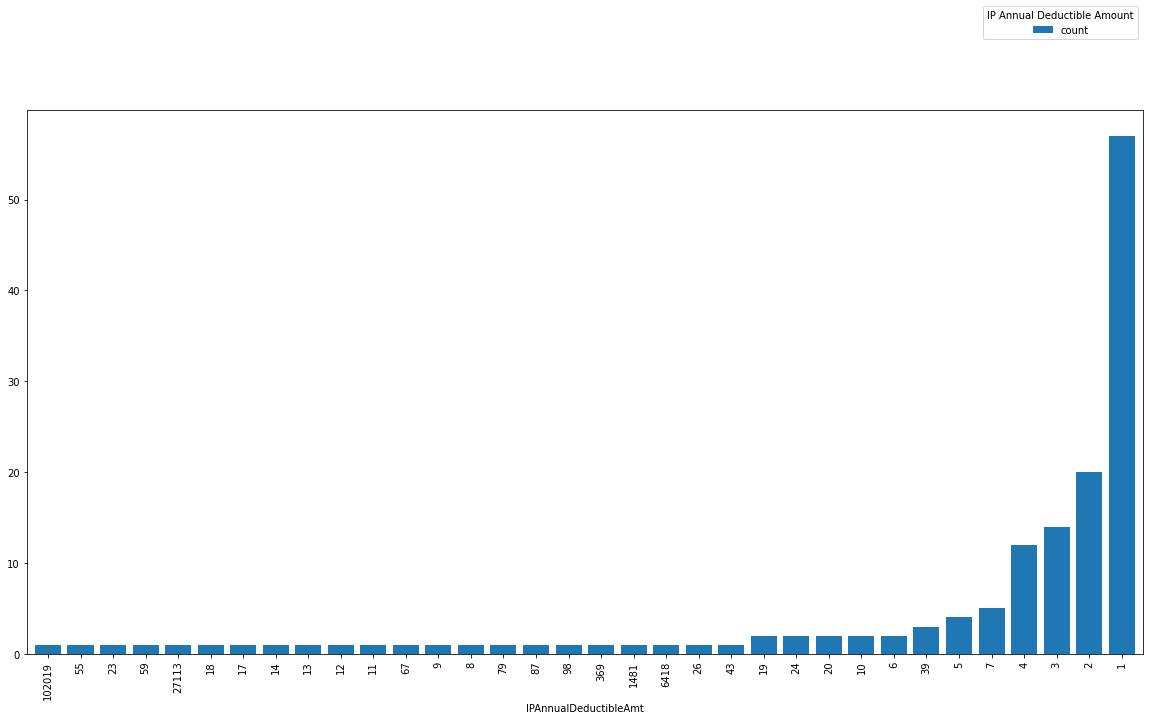

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_deductible.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'IP Annual Deductible Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


##### Annual Reimbursement for Inpatient

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_reimb = pd.crosstab(index = train_beneficiery['IPAnnualReimbursementAmt'].value_counts(), columns = 'count')
benef_reimb = benef_reimb.sort_values(by = 'count')

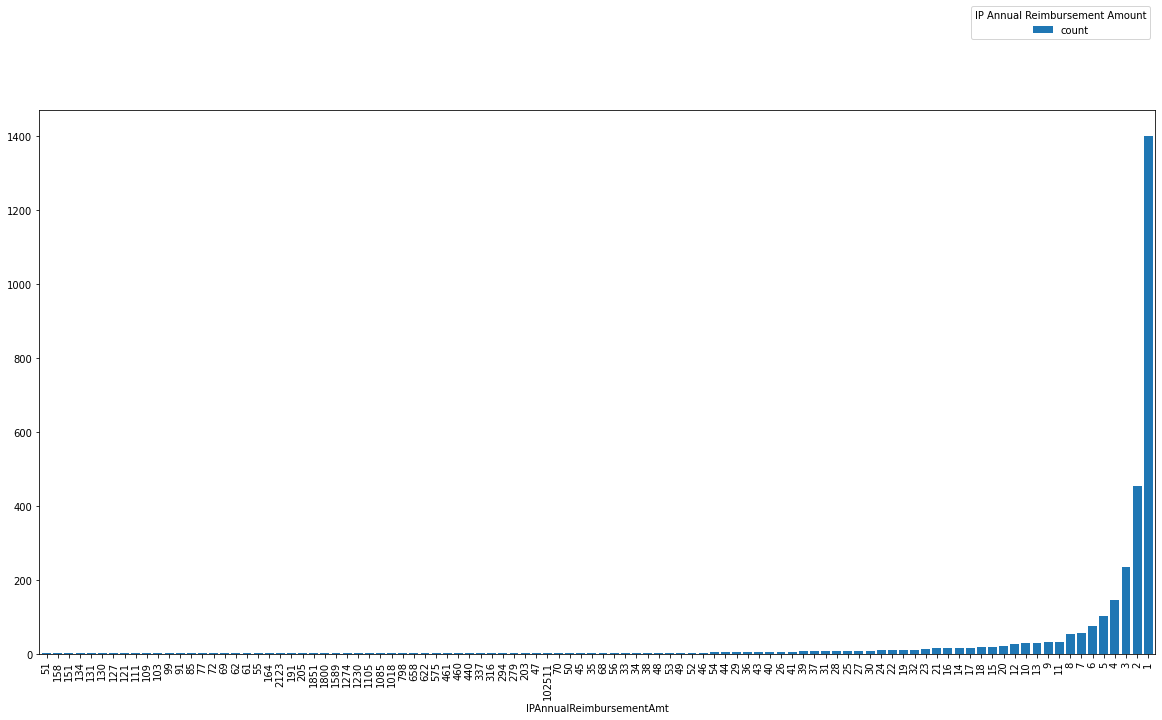

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_reimb.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'IP Annual Reimbursement Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


##### Annual Deductible for Outpatient

In [ ]:
train_beneficiery['OPAnnualReimbursementAmt'].value_counts()

0        4205
100      3916
200      3153
60       2694
300      2280
         ... 
12130       1
22470       1
16030       1
19390       1
38650       1
Name: OPAnnualReimbursementAmt, Length: 2078, dtype: int64

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_deductible2 = pd.crosstab(index = train_beneficiery['OPAnnualDeductibleAmt'].value_counts(), columns = 'count')
benef_deductible2 = benef_deductible2.sort_values(by = 'count')

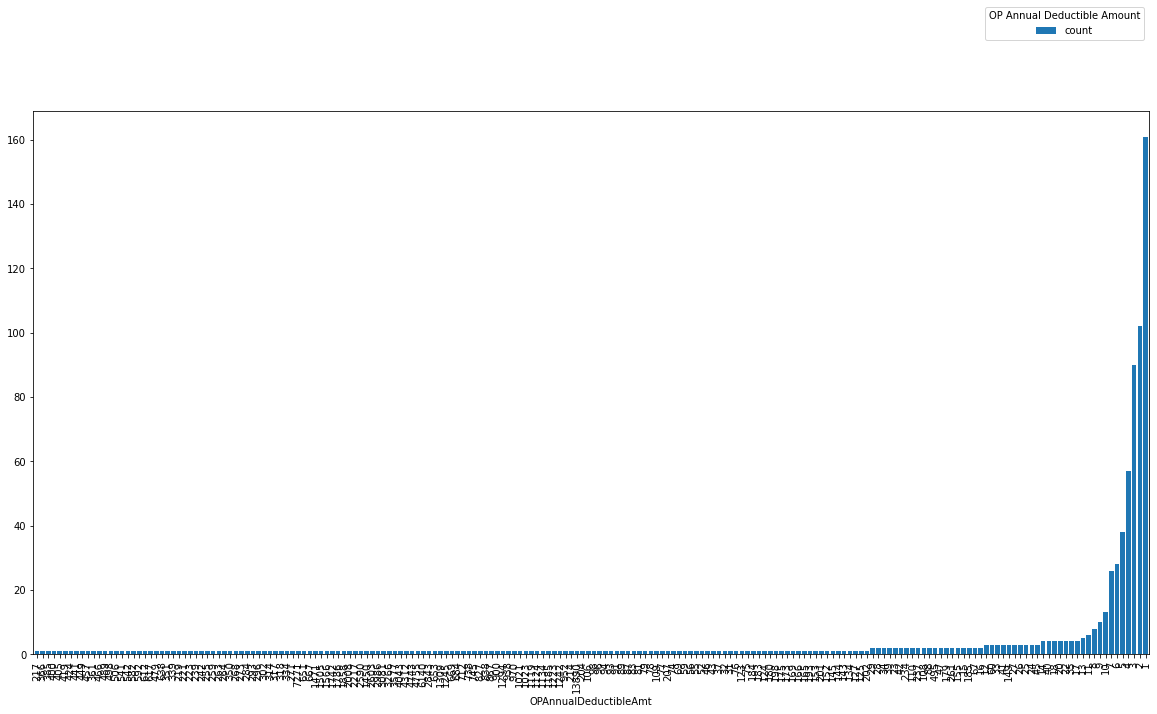

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_deductible2.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'OP Annual Deductible Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


##### Annual Reimbursement for Outpatient

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
benef_reimb2 = pd.crosstab(index = train_beneficiery['OPAnnualReimbursementAmt'].value_counts().head(200), columns = 'count')
benef_reimb2 = benef_reimb2.sort_values(by = 'count')

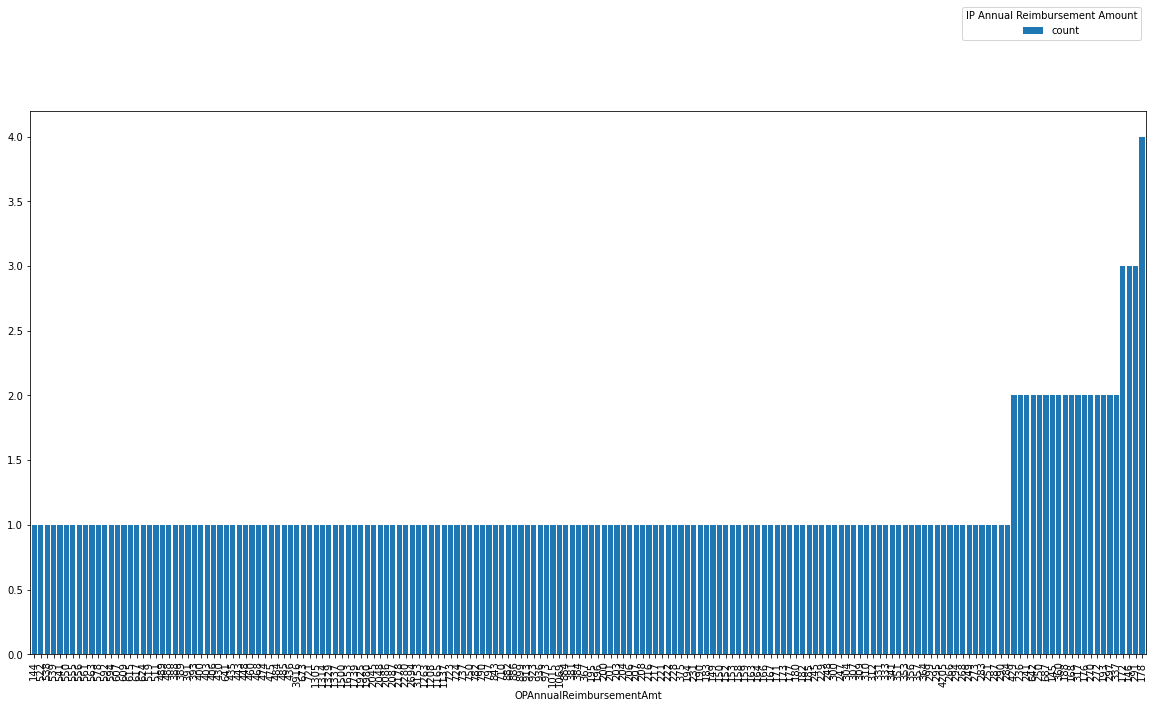

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = benef_reimb2.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'IP Annual Reimbursement Amount', bbox_to_anchor=(1, 1.2), loc='upper right')


#### Inpatient Data

##### Claim Duration

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
claim_duration_inpatient = pd.crosstab(index = train_inpatient['Claim_duration_inpatient'].value_counts(), columns = 'count')
claim_duration_inpatient = claim_duration_inpatient.sort_values(by = 'count')

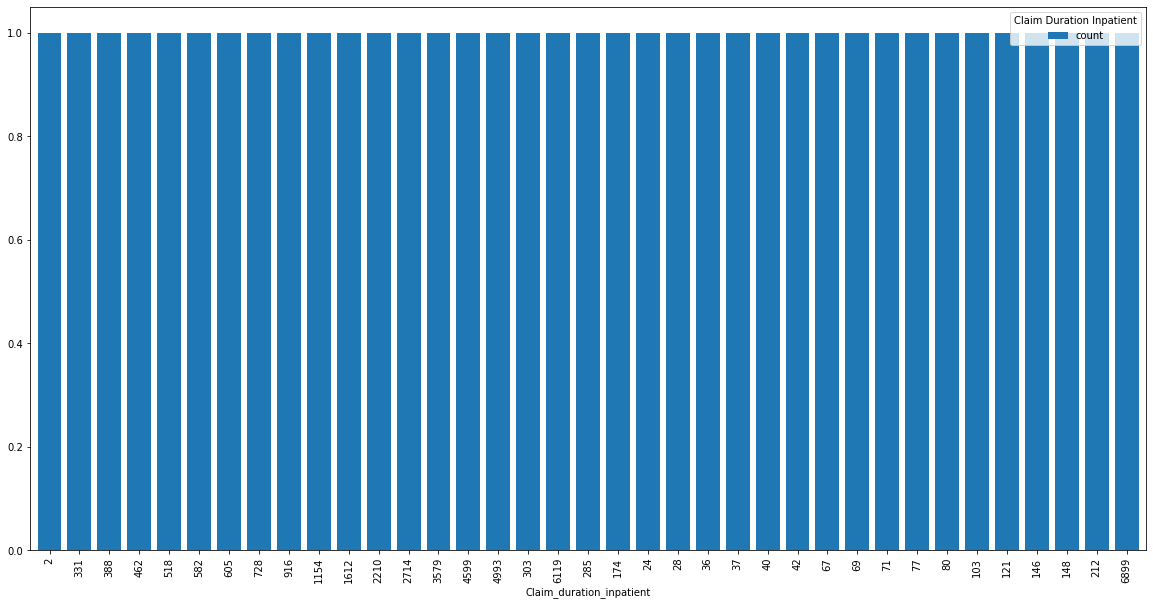

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = claim_duration_inpatient.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Claim Duration Inpatient', loc='upper right')


##### Physicians

In [ ]:
train_inpatient['Physicians_inpatient'].value_counts()

AP_OPP        20413
AP            15260
AP_OPP_OTP     3411
AP_OTP         1278
None            106
OPP               5
OPP_OTP           1
Name: Physicians_inpatient, dtype: int64

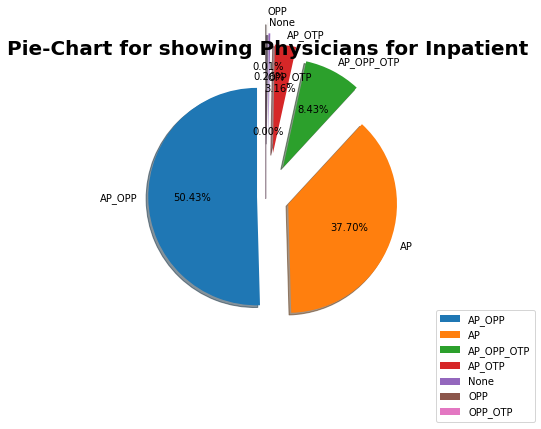

In [ ]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Physicians for Inpatient', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_inpatient['Physicians_inpatient'].value_counts()
explode = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0]
plt.pie(y,labels = ['AP_OPP', 'AP', 'AP_OPP_OTP', 'AP_OTP', 'None', 'OPP', 'OPP_OTP'],explode=explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

##### Hospital Stay Duration

In [ ]:
train_inpatient['Hospital_Stay_Duration'].value_counts()

3     6902
2     6117
4     4994
1     4591
5     3579
6     2719
7     2206
8     1613
9     1151
10     917
11     726
0      605
12     582
13     518
14     462
15     387
35     337
16     306
17     286
18     212
19     174
21     147
20     146
22     121
23     103
24      80
27      77
28      72
25      68
26      68
29      42
32      40
33      38
30      36
34      28
31      24
Name: Hospital_Stay_Duration, dtype: int64

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
hospital_stay_duration_inpatient = pd.crosstab(index = train_inpatient['Hospital_Stay_Duration'].value_counts(), columns = 'count')
hospital_stay_duration_inpatient = hospital_stay_duration_inpatient.sort_values(by = 'count')

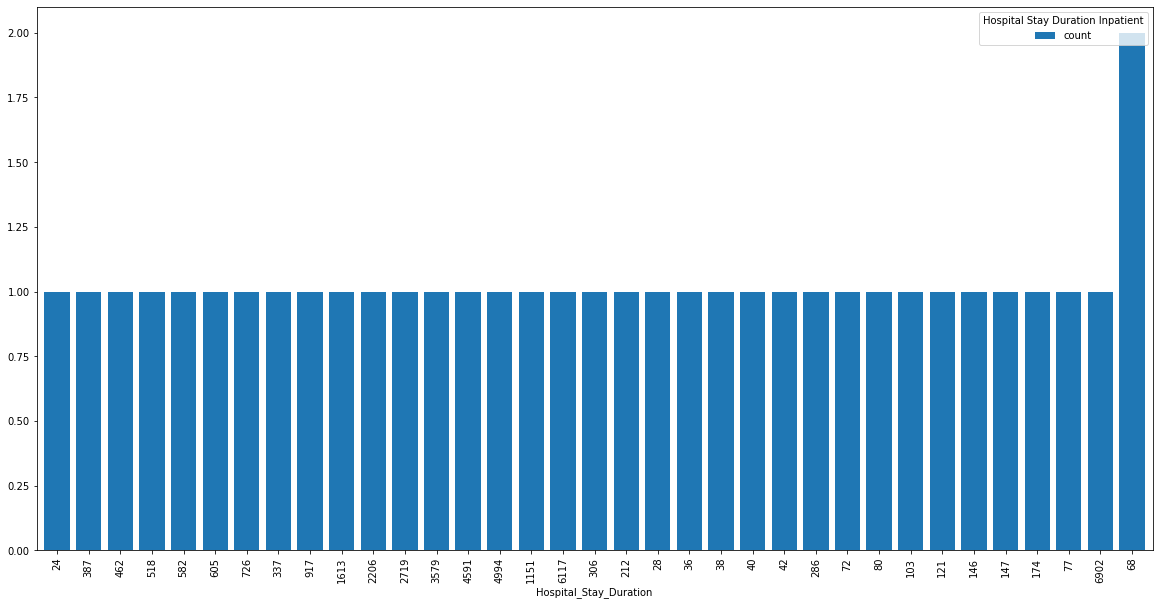

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = hospital_stay_duration_inpatient.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Hospital Stay Duration Inpatient', loc='upper right')


##### Diagnosis Group Codes

In [ ]:
train_inpatient['DiagnosisGroupCode'].value_counts()

Circulatory                9121
Respiratory                5658
Musculoskeletal            4800
Digestive                  4068
Nervous-System             3012
Nephrology                 2526
Pathology                  1715
Endocrine                  1454
Health_Logistics           1440
Psychology                 1410
Hepatobiliary              1088
Skin_Tissue                 964
Haematology                 539
Toxicology                  436
Gynaecology                 338
ENT                         301
Andrology                   274
Onco-Pathology              254
Psychological_Addiction     253
MDC                         244
Pre-MDC                     166
000                         134
OTH                         113
Trauma                       44
Obstetrics                   42
HIV-AIDS                     40
Eye                          27
Dermatology                  13
Name: DiagnosisGroupCode, dtype: int64

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
diagnosisgroupcodes = pd.crosstab(index = train_inpatient['DiagnosisGroupCode'].value_counts(), columns = 'count')
diagnosisgroupcodes = diagnosisgroupcodes.sort_values(by = 'count')

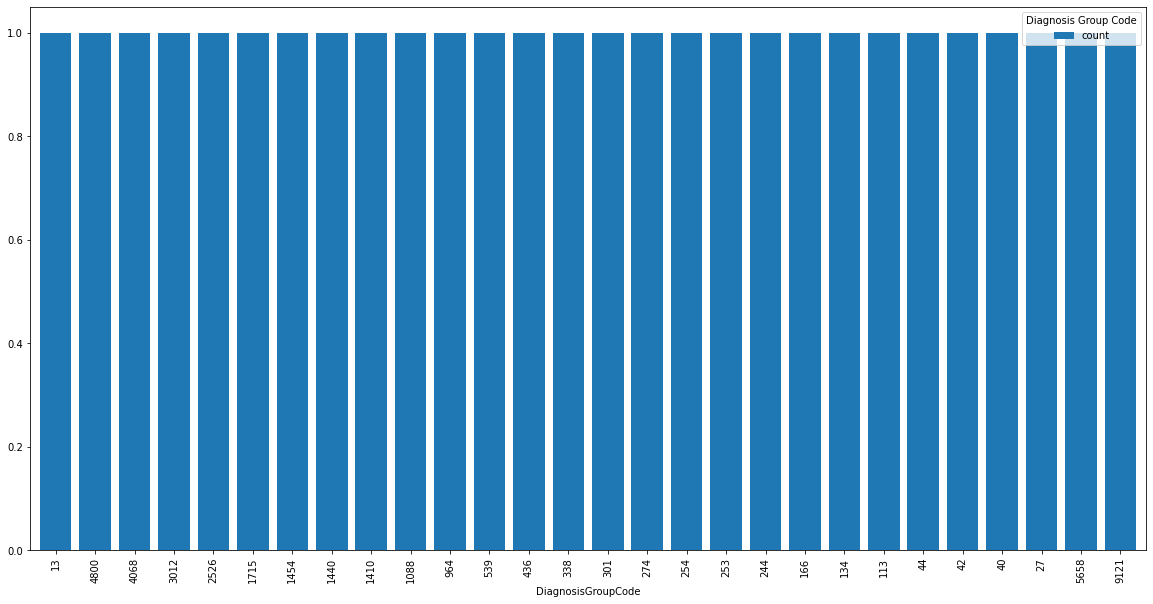

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = diagnosisgroupcodes.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Diagnosis Group Code', loc='upper right')


#### Outpatient Data

##### Claim Duration

In [ ]:
train_outpatient['Claim_duration_outpatient'].value_counts()

0     453348
20     24312
1      11960
2       4366
14      2735
3       2597
7       2564
4       2238
5       1511
9       1378
6       1306
8       1189
16      1136
10       982
15       975
11       953
13       947
12       903
17       808
18       800
19       727
23         1
21         1
Name: Claim_duration_outpatient, dtype: int64

In [ ]:
# univariate analysis for categorical variables in python: https://adataanalyst.com/data-analysis-resources/visualise-categorical-variables-in-python/ 
claim_duration_outpatient = pd.crosstab(index = train_outpatient['Claim_duration_outpatient'].value_counts(), columns = 'count')
claim_duration_outpatient = claim_duration_outpatient.sort_values(by = 'count')

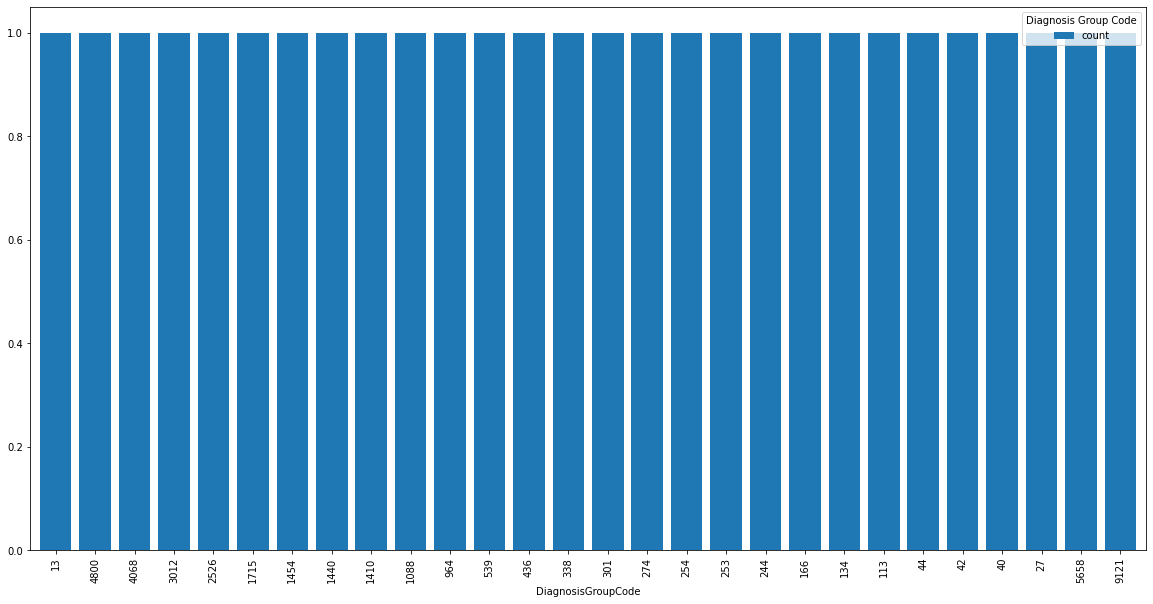

In [ ]:
# crosstab bar plot in pandas: https://stackoverflow.com/a/43553569
ax = diagnosisgroupcodes.plot(kind='bar', figsize= (20, 10), width = 0.8)
ax.legend(title = 'Diagnosis Group Code', loc='upper right')


##### Physicians

In [ ]:
train_outpatient['Physicians_outpatient'].value_counts()

AP            271342
AP_OTP        154390
AP_OPP         49965
AP_OPP_OTP     40644
None            1377
OTP               11
OPP                7
OPP_OTP            1
Name: Physicians_outpatient, dtype: int64

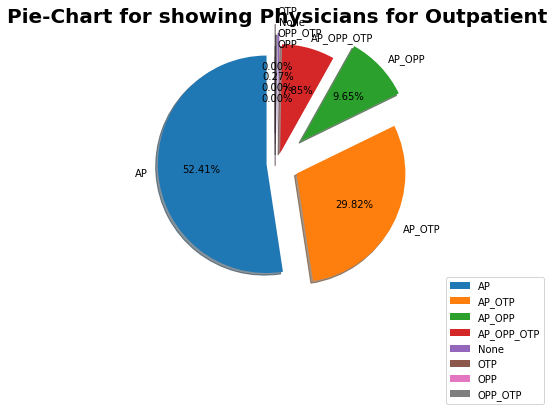

In [ ]:
# cite: https://www.w3schools.com/python/matplotlib_pie_charts.asp, https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html  
# matplotlib.title: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.title.html 
plt.figure(figsize=(10,5))
plt.title('Pie-Chart for showing Physicians for Outpatient', fontdict= {'fontsize': 20,
                                                                       'fontweight': 'bold'})
y = train_outpatient['Physicians_outpatient'].value_counts()
explode = [0.1, 0.2, 0.3, 0.1, 0.2, 0.3, 0, 0.1]
plt.pie(y,labels = ['AP', 'AP_OTP', 'AP_OPP', 'AP_OPP_OTP', 'None', 'OTP', 'OPP', 'OPP_OTP'],explode=explode, autopct='%1.2f%%', shadow = True, startangle=90)
plt.legend(loc = 'upper right', bbox_to_anchor=(1.5, 0.1))
plt.show()

## Final Stage after Pre-processing

In [ ]:
train_inpatient.rename({'Physicians_inpatient': 'Physicians'}, axis='columns', inplace=True)
test_inpatient.rename({'Physicians_inpatient': 'Physicians'}, axis='columns', inplace=True)

In [ ]:
train_inpatient.rename({'Claim_duration_inpatient': 'Claim_duration'}, axis='columns', inplace=True)
test_inpatient.rename({'Claim_duration_inpatient': 'Claim_duration'}, axis='columns', inplace=True)

In [ ]:
train_outpatient.rename({'Physicians_outpatient': 'Physicians'}, axis='columns', inplace=True)
test_outpatient.rename({'Physicians_outpatient': 'Physicians'}, axis='columns', inplace=True)

In [ ]:
train_outpatient.rename({'Claim_duration_outpatient': 'Claim_duration'}, axis='columns', inplace=True)
test_outpatient.rename({'Claim_duration_outpatient': 'Claim_duration'}, axis='columns', inplace=True)

### Precedence of Columns according to Row Count

#### Checking Row count of each column

In [ ]:
print(train_target.shape)
print(test_target.shape)

(5410, 2)
(1353, 1)


In [ ]:
print(train_inpatient.shape)
print(test_inpatient.shape)

(40474, 26)
(9551, 26)


In [ ]:
print(train_beneficiery.shape)
print(test_beneficiery.shape)

(138556, 14)
(63968, 14)


In [ ]:
print(train_outpatient.shape)
print(test_outpatient.shape)

(517737, 24)
(125841, 24)


So,

Left Merge will be first done on:

1. merge1 = target & inpatient
2. merge2 = merge1 & beneficiery
3. merge3 = merge2 & outpatient

Final Dataset = merge3

### Merging Datasets 

In [ ]:
print(train_target.shape)
print(test_target.shape)

(5410, 2)
(1353, 1)


In [ ]:
merge1_train = pd.merge(train_target, train_inpatient, on = 'Provider', how = 'left')
merge1_test = pd.merge(test_target, test_inpatient, on = 'Provider', how = 'left')

print(merge1_train.shape)
print(merge1_test.shape)
print('-'*50)
print(merge1_train.columns)
print('-'*50)
print(train_beneficiery.columns)

(43792, 27)
(10384, 26)
--------------------------------------------------
Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID',
       'InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Claim_duration',
       'Physicians', 'Hospital_Stay_Duration'],
      dtype='object')
--------------------------------------------------
Index(['BeneID', 'Gender', 'Race', 'State', 'County', 'NoOfMonths_PartACov',
       'NoOfMonths_PartBCov', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'Age'

In [ ]:
merge2_train = pd.merge(merge1_train, train_beneficiery, on = 'BeneID', how = 'left')
merge2_test = pd.merge(merge1_test, test_beneficiery, on = 'BeneID', how = 'left')

print(merge2_train.shape)
print(merge2_test.shape)
print('-'*50)
print(merge2_train.columns)
print('-'*50)
print(train_outpatient.columns)

(43792, 40)
(10384, 39)
--------------------------------------------------
Index(['Provider', 'PotentialFraud', 'BeneID', 'ClaimID',
       'InscClaimAmtReimbursed', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'Claim_duration',
       'Physicians', 'Hospital_Stay_Duration', 'Gender', 'Race', 'State',
       'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
       'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt', 'Age', 'isDead',
       'Risk_Score'],
      dtype='object')
-----------------------------------

In [ ]:
Final_merge3_train = pd.merge(merge2_train, train_outpatient, on = ['BeneID', 'ClaimID', 'Claim_duration', 'Provider', 'InscClaimAmtReimbursed', 'Physicians', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], how = 'left')
Final_merge3_test = pd.merge(merge2_test, test_outpatient, on = ['BeneID', 'ClaimID', 'Claim_duration', 'Provider', 'InscClaimAmtReimbursed', 'Physicians', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6'], how = 'left') 
                              

print(Final_merge3_train.shape)
print(Final_merge3_test.shape)

(43792, 40)
(10384, 39)


## Bivariate Analysis

### Total Claims categorized as Non/Frauds

In [ ]:
print(round((Final_merge3_train['PotentialFraud'].value_counts()/Final_merge3_train.shape[0])*100), '%')

Yes    54.0
No     46.0
Name: PotentialFraud, dtype: float64 %


**CONCLUSION**▶There are total 46% Non-Fraud and 54% Fraud cases. Certainly a balance dataset.

### Relation between Gender, Age, Race, State, County and Disease 

#### Category-wise percentage of Age-groups 

In [ ]:
temp1 = Final_merge3_train['Age'].fillna(0.0).astype(int)
temp1 = (temp1/10).round().astype(int)
print(((temp1.value_counts())/Final_merge3_train.shape[0]*100).round(2),'%')

0     99.27
8      0.27
7      0.26
9      0.10
6      0.04
5      0.03
10     0.01
4      0.01
Name: Age, dtype: float64 %


####**▶ Conclusion** 

Most of the patients are no more, which is approx. 99%.

#### Scatterplot of Age vs. State

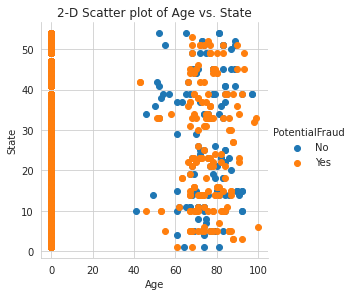

In [ ]:
sns.set_style('whitegrid')
sns.FacetGrid(Final_merge3_train, hue = 'PotentialFraud', size=4).map(plt.scatter, 'Age', 'State').add_legend()
plt.title('2-D Scatter plot of Age vs. State')
plt.xlabel('Age')
plt.ylabel('State')
plt.show()

####**▶ Conclusion** 

Maximum claims which are Frauds(orange) are of the patients whose age is not mentioned in their details.

Potential Fraud claims for the benenficieries are spread over all the states and so are the non fraud claims. Whereas, most claims are of the patients of age between 40-100. None of the frauds are for the age below 35.

#### PDF of Risk_Score

In [ ]:
Final_merge3_train['Risk_Score'].value_counts()

6.0     6409
7.0     6225
5.0     5661
8.0     5014
4.0     4763
3.0     3575
9.0     3177
2.0     2293
10.0    1482
1.0     1091
11.0     415
0.0      294
12.0      75
Name: Risk_Score, dtype: int64

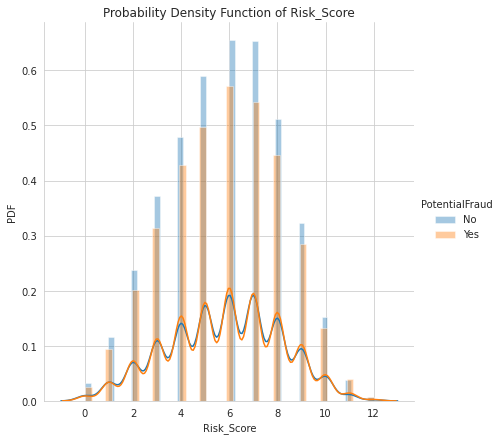

In [ ]:
sns.FacetGrid(Final_merge3_train, hue='PotentialFraud', size=6).map(sns.distplot, 'Risk_Score').add_legend()
plt.grid(True)
plt.title('Probability Density Function of Risk_Score')
plt.xlabel('Risk_Score')
plt.ylabel('PDF')
plt.show()

####**▶ Conclusion**

50-60% Beneficieries have their Risk Score between 3-6 and out of those 3 Risk Score has maximum Non-Frauds claims vs. 4,5,6 Risk Score have maximum Fraud Claims.

40-50% Beneficieries have their Risk Score as 2 & 7. 2 has maximum non-fraud claims whereas, 7 has maximum fraud claims.

30-40% Beneficieries have their Risk Score as 8 and their claims are mostly fraud.

20-30% Beneficieries have their Risk Score as 1 and are non frauds claims.

10-20% Beneficieries have their Risk Score as 0 & 9 and 0 Risk Score have non-fraud claims whereas 9 have fraud claims.

0-10% Beneficieries have their Risk Score as 10, 11 & 12 are Fraud claims.

With this we come to the conclusion that Beneficieries whose Risk Score is 4 or more have Fraud Claims.

#### Boxplot of Physicians

In [ ]:
Final_merge3_train['Physicians'].value_counts()

AP_OPP        20413
AP            15260
AP_OPP_OTP     3411
AP_OTP         1278
None            106
OPP               5
OPP_OTP           1
Name: Physicians, dtype: int64

Here,

1. AP = Attending Physician
2. OPP - Operating Physician
3. OTP = Other Physician
4. AP_OPP = Attendin & operating Physician both
5. OPP_OTP = Operating Physician both
6. AP_OTP = Attending & Other Physician
7. AP_OPP_OTP = Attending & Operating & Other Physician
8. None = None of the categories.



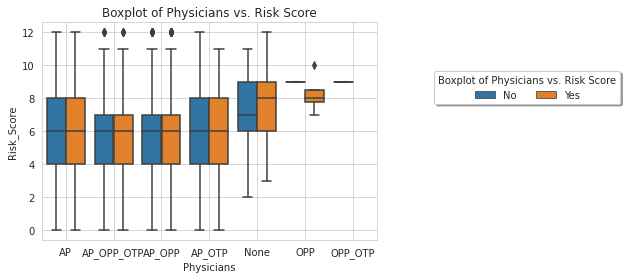

In [ ]:
sns.boxplot(x='Physicians', y='Risk_Score', data=Final_merge3_train, hue='PotentialFraud')
plt.title('Boxplot of Physicians vs. Risk Score')
plt.xlabel('Physicians')
plt.ylabel('Risk_Score')
plt.legend(title='Boxplot of Physicians vs. Risk Score', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

####**▶ Conclusion**

Outlier values are present for categories .. AP_OPP_OTP for both fraud & non-fraud claim cases, None category has outlier in non-fraud claims and OTP has outliers in both fraud & non-fraud claims.

AP & AP_OPP have almost similar Risk_Score for both Fraud & Non-Fraud claims which is 3-7.

AP_OTP have almost similar Risk_Score for both Fraud & Non-Fraud claims which is 2-6.

AP_OPP_OTP have almost similar Risk_Score for both Fraud & Non-Fraud claims which is 3-6.

None category of Physicians have Risk Score for Fraud claim cases. This no. is similar to Risk Score of AP_OPP & AP, which is 3-7. Also, None category has Risk Score for Non-Fraud claims cases as 4-7.

OTP & OPP_OTP have Risk_Score between 7-9 and are Non-Fraud claims.

OPP have Risk_Score between 5-7 and are Non-Fraud claims.

OTP & OPP have Risk-Score between 2-4 & 5-8, respectively. They are Fraud claims.




#### Boxplot of isDead vs. Risk_Score

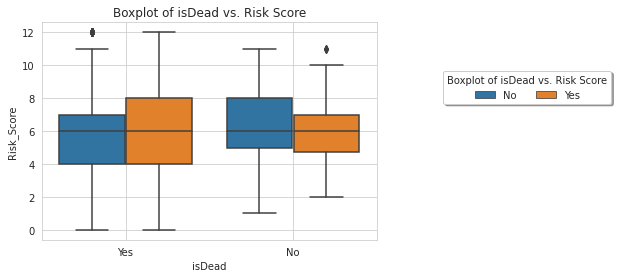

In [ ]:
sns.boxplot(x='isDead', y='Risk_Score', data=Final_merge3_train, hue='PotentialFraud')
plt.title('Boxplot of isDead vs. Risk Score')
plt.xlabel('isDead')
plt.ylabel('Risk_Score')
plt.legend(title='Boxplot of isDead vs. Risk Score', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

####**▶ Conclusion**

Beneficieries who have died have their Risk_Score between 3-7 have both their Claims as Frauds and Non-Frauds.

Whereas beneficieries who survive have their Risk_Score between 3-to-slighlty-above-6 & 3-7 have their claims as Non-Frauds & Frauds, respectively.

So, there is not much difference to understand Risk_Score who have died or survived with PotentialFraud

#### Provider vs. Claim_duration

No handles with labels found to put in legend.


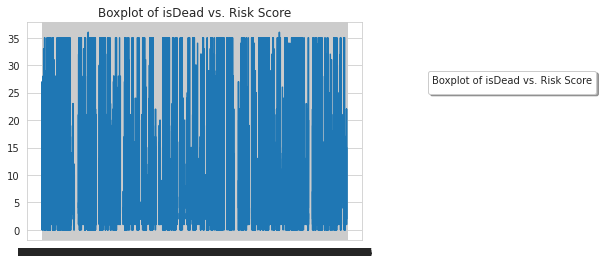

In [ ]:
plt.plot(Final_merge3_train['Provider'], Final_merge3_train['Claim_duration'])
plt.title('Boxplot of isDead vs. Risk Score')

plt.legend(title='Boxplot of isDead vs. Risk Score', loc='upper center', bbox_to_anchor=(1.45, 0.8),  shadow=True, ncol=2)
plt.grid(True)
plt.show()

####**▶ Conclusion**

This analysis gives a clumsy result, needs to be clarified with the mentor.

## Choosing the Best Metric

In [ ]:
print(round((Final_merge3_train['PotentialFraud'].value_counts()/Final_merge3_train.shape[0])*100), '%')

Yes    54.0
No     46.0
Name: PotentialFraud, dtype: float64 %


**CONCLUSION**▶There are total 46% Non-Fraud and 54% Fraud cases. Certainly a balance dataset.

**▶ Conclusion**

1. Accuracy
2. Precision, Recall & F1-Score
3. Confusion Matrix


**▶ Reason**

**Accuracy**=Since Dataset is almost balance, hence it can be one of the possible measures.

**Precision & Recall**= Since, we are looking for the Fraud Claims & providers who filed it. 

**Confusion Matrix**= Can help us figure out how many are correctly classified and how many are wrong classification. Because our ultimate aim is to not let any provider get the money, if the claims S/He filed which are inappropriate, we are mostly looking. 


**▶ Our aim would be**:

-- **to reduce False-Negatives**, as these are the ones who are **Non-Frauds(Negatives)** & 

--**to improve/increase False-Positives**, as these are the ones who are **Frauds(Positives)**.

**Business-Metric** could be **F1-Score**.


## Null Imputation

## Checking how many are Nulls

In [ ]:
round((Final_merge3_train.isnull().sum()/Final_merge3_train.shape[0])*100)

Provider                      0.0
PotentialFraud                0.0
BeneID                        8.0
ClaimID                       8.0
InscClaimAmtReimbursed        8.0
ClmAdmitDiagnosisCode         8.0
DeductibleAmtPaid            10.0
DiagnosisGroupCode            8.0
ClmDiagnosisCode_1            8.0
ClmDiagnosisCode_2            8.0
ClmDiagnosisCode_3            9.0
ClmDiagnosisCode_4           11.0
ClmDiagnosisCode_5           14.0
ClmDiagnosisCode_6           19.0
ClmDiagnosisCode_7           24.0
ClmDiagnosisCode_8           30.0
ClmDiagnosisCode_9           38.0
ClmDiagnosisCode_10          91.0
ClmProcedureCode_1           47.0
ClmProcedureCode_2           88.0
ClmProcedureCode_3           98.0
ClmProcedureCode_4          100.0
ClmProcedureCode_5          100.0
ClmProcedureCode_6          100.0
Claim_duration                8.0
Physicians                    8.0
Hospital_Stay_Duration        8.0
Gender                        8.0
Race                          8.0
State         

In [ ]:
Final_merge3_train.dtypes

Provider                     object
PotentialFraud               object
BeneID                       object
ClaimID                      object
InscClaimAmtReimbursed      float64
ClmAdmitDiagnosisCode        object
DeductibleAmtPaid           float64
DiagnosisGroupCode           object
ClmDiagnosisCode_1           object
ClmDiagnosisCode_2           object
ClmDiagnosisCode_3           object
ClmDiagnosisCode_4           object
ClmDiagnosisCode_5           object
ClmDiagnosisCode_6           object
ClmDiagnosisCode_7           object
ClmDiagnosisCode_8           object
ClmDiagnosisCode_9           object
ClmDiagnosisCode_10          object
ClmProcedureCode_1          float64
ClmProcedureCode_2          float64
ClmProcedureCode_3          float64
ClmProcedureCode_4          float64
ClmProcedureCode_5          float64
ClmProcedureCode_6          float64
Claim_duration              float64
Physicians                   object
Hospital_Stay_Duration      float64
Gender                      

## Checking Type of Distribution

### Numerical Features

#### InscClaimAmtReimbursed

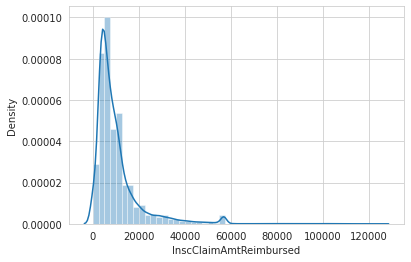

In [ ]:
# How to decide which imputation techniques to use:https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

sns.distplot(Final_merge3_train['InscClaimAmtReimbursed'])

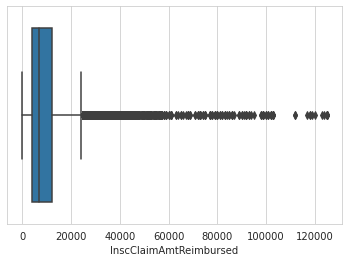

In [ ]:
sns.boxplot(Final_merge3_train['InscClaimAmtReimbursed'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### DeductibleAmtPaid

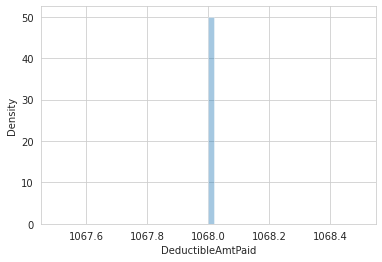

In [ ]:
# How to decide which imputation techniques to use:https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/

sns.distplot(Final_merge3_train['DeductibleAmtPaid'])

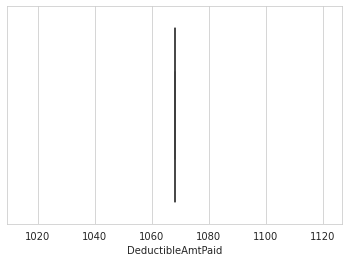

In [ ]:
sns.boxplot(Final_merge3_train['DeductibleAmtPaid'])

####**▶ Conclusion** 
The data is completely centered. Needs Replacement by Mean.

#### Claim_duration

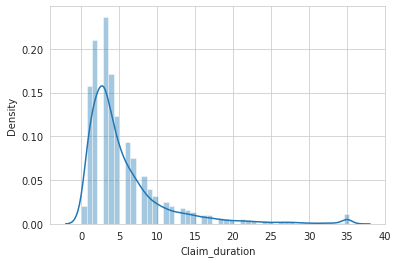

In [ ]:
sns.distplot(Final_merge3_train['Claim_duration'])

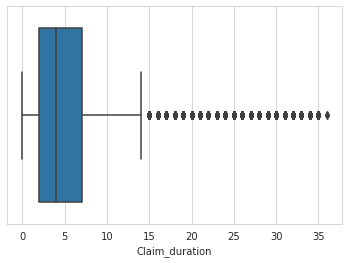

In [ ]:
sns.boxplot(Final_merge3_train['Claim_duration'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### Hospital Stay Duration

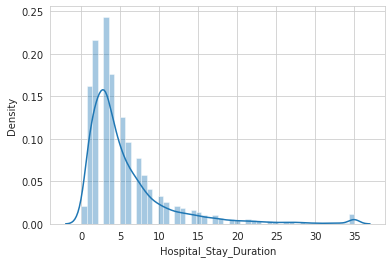

In [ ]:
sns.distplot(Final_merge3_train['Hospital_Stay_Duration'])

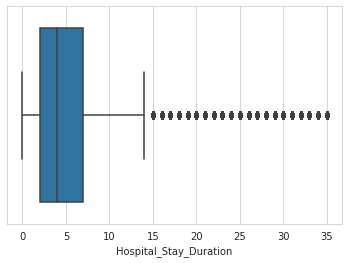

In [ ]:
sns.boxplot(Final_merge3_train['Hospital_Stay_Duration'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### No. of Months of Part A Coverage

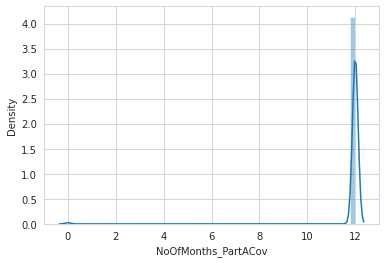

In [ ]:
sns.distplot(Final_merge3_train['NoOfMonths_PartACov'])

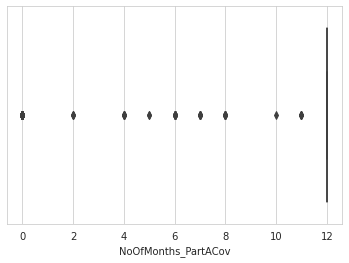

In [ ]:
sns.boxplot(Final_merge3_train['NoOfMonths_PartACov'])

####**▶ Conclusion** 
The data has a lot of outliers & is left skewed. Needs Replacement by Median.

#### No. of Months of Part B Coverage

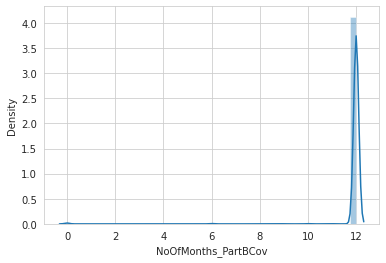

In [ ]:
sns.distplot(Final_merge3_train['NoOfMonths_PartBCov'])

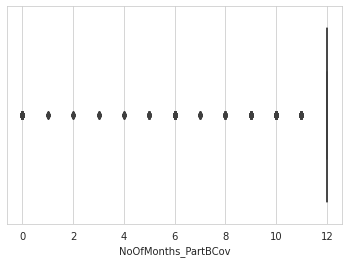

In [ ]:
sns.boxplot(Final_merge3_train['NoOfMonths_PartBCov'])

####**▶ Conclusion** 
The data has a lot of outliers & is left skewed. Needs Replacement by Median.

#### IP Annual Reimbursement Amt

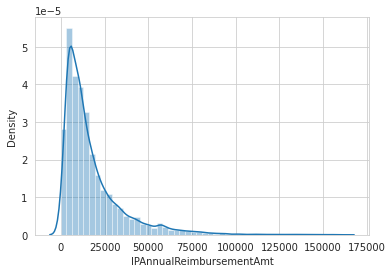

In [ ]:
sns.distplot(Final_merge3_train['IPAnnualReimbursementAmt'])

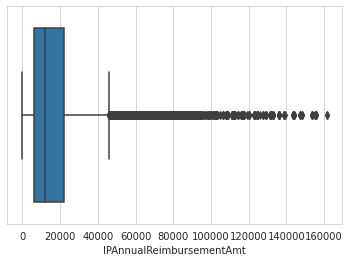

In [ ]:
sns.boxplot(Final_merge3_train['IPAnnualReimbursementAmt'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### IP Annual Deductible Amt

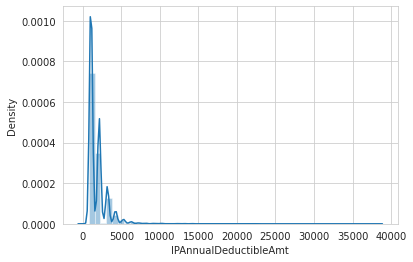

In [ ]:
sns.distplot(Final_merge3_train['IPAnnualDeductibleAmt'])

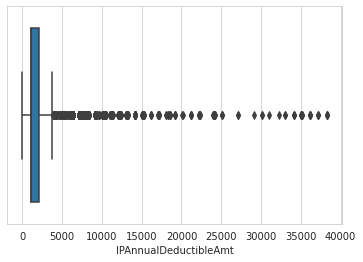

In [ ]:
sns.boxplot(Final_merge3_train['IPAnnualDeductibleAmt'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### Age

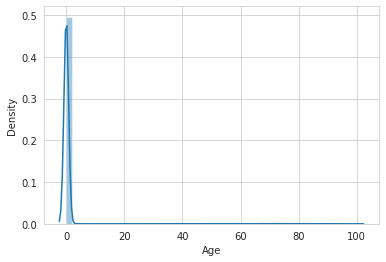

In [ ]:
sns.distplot(Final_merge3_train['Age'])

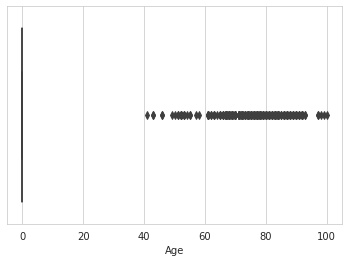

In [ ]:
sns.boxplot(Final_merge3_train['Age'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### OP Annual Reimbursement Amt

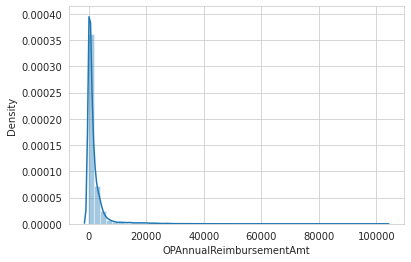

In [ ]:
sns.distplot(Final_merge3_train['OPAnnualReimbursementAmt'])

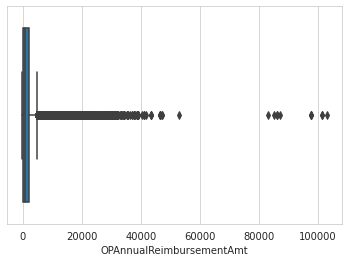

In [ ]:
sns.boxplot(Final_merge3_train['OPAnnualReimbursementAmt'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### OP Annual Deductible Amt

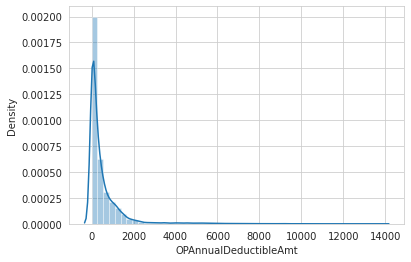

In [ ]:
sns.distplot(Final_merge3_train['OPAnnualDeductibleAmt'])

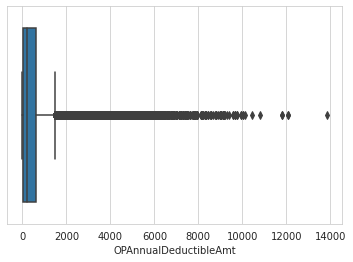

In [ ]:
sns.boxplot(Final_merge3_train['OPAnnualDeductibleAmt'])

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

## Data Cleaning

### Categorical Features

#### Claim Admit Diagnosis Code

In [ ]:
# Train
Final_merge3_train['ClmAdmitDiagnosisCode'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmAdmitDiagnosisCode'] = Final_merge3_train['ClmAdmitDiagnosisCode'].fillna('Zero')
Final_merge3_train['ClmAdmitDiagnosisCode'] = Final_merge3_train['ClmAdmitDiagnosisCode'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmAdmitDiagnosisCode'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmAdmitDiagnosisCode'] = Final_merge3_test['ClmAdmitDiagnosisCode'].fillna('Zero')
Final_merge3_test['ClmAdmitDiagnosisCode'] = Final_merge3_test['ClmAdmitDiagnosisCode'].astype('category')

#### Diagnosis Group Code

In [ ]:
# Train
Final_merge3_train['DiagnosisGroupCode'].replace("\\'", "", inplace = True)
Final_merge3_train['DiagnosisGroupCode'] = Final_merge3_train['DiagnosisGroupCode'].fillna('Zero')
Final_merge3_train['DiagnosisGroupCode'] = Final_merge3_train['DiagnosisGroupCode'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['DiagnosisGroupCode'].replace("\\'", "", inplace = True)
Final_merge3_test['DiagnosisGroupCode'] = Final_merge3_test['DiagnosisGroupCode'].fillna('Zero')
Final_merge3_test['DiagnosisGroupCode'] = Final_merge3_test['DiagnosisGroupCode'].astype('category')

#### Claim Diagnosis Code 1

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_1'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_1'] = Final_merge3_train['ClmDiagnosisCode_1'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_1'] = Final_merge3_train['ClmDiagnosisCode_1'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_1'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_1'] = Final_merge3_test['ClmDiagnosisCode_1'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_1'] = Final_merge3_test['ClmDiagnosisCode_1'].astype('category')

#### Claim Diagnosis Code 2

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_2'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_2'] = Final_merge3_train['ClmDiagnosisCode_2'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_2'] = Final_merge3_train['ClmDiagnosisCode_2'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_2'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_2'] = Final_merge3_test['ClmDiagnosisCode_2'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_2'] = Final_merge3_test['ClmDiagnosisCode_2'].astype('category')

#### Claim Diagnosis Code 3

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_3'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_3'] = Final_merge3_train['ClmDiagnosisCode_3'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_3'] = Final_merge3_train['ClmDiagnosisCode_3'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_3'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_3'] = Final_merge3_test['ClmDiagnosisCode_3'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_3'] = Final_merge3_test['ClmDiagnosisCode_3'].astype('category')


#### Claim Diagnosis Code 4

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_4'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_4'] = Final_merge3_train['ClmDiagnosisCode_4'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_4'] = Final_merge3_train['ClmDiagnosisCode_4'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_4'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_4'] = Final_merge3_test['ClmDiagnosisCode_4'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_4'] = Final_merge3_test['ClmDiagnosisCode_4'].astype('category')


#### Claim Diagnosis Code 5

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_5'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_5'] = Final_merge3_train['ClmDiagnosisCode_5'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_5'] = Final_merge3_train['ClmDiagnosisCode_5'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_5'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_5'] = Final_merge3_test['ClmDiagnosisCode_5'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_5'] = Final_merge3_test['ClmDiagnosisCode_5'].astype('category')


#### Claim Diagnosis Code 6

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_6'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_6'] = Final_merge3_train['ClmDiagnosisCode_6'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_6'] = Final_merge3_train['ClmDiagnosisCode_6'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_6'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_6'] = Final_merge3_test['ClmDiagnosisCode_6'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_6'] = Final_merge3_test['ClmDiagnosisCode_6'].astype('category')


#### Claim Diagnosis Code 7

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_7'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_7'] = Final_merge3_train['ClmDiagnosisCode_7'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_7'] = Final_merge3_train['ClmDiagnosisCode_7'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_7'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_7'] = Final_merge3_test['ClmDiagnosisCode_7'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_7'] = Final_merge3_test['ClmDiagnosisCode_7'].astype('category')


#### Claim Diagnosis Code 8

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_8'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_8'] = Final_merge3_train['ClmDiagnosisCode_8'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_8'] = Final_merge3_train['ClmDiagnosisCode_8'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_8'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_8'] = Final_merge3_test['ClmDiagnosisCode_8'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_8'] = Final_merge3_test['ClmDiagnosisCode_8'].astype('category')


#### Claim Diagnosis Code 9

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_9'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_9'] = Final_merge3_train['ClmDiagnosisCode_9'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_9'] = Final_merge3_train['ClmDiagnosisCode_9'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_9'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_9'] = Final_merge3_test['ClmDiagnosisCode_9'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_9'] = Final_merge3_test['ClmDiagnosisCode_9'].astype('category')


#### Claim Diagnosis Code 10

In [ ]:
# Train
Final_merge3_train['ClmDiagnosisCode_10'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmDiagnosisCode_10'] = Final_merge3_train['ClmDiagnosisCode_10'].fillna('Zero')
Final_merge3_train['ClmDiagnosisCode_10'] = Final_merge3_train['ClmDiagnosisCode_10'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmDiagnosisCode_10'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmDiagnosisCode_10'] = Final_merge3_test['ClmDiagnosisCode_10'].fillna('Zero')
Final_merge3_test['ClmDiagnosisCode_10'] = Final_merge3_test['ClmDiagnosisCode_10'].astype('category')


#### Claim Procedure Code 1

In [ ]:
# Train
Final_merge3_train['ClmProcedureCode_1'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmProcedureCode_1'].replace(".", "-", inplace = True)
Final_merge3_train['ClmProcedureCode_1'] = Final_merge3_train['ClmProcedureCode_1'].fillna('Zero')
Final_merge3_train['ClmProcedureCode_1'] = Final_merge3_train['ClmProcedureCode_1'].astype('str')
Final_merge3_train['ClmProcedureCode_1'] = Final_merge3_train['ClmProcedureCode_1'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmProcedureCode_1'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmProcedureCode_1'].replace(".", "-", inplace = True)
Final_merge3_test['ClmProcedureCode_1'] = Final_merge3_test['ClmProcedureCode_1'].fillna('Zero')
Final_merge3_test['ClmProcedureCode_1'] = Final_merge3_test['ClmProcedureCode_1'].astype('str')
Final_merge3_test['ClmProcedureCode_1'] = Final_merge3_test['ClmProcedureCode_1'].astype('category')


#### Claim Procedure Code 2

In [ ]:
# Train
Final_merge3_train['ClmProcedureCode_2'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmProcedureCode_2'].replace(".", "-", inplace = True)
Final_merge3_train['ClmProcedureCode_2'] = Final_merge3_train['ClmProcedureCode_2'].fillna('Zero')
Final_merge3_train['ClmProcedureCode_2'] = Final_merge3_train['ClmProcedureCode_2'].astype('str')
Final_merge3_train['ClmProcedureCode_2'] = Final_merge3_train['ClmProcedureCode_2'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmProcedureCode_2'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmProcedureCode_2'].replace(".", "-", inplace = True)
Final_merge3_test['ClmProcedureCode_2'] = Final_merge3_test['ClmProcedureCode_2'].fillna('Zero')
Final_merge3_test['ClmProcedureCode_2'] = Final_merge3_test['ClmProcedureCode_2'].astype('str')
Final_merge3_test['ClmProcedureCode_2'] = Final_merge3_test['ClmProcedureCode_2'].astype('category')


#### Claim Procedure Code 3

In [ ]:
# Train
Final_merge3_train['ClmProcedureCode_3'].replace("\\'", "", inplace = True)
Final_merge3_train['ClmProcedureCode_3'].replace(".", "-", inplace = True)
Final_merge3_train['ClmProcedureCode_3'] = Final_merge3_train['ClmProcedureCode_3'].fillna('Zero')
Final_merge3_train['ClmProcedureCode_3'] = Final_merge3_train['ClmProcedureCode_3'].astype('str')
Final_merge3_train['ClmProcedureCode_3'] = Final_merge3_train['ClmProcedureCode_3'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['ClmProcedureCode_3'].replace("\\'", "", inplace = True)
Final_merge3_test['ClmProcedureCode_3'].replace(".", "-", inplace = True)
Final_merge3_test['ClmProcedureCode_3'] = Final_merge3_test['ClmProcedureCode_3'].fillna('Zero')
Final_merge3_test['ClmProcedureCode_3'] = Final_merge3_test['ClmProcedureCode_3'].astype('str')
Final_merge3_test['ClmProcedureCode_3'] = Final_merge3_test['ClmProcedureCode_3'].astype('category')


#### Dropping useless columns with all Nulls

In [ ]:
Final_merge3_train.drop(['ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'BeneID', 'ClaimID'], axis = 1, inplace = True) 
Final_merge3_test.drop(['ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6', 'BeneID', 'ClaimID'], axis = 1, inplace = True) 


#### Physicians

In [ ]:
# Train
Final_merge3_train['Physicians'].replace("\\'", "", inplace = True)
Final_merge3_train['Physicians'] = Final_merge3_train['Physicians'].fillna('Zero')
Final_merge3_train['Physicians'] = Final_merge3_train['Physicians'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['Physicians'].replace("\\'", "", inplace = True)
Final_merge3_test['Physicians'] = Final_merge3_test['Physicians'].fillna('Zero')
Final_merge3_test['Physicians'] = Final_merge3_test['Physicians'].astype('category')


#### Gender

In [ ]:
# Train
Final_merge3_train['Gender'] = Final_merge3_train['Gender'].fillna('zero')
Final_merge3_train['Gender'] = Final_merge3_train['Gender'].replace(2.0, 'two')
Final_merge3_train['Gender'] = Final_merge3_train['Gender'].replace(1.0, 'one')
Final_merge3_train['Gender'] = Final_merge3_train['Gender'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['Gender'] = Final_merge3_test['Gender'].fillna('zero')
Final_merge3_test['Gender'] = Final_merge3_test['Gender'].replace(2.0, 'two')
Final_merge3_test['Gender'] = Final_merge3_test['Gender'].replace(1.0, 'one')
Final_merge3_test['Gender'] = Final_merge3_test['Gender'].astype('category')


#### Race

In [ ]:
# Train
Final_merge3_train['Race'] = Final_merge3_train['Race'].fillna('zero')
Final_merge3_train['Race'] = Final_merge3_train['Race'].replace(2.0, 'two')
Final_merge3_train['Race'] = Final_merge3_train['Race'].replace(1.0, 'one')
Final_merge3_train['Race'] = Final_merge3_train['Race'].replace(3.0, 'three')
Final_merge3_train['Race'] = Final_merge3_train['Race'].replace(5.0, 'five')
Final_merge3_train['Race'] = Final_merge3_train['Race'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['Race'] = Final_merge3_test['Race'].fillna('zero')
Final_merge3_test['Race'] = Final_merge3_test['Race'].replace(2.0, 'two')
Final_merge3_test['Race'] = Final_merge3_test['Race'].replace(1.0, 'one')
Final_merge3_test['Race'] = Final_merge3_test['Race'].replace(3.0, 'three')
Final_merge3_test['Race'] = Final_merge3_test['Race'].replace(5.0, 'five')
Final_merge3_test['Race'] = Final_merge3_test['Race'].astype('category')



#### isDead

In [ ]:
# Train
Final_merge3_train['isDead'].replace("\\'", "", inplace = True)
Final_merge3_train['isDead'] = Final_merge3_train['isDead'].fillna('Others')
Final_merge3_train['isDead'] = Final_merge3_train['isDead'].astype('category')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['isDead'].replace("\\'", "", inplace = True)
Final_merge3_test['isDead'] = Final_merge3_test['isDead'].fillna('Others')
Final_merge3_test['isDead'] = Final_merge3_test['isDead'].astype('category')

#### RiskScore

In [ ]:
# Train
Final_merge3_train['Risk_Score'].replace("\\'", "", inplace = True)
Final_merge3_train['Risk_Score'] = Final_merge3_train['Risk_Score'].fillna(-1)
Final_merge3_train['Risk_Score'] = Final_merge3_train['Risk_Score'].astype('int')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['Risk_Score'].replace("\\'", "", inplace = True)
Final_merge3_test['Risk_Score'] = Final_merge3_test['Risk_Score'].fillna(-1)
Final_merge3_test['Risk_Score'] = Final_merge3_test['Risk_Score'].astype('int')

### Numerical Features

#### InscClaimAmtReimbursed

In [ ]:
Final_merge3_train['InscClaimAmtReimbursed'] = Final_merge3_train['InscClaimAmtReimbursed'].fillna(Final_merge3_train['InscClaimAmtReimbursed'].median())
Final_merge3_test['InscClaimAmtReimbursed'] = Final_merge3_test['InscClaimAmtReimbursed'].fillna(Final_merge3_test['InscClaimAmtReimbursed'].median())


####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### DeductibleAmtPaid

In [ ]:
Final_merge3_train['DeductibleAmtPaid'] = Final_merge3_train['DeductibleAmtPaid'].fillna(Final_merge3_train['DeductibleAmtPaid'].mean())
Final_merge3_test['DeductibleAmtPaid'] = Final_merge3_test['DeductibleAmtPaid'].fillna(Final_merge3_test['DeductibleAmtPaid'].mean())

####**▶ Conclusion** 
The data is completely centered. Needs Replacement by Mean.

#### Claim_duration

In [ ]:
Final_merge3_train['Claim_duration'] = Final_merge3_train['Claim_duration'].fillna(Final_merge3_train['Claim_duration'].median())
Final_merge3_test['Claim_duration'] = Final_merge3_test['Claim_duration'].fillna(Final_merge3_test['Claim_duration'].median())

In [ ]:
Final_merge3_train['Claim_duration'] = Final_merge3_train['Claim_duration'].astype('int')
Final_merge3_test['Claim_duration'] = Final_merge3_test['Claim_duration'].astype('int')

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### State

In [ ]:
# Train
Final_merge3_train['State'].replace("\\'", "", inplace = True)
Final_merge3_train['State'] = Final_merge3_train['State'].fillna('0')
Final_merge3_train['State'] = Final_merge3_train['State'].astype('int')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['State'].replace("\\'", "", inplace = True)
Final_merge3_test['State'] = Final_merge3_test['State'].fillna('0')
Final_merge3_test['State'] = Final_merge3_test['State'].astype('int')

#### County

In [ ]:
# Train
Final_merge3_train['County'].replace("\\'", "", inplace = True)
Final_merge3_train['County'] = Final_merge3_train['County'].fillna('0')
Final_merge3_train['County'] = Final_merge3_train['County'].astype('int')
# Applying Mode replacement on categorical data: https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/


# Test
Final_merge3_test['County'].replace("\\'", "", inplace = True)
Final_merge3_test['County'] = Final_merge3_test['County'].fillna('0')
Final_merge3_test['County'] = Final_merge3_test['County'].astype('int')

#### Hospital Stay Duration

In [ ]:
Final_merge3_train['Hospital_Stay_Duration'] = Final_merge3_train['Hospital_Stay_Duration'].fillna(Final_merge3_train['Hospital_Stay_Duration'].median())
Final_merge3_test['Hospital_Stay_Duration'] = Final_merge3_test['Hospital_Stay_Duration'].fillna(Final_merge3_test['Hospital_Stay_Duration'].median())

In [ ]:
Final_merge3_train['Hospital_Stay_Duration'] = Final_merge3_train['Hospital_Stay_Duration'].astype('int')
Final_merge3_test['Hospital_Stay_Duration'] = Final_merge3_test['Hospital_Stay_Duration'].astype('int')

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### No. of Months of Part A Coverage

In [ ]:
Final_merge3_train['NoOfMonths_PartACov'] = Final_merge3_train['NoOfMonths_PartACov'].fillna(Final_merge3_train['NoOfMonths_PartACov'].median())
Final_merge3_test['NoOfMonths_PartACov'] = Final_merge3_test['NoOfMonths_PartACov'].fillna(Final_merge3_test['NoOfMonths_PartACov'].median())

In [ ]:
Final_merge3_train['NoOfMonths_PartACov'] = Final_merge3_train['NoOfMonths_PartACov'].astype('int')
Final_merge3_test['NoOfMonths_PartACov'] = Final_merge3_test['NoOfMonths_PartACov'].astype('int')

####**▶ Conclusion** 
The data has a lot of outliers & is left skewed. Needs Replacement by Median.

#### No. of Months of Part B Coverage

In [ ]:
Final_merge3_train['NoOfMonths_PartBCov'] = Final_merge3_train['NoOfMonths_PartBCov'].fillna(Final_merge3_train['NoOfMonths_PartBCov'].median())
Final_merge3_test['NoOfMonths_PartBCov'] = Final_merge3_test['NoOfMonths_PartBCov'].fillna(Final_merge3_test['NoOfMonths_PartBCov'].median())

In [ ]:
Final_merge3_train['NoOfMonths_PartBCov'] = Final_merge3_train['NoOfMonths_PartBCov'].astype('int')
Final_merge3_test['NoOfMonths_PartBCov'] = Final_merge3_test['NoOfMonths_PartBCov'].astype('int')

####**▶ Conclusion** 
The data has a lot of outliers & is left skewed. Needs Replacement by Median.

#### IP Annual Reimbursement Amt

In [ ]:
Final_merge3_train['IPAnnualReimbursementAmt'] = Final_merge3_train['IPAnnualReimbursementAmt'].fillna(Final_merge3_train['IPAnnualReimbursementAmt'].median())
Final_merge3_test['IPAnnualReimbursementAmt'] = Final_merge3_test['IPAnnualReimbursementAmt'].fillna(Final_merge3_test['IPAnnualReimbursementAmt'].median())

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### IP Annual Deductible Amt

In [ ]:
Final_merge3_train['IPAnnualDeductibleAmt'] = Final_merge3_train['IPAnnualDeductibleAmt'].fillna(Final_merge3_train['IPAnnualDeductibleAmt'].median())
Final_merge3_test['IPAnnualDeductibleAmt'] = Final_merge3_test['IPAnnualDeductibleAmt'].fillna(Final_merge3_test['IPAnnualDeductibleAmt'].median())

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### Age

In [ ]:
Final_merge3_train['Age'] = Final_merge3_train['Age'].fillna(Final_merge3_train['Age'].median())
Final_merge3_test['Age'] = Final_merge3_test['Age'].fillna(Final_merge3_test['Age'].median())

In [ ]:
Final_merge3_train['Age'] = Final_merge3_train['Age'].astype('int')
Final_merge3_test['Age'] = Final_merge3_test['Age'].astype('int')

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### OP Annual Reimbursement Amt

In [ ]:
Final_merge3_train['OPAnnualReimbursementAmt'] = Final_merge3_train['OPAnnualReimbursementAmt'].fillna(Final_merge3_train['OPAnnualReimbursementAmt'].median())
Final_merge3_test['OPAnnualReimbursementAmt'] = Final_merge3_test['OPAnnualReimbursementAmt'].fillna(Final_merge3_test['OPAnnualReimbursementAmt'].median())

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

#### OP Annual Deductible Amt

In [ ]:
Final_merge3_train['OPAnnualDeductibleAmt'] = Final_merge3_train['OPAnnualDeductibleAmt'].fillna(Final_merge3_train['OPAnnualDeductibleAmt'].median())
Final_merge3_test['OPAnnualDeductibleAmt'] = Final_merge3_test['OPAnnualDeductibleAmt'].fillna(Final_merge3_test['OPAnnualDeductibleAmt'].median())

####**▶ Conclusion** 
The data has a lot of outliers & is right skewed. Needs Replacement by Median.

## Checking if any missing value left out

In [ ]:
round((Final_merge3_train.isnull().sum()/Final_merge3_train.shape[0])*100)

Provider                    0.0
PotentialFraud              0.0
InscClaimAmtReimbursed      0.0
ClmAdmitDiagnosisCode       0.0
DeductibleAmtPaid           0.0
DiagnosisGroupCode          0.0
ClmDiagnosisCode_1          0.0
ClmDiagnosisCode_2          0.0
ClmDiagnosisCode_3          0.0
ClmDiagnosisCode_4          0.0
ClmDiagnosisCode_5          0.0
ClmDiagnosisCode_6          0.0
ClmDiagnosisCode_7          0.0
ClmDiagnosisCode_8          0.0
ClmDiagnosisCode_9          0.0
ClmDiagnosisCode_10         0.0
ClmProcedureCode_1          0.0
ClmProcedureCode_2          0.0
ClmProcedureCode_3          0.0
Claim_duration              0.0
Physicians                  0.0
Hospital_Stay_Duration      0.0
Gender                      0.0
Race                        0.0
State                       0.0
County                      0.0
NoOfMonths_PartACov         0.0
NoOfMonths_PartBCov         0.0
IPAnnualReimbursementAmt    0.0
IPAnnualDeductibleAmt       0.0
OPAnnualReimbursementAmt    0.0
OPAnnual

In [ ]:
round((Final_merge3_test.isnull().sum()/Final_merge3_test.shape[0])*100)

Provider                    0.0
InscClaimAmtReimbursed      0.0
ClmAdmitDiagnosisCode       0.0
DeductibleAmtPaid           0.0
DiagnosisGroupCode          0.0
ClmDiagnosisCode_1          0.0
ClmDiagnosisCode_2          0.0
ClmDiagnosisCode_3          0.0
ClmDiagnosisCode_4          0.0
ClmDiagnosisCode_5          0.0
ClmDiagnosisCode_6          0.0
ClmDiagnosisCode_7          0.0
ClmDiagnosisCode_8          0.0
ClmDiagnosisCode_9          0.0
ClmDiagnosisCode_10         0.0
ClmProcedureCode_1          0.0
ClmProcedureCode_2          0.0
ClmProcedureCode_3          0.0
Claim_duration              0.0
Physicians                  0.0
Hospital_Stay_Duration      0.0
Gender                      0.0
Race                        0.0
State                       0.0
County                      0.0
NoOfMonths_PartACov         0.0
NoOfMonths_PartBCov         0.0
IPAnnualReimbursementAmt    0.0
IPAnnualDeductibleAmt       0.0
OPAnnualReimbursementAmt    0.0
OPAnnualDeductibleAmt       0.0
Age     

####**▶ Conclusion** 
All the nulls have been imputed and useless features were already dropped.

In [ ]:
Final_merge3_train['PotentialFraud'] = Final_merge3_train['PotentialFraud'].replace('Yes', 1)
Final_merge3_train['PotentialFraud'] = Final_merge3_train['PotentialFraud'].replace('No', 0)
Final_merge3_train['PotentialFraud'] = Final_merge3_train['PotentialFraud'].astype('category')
Final_merge3_train['Provider'] = Final_merge3_train['Provider'].astype('category')
Final_merge3_test['Provider'] = Final_merge3_test['Provider'].astype('category')

In [ ]:
Final_merge3_train.to_csv('Final_train')

In [ ]:
Final_merge3_train.dtypes

Provider                    category
PotentialFraud              category
InscClaimAmtReimbursed       float64
ClmAdmitDiagnosisCode       category
DeductibleAmtPaid            float64
DiagnosisGroupCode          category
ClmDiagnosisCode_1          category
ClmDiagnosisCode_2          category
ClmDiagnosisCode_3          category
ClmDiagnosisCode_4          category
ClmDiagnosisCode_5          category
ClmDiagnosisCode_6          category
ClmDiagnosisCode_7          category
ClmDiagnosisCode_8          category
ClmDiagnosisCode_9          category
ClmDiagnosisCode_10         category
ClmProcedureCode_1          category
ClmProcedureCode_2          category
ClmProcedureCode_3          category
Claim_duration                 int64
Physicians                  category
Hospital_Stay_Duration         int64
Gender                      category
Race                        category
State                          int64
County                         int64
NoOfMonths_PartACov            int64
N

In [ ]:
Final_merge3_test.dtypes

Provider                    category
InscClaimAmtReimbursed       float64
ClmAdmitDiagnosisCode       category
DeductibleAmtPaid            float64
DiagnosisGroupCode          category
ClmDiagnosisCode_1          category
ClmDiagnosisCode_2          category
ClmDiagnosisCode_3          category
ClmDiagnosisCode_4          category
ClmDiagnosisCode_5          category
ClmDiagnosisCode_6          category
ClmDiagnosisCode_7          category
ClmDiagnosisCode_8          category
ClmDiagnosisCode_9          category
ClmDiagnosisCode_10         category
ClmProcedureCode_1          category
ClmProcedureCode_2          category
ClmProcedureCode_3          category
Claim_duration                 int64
Physicians                  category
Hospital_Stay_Duration         int64
Gender                      category
Race                        category
State                          int64
County                         int64
NoOfMonths_PartACov            int64
NoOfMonths_PartBCov            int64
I

In [ ]:
# pandas csv to sqlite: https://mungingdata.com/sqlite/create-database-load-csv-python/
import sqlite3
from pathlib import Path
Path('SCS1.db').touch()
import sqlite3
conn = sqlite3.connect('SCS1.db')
c = conn.cursor()

In [ ]:
Final_merge3_test.to_sql('Test', conn, if_exists='append', index = False)

## Data Vectorization

In [ ]:
# ignore warnings in python: https://stackoverflow.com/a/14463362
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
y_train = Final_merge3_train['PotentialFraud'].values
Final_merge3_train.drop(['PotentialFraud'], axis = 'columns', inplace = True)
X_train = Final_merge3_train
X_test = Final_merge3_test

In [ ]:
X_train.dtypes

Provider                    category
InscClaimAmtReimbursed       float64
ClmAdmitDiagnosisCode       category
DeductibleAmtPaid            float64
DiagnosisGroupCode          category
ClmDiagnosisCode_1          category
ClmDiagnosisCode_2          category
ClmDiagnosisCode_3          category
ClmDiagnosisCode_4          category
ClmDiagnosisCode_5          category
ClmDiagnosisCode_6          category
ClmDiagnosisCode_7          category
ClmDiagnosisCode_8          category
ClmDiagnosisCode_9          category
ClmDiagnosisCode_10         category
ClmProcedureCode_1          category
ClmProcedureCode_2          category
ClmProcedureCode_3          category
Claim_duration                 int64
Physicians                  category
Hospital_Stay_Duration         int64
Gender                      category
Race                        category
State                          int64
County                         int64
NoOfMonths_PartACov            int64
NoOfMonths_PartBCov            int64
I

In [ ]:
X_test.dtypes

Provider                    category
InscClaimAmtReimbursed       float64
ClmAdmitDiagnosisCode       category
DeductibleAmtPaid            float64
DiagnosisGroupCode          category
ClmDiagnosisCode_1          category
ClmDiagnosisCode_2          category
ClmDiagnosisCode_3          category
ClmDiagnosisCode_4          category
ClmDiagnosisCode_5          category
ClmDiagnosisCode_6          category
ClmDiagnosisCode_7          category
ClmDiagnosisCode_8          category
ClmDiagnosisCode_9          category
ClmDiagnosisCode_10         category
ClmProcedureCode_1          category
ClmProcedureCode_2          category
ClmProcedureCode_3          category
Claim_duration                 int64
Physicians                  category
Hospital_Stay_Duration         int64
Gender                      category
Race                        category
State                          int64
County                         int64
NoOfMonths_PartACov            int64
NoOfMonths_PartBCov            int64
I

In [ ]:
# https://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/test_data.pickle', 'wb') as f:
    pickle.dump(X_test, f)

In [ ]:
# https://www.geeksforgeeks.org/saving-a-pandas-dataframe-as-a-csv/
Final_merge3_test.to_csv('test_data.csv')

In [ ]:
Final_merge3_test.to_json('test_data.json')

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.3, stratify=y_train)

### Numerical Data vectorization

In [ ]:
def numerical_vectorization(train_column, cv_column, test_column):
    normalizer = Normalizer()
    X_train_val_norm = normalizer.fit_transform(train_column)
    X_cv_val_norm = normalizer.transform(cv_column)
    X_test_val_norm = normalizer.transform(test_column)
    return (X_train_val_norm, X_cv_val_norm, X_test_val_norm, normalizer)

In [ ]:
tra1 = X_train['InscClaimAmtReimbursed'].values.reshape(-1,1)
cv1 = X_cv['InscClaimAmtReimbursed'].values.reshape(-1,1)
tes1 = X_test['InscClaimAmtReimbursed'].values.reshape(-1,1)

X_train_InscClaimAmtReimbursed_norm, X_cv_InscClaimAmtReimbursed_norm, X_test_InscClaimAmtReimbursed_norm, num_obj1 = numerical_vectorization(tra1, cv1, tes1)
print("After vectorizations")
print(X_train_InscClaimAmtReimbursed_norm.shape, y_train.shape)
print(X_cv_InscClaimAmtReimbursed_norm.shape, y_cv.shape)
print(X_test_InscClaimAmtReimbursed_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra2 = X_train['DeductibleAmtPaid'].values.reshape(-1,1)
cv2 = X_cv['DeductibleAmtPaid'].values.reshape(-1,1)
tes2 = X_test['DeductibleAmtPaid'].values.reshape(-1,1)
X_train_DeductibleAmtPaid_norm, X_cv_DeductibleAmtPaid_norm, X_test_DeductibleAmtPaid_norm, num_obj1 = numerical_vectorization(tra2, cv2, tes2)
print("After vectorizations")
print(X_train_DeductibleAmtPaid_norm.shape, y_train.shape)
print(X_cv_DeductibleAmtPaid_norm.shape, y_cv.shape)
print(X_test_DeductibleAmtPaid_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra3 = X_train['Claim_duration'].values.reshape(-1,1)
cv3 = X_cv['Claim_duration'].values.reshape(-1,1)
tes3 = X_test['Claim_duration'].values.reshape(-1,1)
X_train_Claim_duration_norm, X_cv_Claim_duration_norm, X_test_Claim_duration_norm, num_obj1 = numerical_vectorization(tra3, cv3, tes3)
print("After vectorizations")
print(X_train_Claim_duration_norm.shape, y_train.shape)
print(X_cv_Claim_duration_norm.shape, y_cv.shape)
print(X_test_Claim_duration_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra4 = X_train['State'].values.reshape(-1,1)
cv4 = X_cv['State'].values.reshape(-1,1)
tes4 = X_test['State'].values.reshape(-1,1)
X_train_State_norm, X_cv_State_norm, X_test_State_norm, num_obj1 = numerical_vectorization(tra4, cv4, tes4)
print("After vectorizations")
print(X_train_State_norm.shape, y_train.shape)
print(X_cv_State_norm.shape, y_cv.shape)
print(X_test_State_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra5 = X_train['County'].values.reshape(-1,1)
cv5 = X_cv['County'].values.reshape(-1,1)
tes5 = X_test['County'].values.reshape(-1,1)
X_train_County_norm, X_cv_County_norm, X_test_County_norm, num_obj1 = numerical_vectorization(tra5, cv5, tes5)
print("After vectorizations")
print(X_train_County_norm.shape, y_train.shape)
print(X_cv_County_norm.shape, y_cv.shape)
print(X_test_County_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra6 = X_train['Hospital_Stay_Duration'].values.reshape(-1,1)
cv6 = X_cv['Hospital_Stay_Duration'].values.reshape(-1,1)
tes6 = X_test['Hospital_Stay_Duration'].values.reshape(-1,1)
X_train_Hospital_Stay_Duration_norm, X_cv_Hospital_Stay_Duration_norm, X_test_Hospital_Stay_Duration_norm, num_obj1 = numerical_vectorization(tra6, cv6, tes6)
print("After vectorizations")
print(X_train_Hospital_Stay_Duration_norm.shape, y_train.shape)
print(X_cv_Hospital_Stay_Duration_norm.shape, y_cv.shape)
print(X_test_Hospital_Stay_Duration_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra7 = X_train['NoOfMonths_PartACov'].values.reshape(-1,1)
cv7 = X_cv['NoOfMonths_PartACov'].values.reshape(-1,1)
tes7 = X_test['NoOfMonths_PartACov'].values.reshape(-1,1)
X_train_NoOfMonths_PartACov_norm, X_cv_NoOfMonths_PartACov_norm, X_test_NoOfMonths_PartACov_norm, num_obj1 = numerical_vectorization(tra7, cv7, tes7)
print("After vectorizations")
print(X_train_NoOfMonths_PartACov_norm.shape, y_train.shape)
print(X_cv_NoOfMonths_PartACov_norm.shape, y_cv.shape)
print(X_test_NoOfMonths_PartACov_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra8 = X_train['NoOfMonths_PartBCov'].values.reshape(-1,1)
cv8 = X_cv['NoOfMonths_PartBCov'].values.reshape(-1,1)
tes8 = X_test['NoOfMonths_PartBCov'].values.reshape(-1,1)
X_train_NoOfMonths_PartBCov_norm, X_cv_NoOfMonths_PartBCov_norm, X_test_NoOfMonths_PartBCov_norm, num_obj1 = numerical_vectorization(tra8, cv8, tes8)
print("After vectorizations")
print(X_train_NoOfMonths_PartBCov_norm.shape, y_train.shape)
print(X_cv_NoOfMonths_PartBCov_norm.shape, y_cv.shape)
print(X_test_NoOfMonths_PartBCov_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra9 = X_train['IPAnnualReimbursementAmt'].values.reshape(-1,1)
cv9 = X_cv['IPAnnualReimbursementAmt'].values.reshape(-1,1)
tes9 = X_test['IPAnnualReimbursementAmt'].values.reshape(-1,1)
X_train_IPAnnualReimbursementAmt_norm, X_cv_IPAnnualReimbursementAmt_norm, X_test_IPAnnualReimbursementAmt_norm, num_obj1 = numerical_vectorization(tra9, cv9, tes9)
print("After vectorizations")
print(X_train_IPAnnualReimbursementAmt_norm.shape, y_train.shape)
print(X_cv_IPAnnualReimbursementAmt_norm.shape, y_cv.shape)
print(X_test_IPAnnualReimbursementAmt_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra10 = X_train['IPAnnualDeductibleAmt'].values.reshape(-1,1)
cv10 = X_cv['IPAnnualDeductibleAmt'].values.reshape(-1,1)
tes10 = X_test['IPAnnualDeductibleAmt'].values.reshape(-1,1)
X_train_IPAnnualDeductibleAmt_norm, X_cv_IPAnnualDeductibleAmt_norm, X_test_IPAnnualDeductibleAmt_norm, num_obj1 = numerical_vectorization(tra10, cv10, tes10)
print("After vectorizations")
print(X_train_IPAnnualDeductibleAmt_norm.shape, y_train.shape)
print(X_cv_IPAnnualDeductibleAmt_norm.shape, y_cv.shape)
print(X_test_IPAnnualDeductibleAmt_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra11 = X_train['Age'].values.reshape(-1,1)
cv11 = X_cv['Age'].values.reshape(-1,1)
tes11 = X_test['Age'].values.reshape(-1,1)
X_train_Age_norm, X_cv_Age_norm, X_test_Age_norm, num_obj1 = numerical_vectorization(tra11, cv11, tes11)
print("After vectorizations")
print(X_train_Age_norm.shape, y_train.shape)
print(X_cv_Age_norm.shape, y_cv.shape)
print(X_test_Age_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra12 = X_train['OPAnnualReimbursementAmt'].values.reshape(-1,1)
cv12 = X_cv['OPAnnualReimbursementAmt'].values.reshape(-1,1)
tes12 = X_test['OPAnnualReimbursementAmt'].values.reshape(-1,1)
X_train_OPAnnualReimbursementAmt_norm, X_cv_OPAnnualReimbursementAmt_norm, X_test_OPAnnualReimbursementAmt_norm, num_obj1 = numerical_vectorization(tra12, cv12, tes12)
print("After vectorizations")
print(X_train_OPAnnualReimbursementAmt_norm.shape, y_train.shape)
print(X_cv_OPAnnualReimbursementAmt_norm.shape, y_cv.shape)
print(X_test_OPAnnualReimbursementAmt_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra13 = X_train['OPAnnualDeductibleAmt'].values.reshape(-1,1)
cv13 = X_cv['OPAnnualDeductibleAmt'].values.reshape(-1,1)
tes13 = X_test['OPAnnualDeductibleAmt'].values.reshape(-1,1)
X_train_OPAnnualDeductibleAmt_norm, X_cv_OPAnnualDeductibleAmt_norm, X_test_OPAnnualDeductibleAmt_norm, num_obj1 = numerical_vectorization(tra13, cv13, tes13)
print("After vectorizations")
print(X_train_OPAnnualDeductibleAmt_norm.shape, y_train.shape)
print(X_cv_OPAnnualDeductibleAmt_norm.shape, y_cv.shape)
print(X_test_OPAnnualDeductibleAmt_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


In [ ]:
tra30 = X_train['Risk_Score'].values.reshape(-1,1)
cv30 = X_cv['Risk_Score'].values.reshape(-1,1)
tes30 = X_test['Risk_Score'].values.reshape(-1,1)
X_train_Risk_Score_norm, X_cv_Risk_Score_norm, X_test_Risk_Score_norm, num_obj1 = numerical_vectorization(tra30, cv30, tes30)
print("After vectorizations")
print(X_train_Risk_Score_norm.shape, y_train.shape)
print(X_cv_Risk_Score_norm.shape, y_cv.shape)
print(X_test_Risk_Score_norm.shape)
print("="*100)

After vectorizations
(30654, 1) (30654,)
(13138, 1) (13138,)
(10384, 1)


### Categorical Vectorization

In [ ]:
def categorical_vectorization(train_column, cv_column, test_column):
    vectorizer = CountVectorizer()
    X_train_val_ohe = vectorizer.fit_transform(train_column)
    X_cv_val_ohe = vectorizer.transform(cv_column)
    X_test_val_ohe = vectorizer.transform(test_column)
    return (X_train_val_ohe, X_cv_val_ohe, X_test_val_ohe, vectorizer)

In [ ]:
tra14 = X_train['ClmAdmitDiagnosisCode'].values
cv14 = X_cv['ClmAdmitDiagnosisCode'].values
tes14 = X_test['ClmAdmitDiagnosisCode'].values
X_train_ClmAdmitDiagnosisCode_ohe, X_cv_ClmAdmitDiagnosisCode_ohe, X_test_ClmAdmitDiagnosisCode_ohe, cv_obj2 = categorical_vectorization(tra14, cv14, tes14)

print("After vectorizations")
print(X_train_ClmAdmitDiagnosisCode_ohe.shape, y_train.shape)
print(X_cv_ClmAdmitDiagnosisCode_ohe.shape, y_cv.shape)
print(X_test_ClmAdmitDiagnosisCode_ohe.shape)
print("="*100)

After vectorizations
(30654, 1704) (30654,)
(13138, 1704) (13138,)
(10384, 1704)


In [ ]:
tra15 = X_train['DiagnosisGroupCode'].values
cv15 = X_cv['DiagnosisGroupCode'].values
tes15 = X_test['DiagnosisGroupCode'].values
X_train_DiagnosisGroupCode_ohe, X_cv_DiagnosisGroupCode_ohe, X_test_DiagnosisGroupCode_ohe, cv_obj2 = categorical_vectorization(tra15, cv15, tes15)

print("After vectorizations")
print(X_train_DiagnosisGroupCode_ohe.shape, y_train.shape)
print(X_cv_DiagnosisGroupCode_ohe.shape, y_cv.shape)
print(X_test_DiagnosisGroupCode_ohe.shape)
print("="*100)

After vectorizations
(30654, 31) (30654,)
(13138, 31) (13138,)
(10384, 31)


In [ ]:
tra16 = X_train['ClmDiagnosisCode_1'].values
cv16 = X_cv['ClmDiagnosisCode_1'].values
tes16 = X_test['ClmDiagnosisCode_1'].values
X_train_ClmDiagnosisCode_1_ohe, X_cv_ClmDiagnosisCode_1_ohe, X_test_ClmDiagnosisCode_1_ohe, cv_obj2 = categorical_vectorization(tra16, cv16, tes16)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_1_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_1_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_1_ohe.shape)
print("="*100)

After vectorizations
(30654, 1998) (30654,)
(13138, 1998) (13138,)
(10384, 1998)


In [ ]:
tra17 = X_train['ClmDiagnosisCode_2'].values
cv17 = X_cv['ClmDiagnosisCode_2'].values
tes17 = X_test['ClmDiagnosisCode_2'].values
X_train_ClmDiagnosisCode_2_ohe, X_cv_ClmDiagnosisCode_2_ohe, X_test_ClmDiagnosisCode_2_ohe, cv_obj2 = categorical_vectorization(tra17, cv17, tes17)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_2_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_2_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_2_ohe.shape)
print("="*100)

After vectorizations
(30654, 2154) (30654,)
(13138, 2154) (13138,)
(10384, 2154)


In [ ]:
tra18 = X_train['ClmDiagnosisCode_3'].values
cv18 = X_cv['ClmDiagnosisCode_3'].values
tes18 = X_test['ClmDiagnosisCode_3'].values
X_train_ClmDiagnosisCode_3_ohe, X_cv_ClmDiagnosisCode_3_ohe, X_test_ClmDiagnosisCode_3_ohe, cv_obj2 = categorical_vectorization(tra18, cv18, tes18)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_3_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_3_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_3_ohe.shape)
print("="*100)

After vectorizations
(30654, 2128) (30654,)
(13138, 2128) (13138,)
(10384, 2128)


In [ ]:
tra19 = X_train['ClmDiagnosisCode_4'].values
cv19 = X_cv['ClmDiagnosisCode_4'].values
tes19 = X_test['ClmDiagnosisCode_4'].values
X_train_ClmDiagnosisCode_4_ohe, X_cv_ClmDiagnosisCode_4_ohe, X_test_ClmDiagnosisCode_4_ohe, cv_obj2 = categorical_vectorization(tra19, cv19, tes19)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_4_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_4_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_4_ohe.shape)
print("="*100)

After vectorizations
(30654, 2133) (30654,)
(13138, 2133) (13138,)
(10384, 2133)


In [ ]:
tra20 = X_train['ClmDiagnosisCode_5'].values
cv20 = X_cv['ClmDiagnosisCode_5'].values
tes20 = X_test['ClmDiagnosisCode_5'].values
X_train_ClmDiagnosisCode_5_ohe, X_cv_ClmDiagnosisCode_5_ohe, X_test_ClmDiagnosisCode_5_ohe, cv_obj2 = categorical_vectorization(tra20, cv20, tes20)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_5_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_5_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_5_ohe.shape)
print("="*100)

After vectorizations
(30654, 2081) (30654,)
(13138, 2081) (13138,)
(10384, 2081)


In [ ]:
tra21 = X_train['ClmDiagnosisCode_6'].values
cv21 = X_cv['ClmDiagnosisCode_6'].values
tes21 = X_test['ClmDiagnosisCode_6'].values
X_train_ClmDiagnosisCode_6_ohe, X_cv_ClmDiagnosisCode_6_ohe, X_test_ClmDiagnosisCode_6_ohe, cv_obj2 = categorical_vectorization(tra21, cv21, tes21)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_6_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_6_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_6_ohe.shape)
print("="*100)

After vectorizations
(30654, 2078) (30654,)
(13138, 2078) (13138,)
(10384, 2078)


In [ ]:
tra22 = X_train['ClmDiagnosisCode_7'].values
cv22 = X_cv['ClmDiagnosisCode_7'].values
tes22 = X_test['ClmDiagnosisCode_7'].values
X_train_ClmDiagnosisCode_7_ohe, X_cv_ClmDiagnosisCode_7_ohe, X_test_ClmDiagnosisCode_7_ohe, cv_obj2 = categorical_vectorization(tra22, cv22, tes22)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_7_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_7_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_7_ohe.shape)
print("="*100)

After vectorizations
(30654, 2015) (30654,)
(13138, 2015) (13138,)
(10384, 2015)


In [ ]:
tra23 = X_train['ClmDiagnosisCode_8'].values
cv23 = X_cv['ClmDiagnosisCode_8'].values
tes23 = X_test['ClmDiagnosisCode_8'].values
X_train_ClmDiagnosisCode_8_ohe, X_cv_ClmDiagnosisCode_8_ohe, X_test_ClmDiagnosisCode_8_ohe, cv_obj2 = categorical_vectorization(tra23, cv23, tes23)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_8_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_8_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_8_ohe.shape)
print("="*100)

After vectorizations
(30654, 1954) (30654,)
(13138, 1954) (13138,)
(10384, 1954)


In [ ]:
tra24 = X_train['ClmDiagnosisCode_9'].values
cv24 = X_cv['ClmDiagnosisCode_9'].values
tes24 = X_test['ClmDiagnosisCode_9'].values
X_train_ClmDiagnosisCode_9_ohe, X_cv_ClmDiagnosisCode_9_ohe, X_test_ClmDiagnosisCode_9_ohe, cv_obj2 = categorical_vectorization(tra24, cv24, tes24)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_9_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_9_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_9_ohe.shape)
print("="*100)

After vectorizations
(30654, 1859) (30654,)
(13138, 1859) (13138,)
(10384, 1859)


In [ ]:
tra25 = X_train['ClmDiagnosisCode_10'].values
cv25 = X_cv['ClmDiagnosisCode_10'].values
tes25 = X_test['ClmDiagnosisCode_10'].values
X_train_ClmDiagnosisCode_10_ohe, X_cv_ClmDiagnosisCode_10_ohe, X_test_ClmDiagnosisCode_10_ohe, cv_obj2 = categorical_vectorization(tra25, cv25, tes25)

print("After vectorizations")
print(X_train_ClmDiagnosisCode_10_ohe.shape, y_train.shape)
print(X_cv_ClmDiagnosisCode_10_ohe.shape, y_cv.shape)
print(X_test_ClmDiagnosisCode_10_ohe.shape)
print("="*100)

After vectorizations
(30654, 793) (30654,)
(13138, 793) (13138,)
(10384, 793)


In [ ]:
tra26 = X_train['Physicians'].values
cv26 = X_cv['Physicians'].values
tes26 = X_test['Physicians'].values
X_train_Physicians_ohe, X_cv_Physicians_ohe, X_test_Physicians_ohe, cv_obj2 = categorical_vectorization(tra26, cv26, tes26)

print("After vectorizations")
print(X_train_Physicians_ohe.shape, y_train.shape)
print(X_cv_Physicians_ohe.shape, y_cv.shape)
print(X_test_Physicians_ohe.shape)
print("="*100)

After vectorizations
(30654, 8) (30654,)
(13138, 8) (13138,)
(10384, 8)


In [ ]:
tra27 = X_train['Gender'].values
cv27 = X_cv['Gender'].values
tes27 = X_test['Gender'].values
X_train_Gender_ohe, X_cv_Gender_ohe, X_test_Gender_ohe, cv_obj2 = categorical_vectorization(tra27, cv27, tes27)

print("After vectorizations")
print(X_train_Gender_ohe.shape, y_train.shape)
print(X_cv_Gender_ohe.shape, y_cv.shape)
print(X_test_Gender_ohe.shape)
print("="*100)

After vectorizations
(30654, 3) (30654,)
(13138, 3) (13138,)
(10384, 3)


In [ ]:
tra28 = X_train['Race'].values
cv28 = X_cv['Race'].values
tes28 = X_test['Race'].values
X_train_Race_ohe, X_cv_Race_ohe, X_test_Race_ohe, cv_obj2 = categorical_vectorization(tra28, cv28, tes28)

print("After vectorizations")
print(X_train_Race_ohe.shape, y_train.shape)
print(X_cv_Race_ohe.shape, y_cv.shape)
print(X_test_Race_ohe.shape)
print("="*100)

After vectorizations
(30654, 5) (30654,)
(13138, 5) (13138,)
(10384, 5)


In [ ]:
tra29 = X_train['isDead'].values
cv29 = X_cv['isDead'].values
tes29 = X_test['isDead'].values
X_train_isDead_ohe, X_cv_isDead_ohe, X_test_isDead_ohe, cv_obj2 = categorical_vectorization(tra29, cv29, tes29)

print("After vectorizations")
print(X_train_isDead_ohe.shape, y_train.shape)
print(X_cv_isDead_ohe.shape, y_cv.shape)
print(X_test_isDead_ohe.shape)
print("="*100)

After vectorizations
(30654, 3) (30654,)
(13138, 3) (13138,)
(10384, 3)


In [ ]:
tra31 = X_train['Provider'].values
cv31 = X_cv['Provider'].values
tes31 = X_test['Provider'].values
X_train_Provider_ohe, X_cv_Provider_ohe, X_test_Provider_ohe, cv_obj2 = categorical_vectorization(tra31, cv31, tes31)

print("After vectorizations")
print(X_train_Provider_ohe.shape, y_train.shape)
print(X_cv_Provider_ohe.shape, y_cv.shape)
print(X_test_Provider_ohe.shape)
print("="*100)

After vectorizations
(30654, 4337) (30654,)
(13138, 4337) (13138,)
(10384, 4337)


In [ ]:
tra32 = X_train['ClmProcedureCode_1'].values
cv32 = X_cv['ClmProcedureCode_1'].values
tes32 = X_test['ClmProcedureCode_1'].values
X_train_ClmProcedureCode_1_ohe, X_cv_ClmProcedureCode_1_ohe, X_test_ClmProcedureCode_1_ohe, cv_obj2 = categorical_vectorization(tra32, cv32, tes32)

print("After vectorizations")
print(X_train_ClmProcedureCode_1_ohe.shape, y_train.shape)
print(X_cv_ClmProcedureCode_1_ohe.shape, y_cv.shape)
print(X_test_ClmProcedureCode_1_ohe.shape)
print("="*100)

After vectorizations
(30654, 1013) (30654,)
(13138, 1013) (13138,)
(10384, 1013)


In [ ]:
tra33 = X_train['ClmProcedureCode_2'].values
cv33 = X_cv['ClmProcedureCode_2'].values
tes33 = X_test['ClmProcedureCode_2'].values
X_train_ClmProcedureCode_2_ohe, X_cv_ClmProcedureCode_2_ohe, X_test_ClmProcedureCode_2_ohe, cv_obj2 = categorical_vectorization(tra33, cv33, tes33)

print("After vectorizations")
print(X_train_ClmProcedureCode_2_ohe.shape, y_train.shape)
print(X_cv_ClmProcedureCode_2_ohe.shape, y_cv.shape)
print(X_test_ClmProcedureCode_2_ohe.shape)
print("="*100)

After vectorizations
(30654, 269) (30654,)
(13138, 269) (13138,)
(10384, 269)


In [ ]:
tra34 = X_train['ClmProcedureCode_3'].values
cv34 = X_cv['ClmProcedureCode_3'].values
tes34 = X_test['ClmProcedureCode_3'].values
X_train_ClmProcedureCode_3_ohe, X_cv_ClmProcedureCode_3_ohe, X_test_ClmProcedureCode_3_ohe, cv_obj2 = categorical_vectorization(tra34, cv34, tes34)

print("After vectorizations")
print(X_train_ClmProcedureCode_3_ohe.shape, y_train.shape)
print(X_cv_ClmProcedureCode_3_ohe.shape, y_cv.shape)
print(X_test_ClmProcedureCode_3_ohe.shape)
print("="*100)

After vectorizations
(30654, 130) (30654,)
(13138, 130) (13138,)
(10384, 130)


In [ ]:
# https://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/Encoders.pickle', 'wb') as f:
    pickle.dump([num_obj1, cv_obj2], f)

### Assembling to Create Sparse Matrices

In [ ]:
# Numerical + Categorical Features

X_train = hstack((X_train_InscClaimAmtReimbursed_norm, \
                  X_train_DeductibleAmtPaid_norm, \
                  X_train_Claim_duration_norm, \
                  X_train_State_norm, \
                  X_train_County_norm, \
                  X_train_Hospital_Stay_Duration_norm, \
                  X_train_NoOfMonths_PartACov_norm, \
                  X_train_NoOfMonths_PartBCov_norm, \
                  X_train_IPAnnualReimbursementAmt_norm, \
                  X_train_IPAnnualDeductibleAmt_norm, \
                  X_train_Age_norm, \
                  X_train_OPAnnualReimbursementAmt_norm, \
                  X_train_OPAnnualDeductibleAmt_norm, \
                  X_train_Risk_Score_norm, \
                  X_train_ClmAdmitDiagnosisCode_ohe, \
                  X_train_DiagnosisGroupCode_ohe, \
                  X_train_ClmDiagnosisCode_1_ohe, \
                  X_train_ClmDiagnosisCode_2_ohe, \
                  X_train_ClmDiagnosisCode_3_ohe, \
                  X_train_ClmDiagnosisCode_4_ohe, \
                  X_train_ClmDiagnosisCode_5_ohe, \
                  X_train_ClmDiagnosisCode_6_ohe, \
                  X_train_ClmDiagnosisCode_7_ohe, \
                  X_train_ClmDiagnosisCode_8_ohe, \
                  X_train_ClmDiagnosisCode_9_ohe, \
                  X_train_ClmDiagnosisCode_10_ohe, \
                  X_train_ClmProcedureCode_1_ohe, \
                  X_train_ClmProcedureCode_2_ohe, \
                  X_train_ClmProcedureCode_3_ohe, \
                  X_train_Physicians_ohe, \
                  X_train_Gender_ohe, \
                  X_train_Race_ohe, \
                  X_train_isDead_ohe, \
                  X_train_Provider_ohe)).tocsr()

X_cv = hstack((X_cv_InscClaimAmtReimbursed_norm, \
               X_cv_DeductibleAmtPaid_norm, \
               X_cv_Claim_duration_norm, \
               X_cv_State_norm, \
               X_cv_County_norm, \
               X_cv_Hospital_Stay_Duration_norm, \
               X_cv_NoOfMonths_PartACov_norm, \
               X_cv_NoOfMonths_PartBCov_norm, \
               X_cv_IPAnnualReimbursementAmt_norm, \
               X_cv_IPAnnualDeductibleAmt_norm, \
               X_cv_Age_norm, \
               X_cv_OPAnnualReimbursementAmt_norm, \
               X_cv_OPAnnualDeductibleAmt_norm, \
               X_cv_Risk_Score_norm, \
               X_cv_ClmAdmitDiagnosisCode_ohe, \
               X_cv_DiagnosisGroupCode_ohe, \
               X_cv_ClmDiagnosisCode_1_ohe, \
               X_cv_ClmDiagnosisCode_2_ohe, \
               X_cv_ClmDiagnosisCode_3_ohe, \
               X_cv_ClmDiagnosisCode_4_ohe, \
               X_cv_ClmDiagnosisCode_5_ohe, \
               X_cv_ClmDiagnosisCode_6_ohe, \
               X_cv_ClmDiagnosisCode_7_ohe, \
               X_cv_ClmDiagnosisCode_8_ohe, \
               X_cv_ClmDiagnosisCode_9_ohe, \
               X_cv_ClmDiagnosisCode_10_ohe, \
               X_cv_ClmProcedureCode_1_ohe, \
               X_cv_ClmProcedureCode_2_ohe, \
               X_cv_ClmProcedureCode_3_ohe, \
               X_cv_Physicians_ohe, \
               X_cv_Gender_ohe, \
               X_cv_Race_ohe, \
               X_cv_isDead_ohe, \
               X_cv_Provider_ohe)).tocsr()

X_test = hstack((X_test_InscClaimAmtReimbursed_norm, \
                 X_test_DeductibleAmtPaid_norm, \
                 X_test_Claim_duration_norm, \
                 X_test_State_norm, \
                 X_test_County_norm, \
                 X_test_Hospital_Stay_Duration_norm, \
                 X_test_NoOfMonths_PartACov_norm, \
                 X_test_NoOfMonths_PartBCov_norm, \
                 X_test_IPAnnualReimbursementAmt_norm, \
                 X_test_IPAnnualDeductibleAmt_norm, \
                 X_test_Age_norm, \
                 X_test_OPAnnualReimbursementAmt_norm, \
                 X_test_OPAnnualDeductibleAmt_norm, \
                 X_test_Risk_Score_norm, \
                 X_test_ClmAdmitDiagnosisCode_ohe, \
                 X_test_DiagnosisGroupCode_ohe, \
                 X_test_ClmDiagnosisCode_1_ohe, \
                 X_test_ClmDiagnosisCode_2_ohe, \
                 X_test_ClmDiagnosisCode_3_ohe, \
                 X_test_ClmDiagnosisCode_4_ohe, \
                 X_test_ClmDiagnosisCode_5_ohe, \
                 X_test_ClmDiagnosisCode_6_ohe, \
                 X_test_ClmDiagnosisCode_7_ohe, \
                 X_test_ClmDiagnosisCode_8_ohe, \
                 X_test_ClmDiagnosisCode_9_ohe, \
                 X_test_ClmDiagnosisCode_10_ohe, \
                 X_test_ClmProcedureCode_1_ohe, \
                 X_test_ClmProcedureCode_2_ohe, \
                 X_test_ClmProcedureCode_3_ohe, \
                 X_test_Physicians_ohe, \
                 X_test_Gender_ohe, \
                 X_test_Race_ohe, \
                 X_test_isDead_ohe, \
                 X_test_Provider_ohe)).tocsr()

print("Final Data matrix")
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape)
print("="*100)

Final Data matrix
(30654, 26710) (30654,)
(13138, 26710) (13138,)
(10384, 26710)


### Converting to Pickle File

In [ ]:
# https://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/
import pickle

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/SCS-1.pickle', 'wb') as f:
    pickle.dump([X_train, y_train, X_cv, y_cv, X_test], f)

# Modelling

### Reading from Pickle File

In [ ]:
import pickle 

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/SCS-1.pickle', 'rb') as f:
  X_train, y_train, X_cv, y_cv, X_test = pickle.load(f)

In [ ]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from prettytable import PrettyTable
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier as xgbc
import numpy as np

## Logistic Regression Functions

### Hyperparamters

In [ ]:
import math
parlist = [10**x for x in range(-5, 6)]
logparlist = [math.log(10**x) for x in range(-5, 6)]
parameters = {'C': parlist}
logparameters = {'C':logparlist}
print(parameters)
print(logparameters)

{'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000]}
{'C': [-11.512925464970229, -9.210340371976182, -6.907755278982137, -4.605170185988091, -2.3025850929940455, 0.0, 2.302585092994046, 4.605170185988092, 6.907755278982137, 9.210340371976184, 11.512925464970229]}


### Hyperparameter Tuning

In [ ]:
# https://www.kaggle.com/thomasnelson/spooky-simple-naive-bayes-scores-0-399

def hparameter(X_tr_data, y_train_data):
    
    lr = LogisticRegression(max_iter=250, verbose=1, n_jobs=-1)
    
    clf = GridSearchCV(lr, parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    clf.fit(X_tr_data, y_train_data)
    
    train_auc = clf.cv_results_['mean_train_score']
    train_auc_std = clf.cv_results_['std_train_score']
    cv_auc = clf.cv_results_['mean_test_score']
    cv_auc_std = clf.cv_results_['std_test_score']
    return (train_auc, train_auc_std, cv_auc, cv_auc_std)

### Plotting AUC

In [ ]:
def auc_plots(X_tr_data_plt, y_train_data_plt):
    train_auc_plt, train_auc_std_plt, cv_auc_plt, cv_auc_std_plt = hparameter(X_tr_data_plt, y_train_data_plt)
    plt.plot(logparameters['C'], train_auc_plt, label='Train AUC')
    plt.gca().fill_between(logparameters['C'], train_auc_plt-train_auc_std_plt, \
                          train_auc_plt+train_auc_std_plt, alpha=0.2, color='darkblue')
    plt.plot(logparameters['C'], cv_auc_plt, label='CV AUC')
    plt.gca().fill_between(logparameters['C'], cv_auc_plt-cv_auc_std_plt, \
                          cv_auc_plt+cv_auc_std_plt, alpha=0.2, color='darkorange')
    plt.scatter(logparameters['C'], train_auc_plt, label='Train AUC points')
    plt.scatter(logparameters['C'], cv_auc_plt, label='CV AUC points')
    plt.legend()
    plt.xlabel("log(C)")
    plt.ylabel("AUC")
    plt.title("Error Plots")
    plt.grid()
    plt.show()

### Plotting ROC Curve

In [ ]:
# https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes

def roc_plots(c, X_tr_data, y_train_data, X_test_data, y_test_data):
    
    lr = LogisticRegression(C=c, max_iter=250, verbose=1, n_jobs=-1)
    lr.fit(X_tr_data, y_train_data)
    
    y_train_pred_proba = lr.predict_proba(X_tr_data)
    y_test_pred_proba = lr.predict_proba(X_test_data)
    
    y_train_predict = lr.predict(X_tr_data)
    y_test_predict = lr.predict(X_test_data)
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_data, y_train_pred_proba[:,1])
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_data, y_test_pred_proba[:,1])
    
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(auc(train_fpr, train_tpr)))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(auc(test_fpr, test_tpr)))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC PLOTS")
    plt.grid()
    plt.show()

    with open("model-lr.pickle", 'wb') as f:
        pickle.dump(lr, f)

    return (y_train_predict, y_test_predict)


### Confusion Matrix of Train data

In [ ]:
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
def train_conf(y_train, y_train_predict):
    cm_train = confusion_matrix(y_train, y_train_predict)
    plt.title('Train actual & Train predicted Confusion matrix')
    xlabels=ylabels=['0', '1']
    sns.heatmap(cm_train, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()

### Confusion Matrix of Test data

In [ ]:
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
def test_conf(y_test, y_test_predict):
    cm_test = confusion_matrix(y_test, y_test_predict)
    plt.title('Test actual & Test predicted Confusion matrix')
    xlabels=ylabels=['0', '1']
    sns.heatmap(cm_test, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()

## Applying Logistic Regression

#### Result

#### Plot of Train and CV AUC

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.5s finished


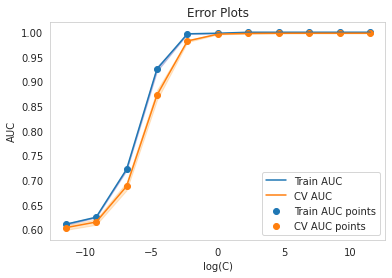

In [ ]:
auc_plots(X_train, y_train)

#### ROC plot on best C

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    5.4s finished


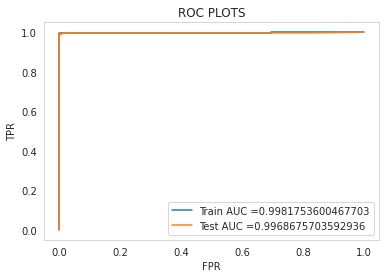

In [ ]:
y_train_pred, y_cv_pred = roc_plots(1, X_train, y_train, X_cv, y_cv)

#### Accuracy

In [ ]:
train_score = accuracy_score(y_train, y_train_pred)
cv_score = accuracy_score(y_cv, y_cv_pred)

print(train_score)
print('-'*50)
print(cv_score)
print('-'*50)

1.0
--------------------------------------------------
0.9971076267316182
--------------------------------------------------


#### Precision & Recall Score

In [ ]:
precision_score(y_train, y_train_pred)

1.0

In [ ]:
recall_score(y_train, y_train_pred)

1.0

For Train, precision is High & recall is low. Which is Good.

In [ ]:
precision_score(y_cv, y_cv_pred)

0.9997145711431425

In [ ]:
recall_score(y_cv, y_cv_pred)

0.9948870899020026

#### Confusion Matrices

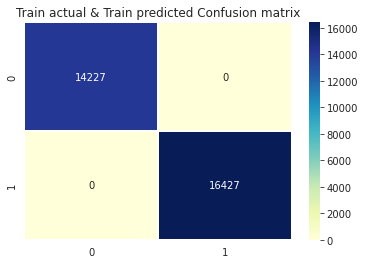

In [ ]:
train_conf(y_train, y_train_pred)

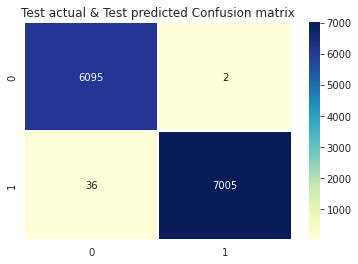

In [ ]:
test_conf(y_cv, y_cv_pred)

#### F1-Score

In [ ]:
f1_score(y_train, y_train_pred)

1.0

## Decision Tree Functions

### Hyperparamters

In [ ]:
parlist_maxdepth = [1, 5, 10, 50, 100, 500, 1000]
parlist_min_samples_split = [5, 10, 100, 500]
parameters = {'max_depth': parlist_maxdepth, 'min_samples_split': parlist_min_samples_split}
print(parameters)

{'max_depth': [1, 5, 10, 50, 100, 500, 1000], 'min_samples_split': [5, 10, 100, 500]}


### Hyperparameter Tuning

In [ ]:
# https://stackoverflow.com/questions/46247758/set-multiple-parameters-from-gridsearch-at-once

import pickle

def hparameter_tuning(X_tr_data, y_train_data, filename):
    
    dt = DecisionTreeClassifier(class_weight ='balanced')
    
    clf = GridSearchCV(estimator=dt, param_grid=parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score = True)
    clf.fit(X_tr_data, y_train_data)
    results = clf.cv_results_
    best_hyperparameter = clf.best_params_
    best_score = clf.best_score_
    best_estimator = clf.best_estimator_
    
    with open(filename, 'wb') as f:
        pickle.dump([results, best_hyperparameter, best_score, best_estimator] , f)
    

### AUC Results Function

In [ ]:
import numpy as np
def auc_score_plot(results):
    train_auc_mean_notreshaped = results['mean_train_score']
    cv_auc_mean_notreshaped = results['mean_test_score']
    train_auc_mean = np.reshape(train_auc_mean_notreshaped, (7,4))
    cv_auc_mean = np.reshape(cv_auc_mean_notreshaped, (7,4))
    fig, ax = plt.subplots(1,2,figsize=(10,6))
    ax[0].title.set_text('Mean Train Score')
    ax[1].title.set_text('Mean CV Score')
    sns.heatmap(train_auc_mean, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=[5, 10, 100, 500], \
                yticklabels=[1, 5, 10, 50, 100, 500, 1000], ax=ax[0])
    sns.heatmap(cv_auc_mean, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=[5, 10, 100, 500], \
                yticklabels=[1, 5, 10, 50, 100, 500, 1000], ax=ax[1])
    ax[0].set_ylabel('max_depth')
    ax[0].set_xlabel('min_samples_split')
    ax[1].set_ylabel('max_depth')
    ax[1].set_xlabel('min_samples_split')
    plt.show()

## Decision Tree Classifier

In [ ]:
def dt_classifier(best_estimator, X_tr_data, y_train_data, X_test_data, y_test_data, filename):
    
    dt = best_estimator
    fitted_tree = dt.fit(X_tr_data, y_train_data)
    
    tree_object = dt.tree_
    
    y_train_predict_proba = dt.predict_proba(X_tr_data)
    y_test_predict_proba = dt.predict_proba(X_test_data)
    
    y_train_predict = dt.predict(X_tr_data)
    y_test_predict = dt.predict(X_test_data)
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_data, y_train_predict_proba[:,1])
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_data, y_test_predict_proba[:,1])
    
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
        
    with open(filename, 'wb') as f:
        pickle.dump([train_fpr, train_tpr, train_auc, y_train_predict, test_fpr, test_tpr, test_auc, \
                         y_test_predict, tree_object] , f)
    
    with open("Dt-dt.pickle", 'wb') as f:
        pickle.dump(dt, f)

### Plotting ROC Curve

In [ ]:
def roc_plot(train_fpr, train_tpr, train_auc, test_fpr, test_tpr, test_auc):
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(test_auc))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC PLOTS")
    plt.grid()
    plt.show()

### Confusion Matrix of Train data

In [ ]:
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
def train_conf(y_train, y_train_predict):
    cm_train = confusion_matrix(y_train, y_train_predict.round())
    plt.title('Train actual & Train predicted Confusion matrix')
    xlabels= ['0', '1']
    ylabels=['0', '1']
    sns.heatmap(cm_train, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()

### Confusion Matrix of Test data

In [ ]:
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
def test_conf(y_test, y_test_predict):
    cm_test = confusion_matrix(y_test, y_test_predict.round())
    plt.title('Test actual & Test predicted Confusion matrix')
    xlabels= ['0', '1']
    ylabels=['0', '1']
    sns.heatmap(cm_test, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()

## Results

#### Hyperparameter tuning 

In [ ]:
hparameter_tuning(X_train, y_train, '/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/DT_results.pickle')

#### Opening Grid Search result variables after Hyperparameter tuning

In [ ]:
# This file stored the gridsearchcv cv_results_ dictionary as a variable into the pickle.

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/DT_results.pickle', 'rb') as f:
    results, best_hyperparameter, best_score, best_estimator = pickle.load(f)

#### Results of Hyperparameter Tuning (Best Hyper parameters, Score)

Best Hyperparameter for Decision Trees: {'max_depth': 1000, 'min_samples_split': 5}
Best Score for Decision Trees: 0.9975204246640142


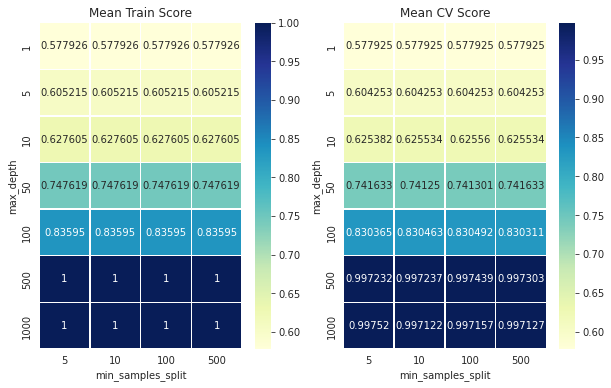

In [ ]:
print("Best Hyperparameter for Decision Trees: "+ str(best_hyperparameter))
print("Best Score for Decision Trees: "+ str(best_score))
auc_score_plot(results)

#### Running Decision Tree Classifier on best hyperparameters

In [ ]:
dt_classifier(best_estimator, X_train, y_train, X_cv, y_cv, '/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/DT_auc_results.pickle')

#### Opening Decision Tree classifier results

In [ ]:
# https://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/DT_auc_score.pickle', 'rb') as f:
    train_fpr, train_tpr, train_auc, y_train_predict, cv_fpr, cv_tpr, cv_auc, \
    y_cv_predict, tree_object = pickle.load(f)

#### Plotting ROC curve

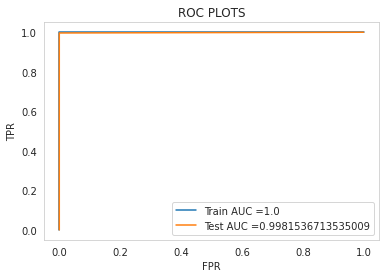

In [ ]:
roc_plot(train_fpr, train_tpr, train_auc, cv_fpr, cv_tpr, cv_auc)

#### Train confusion matrix

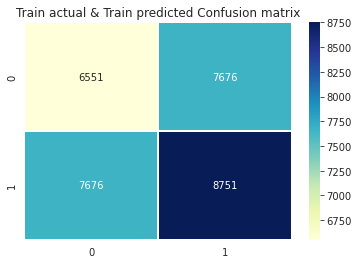

In [ ]:
train_conf(y_train, y_train_predict)

#### Test confusion matrix

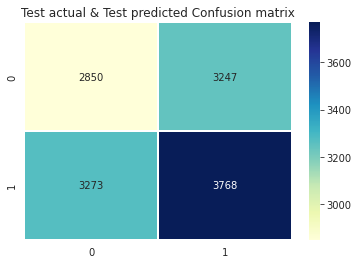

In [ ]:
test_conf(y_cv, y_cv_predict)

#### Accuracy

In [ ]:
train_score = accuracy_score(y_train, y_train_predict)
cv_score = accuracy_score(y_cv, y_cv_predict)

print(train_score)
print('-'*50)
print(cv_score)
print('-'*50)

0.49918444574933124
--------------------------------------------------
0.5037296392144923
--------------------------------------------------


#### Precision & Recall Score

In [ ]:
precision_score(y_train, y_train_predict)

0.532720521093322

In [ ]:
recall_score(y_train, y_train_predict)

0.532720521093322

For Train, precision is High & recall is low. Which is Good.

In [ ]:
precision_score(y_cv, y_cv_predict)

0.5371347113328582

In [ ]:
recall_score(y_cv, y_cv_predict)

0.5351512569237324

#### F1-Score

In [ ]:
f1_score(y_train, y_train_predict)

0.532720521093322

## Random Forest Classifier Functions

#### Selecting Hyperparameter

In [ ]:
parlist_maxdepth = [6, 7, 8, 9, 10]
parlist_n_estimators = [5, 50, 100, 300, 500, 1000]
parameters = {'max_depth': parlist_maxdepth, 'n_estimators': parlist_n_estimators}
print(parameters)

{'max_depth': [6, 7, 8, 9, 10], 'n_estimators': [5, 50, 100, 300, 500, 1000]}


### Hyperparameter Tuning for Random Forest

In [ ]:
def hparameter_tuning_rf(X_tr_data, y_train_data, filename):
    
    dt = RandomForestClassifier(n_jobs=-1)
    
    clf = GridSearchCV(estimator=dt, param_grid=parameters, cv=3, scoring='roc_auc', n_jobs=-1, return_train_score=True)
    clf.fit(X_tr_data, y_train_data)
    results = clf.cv_results_
    best_hyperparameter = clf.best_params_
    best_score = clf.best_score_
    best_estimator = clf.best_estimator_
    
    with open(filename, 'wb') as f:
        pickle.dump([results, best_hyperparameter, best_score, best_estimator] , f)

### AUC Results Function

In [ ]:
def auc_score_plot(results):
    train_auc_mean_notreshaped = results['mean_train_score']
    cv_auc_mean_notreshaped = results['mean_test_score']
    train_auc_mean = np.reshape(train_auc_mean_notreshaped, (5, 6))
    cv_auc_mean = np.reshape(cv_auc_mean_notreshaped, (5, 6))
    fig, ax = plt.subplots(1,2,figsize=(20,12))
    ax[0].title.set_text('Mean Train Score')
    ax[1].title.set_text('Mean CV Score')
    sns.heatmap(train_auc_mean, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=[5, 50, 100, 300, 500, 1000], \
                yticklabels=[6, 7, 8, 9, 10], ax=ax[0])
    sns.heatmap(cv_auc_mean, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=[5, 50, 100, 300, 500, 1000], \
                yticklabels=[6, 7, 8, 9, 10], ax=ax[1])
    ax[0].set_ylabel('max_depth')
    ax[0].set_xlabel('n_estimators')
    ax[1].set_ylabel('max_depth')
    ax[1].set_xlabel('n_estimators')
    plt.show()

### Random Forest Classifier

In [ ]:
# https://docs.scipy.org/doc/numpy-1.9.3/reference/generated/numpy.greater_equal.html
# https://stackoverflow.com/questions/15868512/list-to-array-conversion-to-use-ravel-function

def rf_classifier(best_estimator, X_tr_data, y_train_data, X_test_data, y_test_data, filename):
    
    dt = best_estimator
    fitted_tree = dt.fit(X_tr_data, y_train_data)
    
    y_train_predict_proba = dt.predict_proba(X_tr_data)
    y_test_predict_proba = dt.predict_proba(X_test_data)
    
    train_fpr, train_tpr, tr_thresholds = roc_curve(y_train_data, y_train_predict_proba[:,1])
    test_fpr, test_tpr, te_thresholds = roc_curve(y_test_data, y_test_predict_proba[:,1])
    
    y_tr = tr_thresholds[np.argmax(train_fpr*(1-train_tpr))]
    y_train_predict = []
    for i in y_train_predict_proba[:,1]:
        if np.greater_equal(i, y_tr):
            y_train_predict.append(1)
        else:
            y_train_predict.append(0)
            
    y_te = tr_thresholds[np.argmax(test_fpr*(1-test_tpr))]
    y_test_predict = []
    for i in y_test_predict_proba[:,1]:
        if np.greater_equal(i, y_te):
            y_test_predict.append(1)
        else:
            y_test_predict.append(0)
    
    train_auc = auc(train_fpr, train_tpr)
    test_auc = auc(test_fpr, test_tpr)
    
    y_train_predict = np.asarray(y_train_predict)
    y_test_predict = np.asarray(y_test_predict)
    
    print(type(y_train_predict))
    print(type(y_test_predict))
    
    with open(filename, 'wb') as f:
        pickle.dump([train_fpr, train_tpr, train_auc, y_train_predict, test_fpr, test_tpr, test_auc, y_test_predict] , f)

### Plotting ROC Curve

In [ ]:
def roc_plot(train_fpr, train_tpr, train_auc, test_fpr, test_tpr, test_auc):
    plt.plot(train_fpr, train_tpr, label="Train AUC ="+str(train_auc))
    plt.plot(test_fpr, test_tpr, label="Test AUC ="+str(test_auc))
    plt.legend()
    plt.xlabel("FPR")
    plt.ylabel("TPR")
    plt.title("ROC PLOTS")
    plt.grid()
    plt.show()

### Predictions

### Train Confusion Matrix

In [ ]:
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
def train_conf(y_train, y_train_predict):
    cm_train = confusion_matrix(y_train, y_train_predict.round())
    plt.title('Train actual & Train predicted Confusion matrix')
    xlabels= ['0', '1']
    ylabels=['0', '1']
    sns.heatmap(cm_train, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()

### Test Confusion Matrix

In [ ]:
# https://stackoverflow.com/questions/29647749/seaborn-showing-scientific-notation-in-heatmap-for-3-digit-numbers
def test_conf(y_test, y_test_predict):
    cm_test = confusion_matrix(y_test, y_test_predict.round())
    plt.title('Test actual & Test predicted Confusion matrix')
    xlabels= ['0', '1']
    ylabels=['0', '1']
    sns.heatmap(cm_test, cmap='YlGnBu', annot=True, fmt='g', linewidths=.5, xticklabels=xlabels, yticklabels=ylabels)
    plt.show()

### Random Forest

#### Hyperparameter tuning

In [ ]:
hparameter_tuning_rf(X_train, y_train, '/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/RF-grid_s_results.pickle')

#### Opening Grid Search result variables after Hyperparameter tuning

In [ ]:
# This file stored the gridsearchcv cv_results_ dictionary as a variable into the pickle.

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/RF-grid_s_results.pickle', 'rb') as f:
    results_RF, best_hyperparameter_RF, best_score_RF, best_estimator_RF = pickle.load(f)

#### Results of Hyperparameter Tuning (Best Hyper parameters, Score)

Best Hyperparameter for Random Forest: {'max_depth': 10, 'n_estimators': 1000}
Best Score for Random Forest: 0.8992820600887638


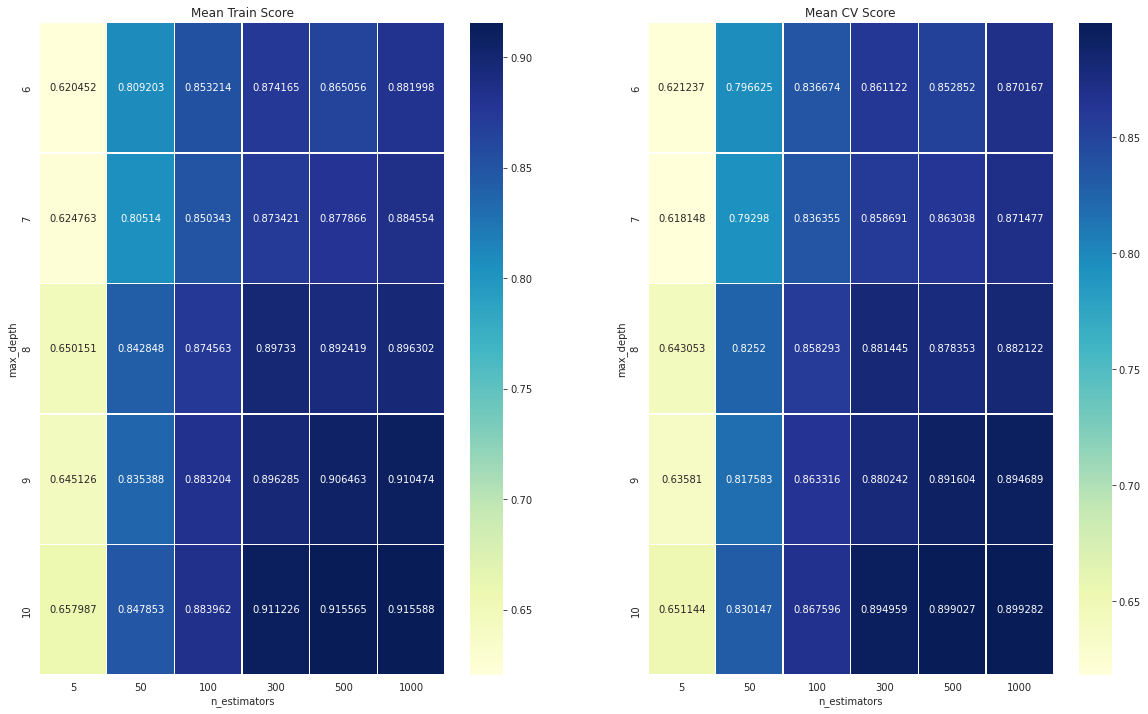

In [ ]:
print("Best Hyperparameter for Random Forest: "+ str(best_hyperparameter_RF))
print("Best Score for Random Forest: "+ str(best_score_RF))
auc_score_plot(results_RF)

#### Running Random Forest Classifier on best hyperparameters

In [ ]:
rf_classifier(best_estimator_RF, X_train, y_train, X_cv, y_cv, '/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/RF_auc_score.pickle')

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


#### Opening Random Forest classifier results

In [ ]:
# https://www.jessicayung.com/how-to-use-pickle-to-save-and-load-variables-in-python/

with open('/content/drive/MyDrive/Colab Notebooks/AppliedAICourse/Self-Case-Study-1/RF_auc_score.pickle', 'rb') as f:
    tr_fpr_RF, tr_tpr_RF, tr_auc_RF, y_tr_predict_RF, cv_fpr_RF, cv_tpr_RF, cv_auc_RF, y_cv_predict_RF = pickle.load(f)

#### Plotting ROC curve

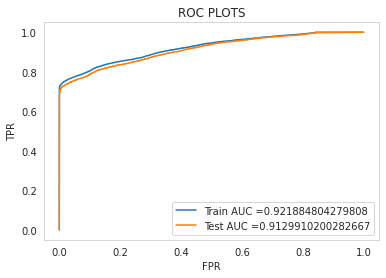

In [ ]:
roc_plot(tr_fpr_RF, tr_tpr_RF, tr_auc_RF, cv_fpr_RF, cv_tpr_RF, cv_auc_RF)

#### Train confusion matrix

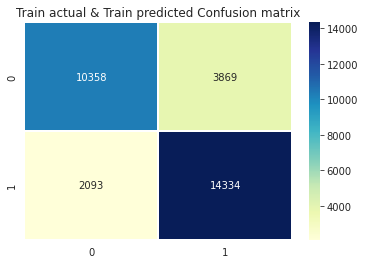

In [ ]:
train_conf(y_train, y_tr_predict_RF)

#### Test confusion matrix

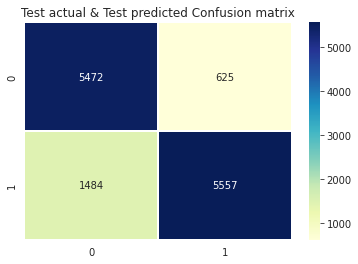

In [ ]:
test_conf(y_cv, y_cv_predict_RF)

#### Accuracy

In [ ]:
train_score = accuracy_score(y_train, y_tr_predict_RF)
cv_score = accuracy_score(y_cv, y_cv_predict_RF)

print(train_score)
print('-'*50)
print(cv_score)
print('-'*50)

0.8055066223005154
--------------------------------------------------
0.8394732836048104
--------------------------------------------------


#### Precision & Recall Score

In [ ]:
precision_score(y_train, y_tr_predict_RF)

0.7874526177003791

In [ ]:
recall_score(y_train, y_tr_predict_RF)

0.8725878127473062

In [ ]:
precision_score(y_cv, y_cv_predict_RF)

0.8989000323519897

In [ ]:
recall_score(y_cv, y_cv_predict_RF)

0.7892344837381053

#### F1-Score

In [ ]:
f1_score(y_train, y_tr_predict_RF)

0.8278371354317066

# Summary

In [ ]:
from prettytable import PrettyTable
from PIL import Image, ImageDraw, ImageFont
x = PrettyTable()
x.field_names = ['S.No.', 'Metric', 'Log. Reg.', 'D. Trees', ' R. Forests']
x.add_row(['1.', 'Best \n Hyperparameter', 'C=1', 'max_depth = \n 500 \n \n min_sample_split = \n 5', \
           'max_depth = \n 10 \n \n n_estimators = \n 1000'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['2.', 'Train \n Accuracy', '1.0', '0.49', '0.805'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['3.', 'CV \n Accuracy', '0.996', '0.50', '0.839'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['4.', 'Train \n False Negative', '0', '7676', '2093'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['5.', 'CV \n False Negative', '44', '3273', '1484'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['6.', 'Train \n False Positives', '0', '7676', '3869'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['7.', 'CV \n False Positives', '4', '3247', '625'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['8.', 'F1-Score', '1.0', '0.535', '0.82'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['9.', 'Train \n Precision', '1.0', '0.532', '0.787'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['10.', 'CV \n Precision', '0.999', '0.537', '0.898'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['11.', 'Train \n Recall', '1.0', '0.532', '0.872'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['\n', '\n', '\n', '\n', '\n'])
x.add_row(['12.', 'CV \n Recall', '0.993', '0.535', '0.789'])
print(x)

im = Image.new("RGB", (1500, 1500), "white")
draw = ImageDraw.Draw(im)
font = ImageFont.load_default()
draw.text((20, 20), str(x), font=font, fill="black")

im.show()
im.save("table.png")

+-------+------------------+-----------+----------------------+------------------+
| S.No. |      Metric      | Log. Reg. |       D. Trees       |    R. Forests    |
+-------+------------------+-----------+----------------------+------------------+
|   1.  |      Best        |    C=1    |     max_depth =      |   max_depth =    |
|       |  Hyperparameter  |           |         500          |        10        |
|       |                  |           |                      |                  |
|       |                  |           |  min_sample_split =  |  n_estimators =  |
|       |                  |           |           5          |       1000       |
|       |                  |           |                      |                  |
|       |                  |           |                      |                  |
|       |                  |           |                      |                  |
|       |                  |           |                      |                  |
|   

#**▶ Final Conclusion** 
Looking at the overall performance of these models, it seems that Logistic Regression is quite suitable model for this Case Study.

To support my statement, I would like to bring focus upon the False - Negatives & False Positives as far as Train or CV is concerned. It falls into the expected bracket of errors to go for, in our Healthcare Provider Fraud Detection Problem.

False positive means, those providers which are wrongly predicted to be Frauds.

False negative means, those providers which are wrongly predicted to be Non-Frauds.

And here, False Positives, which are Fraud providers is very well caught up by the system. False Negatives are hardly 44 for Cross-Validation, which in case comes out, can go for manual adjudication of the claims of a said Medical Case.